# CredX Acquisition Risk Analytics

**Background**:

CredX is a leading credit card provider that gets thousands of credit card applicants every year. But in the past few years, it has experienced an increase in credit loss due to increase in defaults.
The CEO believes that the best strategy to mitigate credit risk is to acquire "the right customers".

**Objective**:

    * To identify the right customers using predictive models. We need to determine the factors affecting credit risk 
      and create strategies to mitigate the acquisition. 
    * Build an application scorecard and identify the cut-off score below which we would not grant credit cards 
      to applicants.
    * We need to assess and explain the potential financial benefit of our project and identify the metrics we are trying to         optimize.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [3]:
pd.set_option('display.max_columns', 500)

## Supporting functions

In [4]:
def print_bold(x):
    print('\033[1m'+x+'\033[0m')

# 1.Data Import and data cleaning

In [5]:
demo = pd.read_csv('Demographic data.csv')
cred = pd.read_csv('Credit Bureau data.csv')

In [6]:
print_bold('Shape of demographic data:')
print(demo.shape)
print_bold('Shape of credit data:')
print(cred.shape)

Shape of demographic data:
(71295, 12)
Shape of credit data:
(71295, 19)


In [7]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [8]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

In [9]:
demo.head()

Application ID  Age Gender Marital Status (at the time of application)  \
0       954457215   48      F                                     Married   
1       432830445   31      M                                     Married   
2       941387308   32      M                                      Single   
3       392161677   43      M                                     Married   
4       182011211   35      F                                     Married   

   No of dependents  Income     Education Profession  Type of residence  \
0               2.0    40.0      Bachelor         SAL            Rented   
1               4.0    55.0  Professional     SE_PROF            Rented   
2               2.0    46.0      Bachelor     SE_PROF            Rented   
3               1.0    53.0      Bachelor          SE            Rented   
4               5.0    44.0  Professional         SAL            Rented   

   No of months in current residence  No of months in current company  \
0                                113                               56   
1                                112                               46   
2                                104                               49   
3                                 94                               53   
4                                112                               43   

   Performance Tag  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [10]:
cred.head()

Application ID  No of times 90 DPD or worse in last 6 months  \
0       954457215                                             0   
1       432830445                                             0   
2       941387308                                             0   
3       392161677                                             0   
4       182011211                                             0   

   No of times 60 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 30 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 90 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 60 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 30 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Avgas CC Utilization in last 12 months  \
0                                     4.0   
1                                     3.0   
2                                     7.0   
3                                    11.0   
4                                    12.0   

   No of trades opened in last 6 months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No of PL trades opened in last 6 months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No of PL trades opened in last 12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  0                 
1                                                  0                 
2                                                  0               

### 1.1 Renaming profession column, removing space

In [11]:
demo = demo.rename(columns = {'Profession ':'Profession'})

### 1.2 check to see if all application ids are same in both dfs

In [12]:
print_bold('Number of Application IDs that are present in only 1 file:')
print(len(set(demo['Application ID'].unique())-set(cred['Application ID'].unique())))
print(len(set(cred['Application ID'].unique())-set(demo['Application ID'].unique())))

print_bold('Number of unique Application IDs:')
print(len(cred['Application ID'].unique()))

Number of Application IDs that are present in only 1 file:
0
0
Number of unique Application IDs:
71292


- All application IDs are same in both data files.
- There are 71295 rows and only 71292 unique IDs, implies there are duplicates present

### 1.3 Dropping duplicate IDs

In [13]:
print_bold('Duplicate IDs in credit file:')
print(cred[cred['Application ID'].duplicated(keep = False)]['Application ID'])
print('*'*40)
print_bold('Duplicate IDs in demographic file:')
print(demo[demo['Application ID'].duplicated(keep = False)]['Application ID'])

Duplicate IDs in credit file:
5243     653287861
24386    765011468
27586    765011468
42637    653287861
48602    671989187
59022    671989187
Name: Application ID, dtype: int64
****************************************
Duplicate IDs in demographic file:
5243     653287861
24386    765011468
27586    765011468
42637    653287861
48602    671989187
59022    671989187
Name: Application ID, dtype: int64


- There are same duplicate IDs present in both files
- Dropping those rows with duplicate IDs

In [14]:
demo = demo.drop_duplicates('Application ID',keep = False)
cred = cred.drop_duplicates('Application ID',keep = False)

In [15]:
print_bold('Shape of demographic data:')
print(demo.shape)
print_bold('Shape of credit data:')
print(cred.shape)

Shape of demographic data:
(71289, 12)
Shape of credit data:
(71289, 19)


### 1.4 Merging dataframes

In [16]:
merged = demo.drop('Performance Tag',axis = 1).merge(cred,on='Application ID')

In [17]:
print(merged.shape)

(71289, 29)


In [18]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71289 entries, 0 to 71288
Data columns (total 29 columns):
Application ID                                                     71289 non-null int64
Age                                                                71289 non-null int64
Gender                                                             71287 non-null object
Marital Status (at the time of application)                        71283 non-null object
No of dependents                                                   71286 non-null float64
Income                                                             71289 non-null float64
Education                                                          71170 non-null object
Profession                                                         71275 non-null object
Type of residence                                                  71281 non-null object
No of months in current residence                                  71289 non-null int64
No

In [19]:
merged.head()

Application ID  Age Gender Marital Status (at the time of application)  \
0       954457215   48      F                                     Married   
1       432830445   31      M                                     Married   
2       941387308   32      M                                      Single   
3       392161677   43      M                                     Married   
4       182011211   35      F                                     Married   

   No of dependents  Income     Education Profession Type of residence  \
0               2.0    40.0      Bachelor        SAL            Rented   
1               4.0    55.0  Professional    SE_PROF            Rented   
2               2.0    46.0      Bachelor    SE_PROF            Rented   
3               1.0    53.0      Bachelor         SE            Rented   
4               5.0    44.0  Professional        SAL            Rented   

   No of months in current residence  No of months in current company  \
0                                113                               56   
1                                112                               46   
2                                104                               49   
3                                 94                               53   
4                                112                               43   

   No of times 90 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 60 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 30 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 90 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 60 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 30 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Avgas CC Utilization in last 12 months  \
0                                     4.0   
1                                     3.0   
2                                     7.0   
3                                    11.0   
4                                    12.0   

   No of trades opened in last 6 months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

 

### 1.5 Null value check

In [20]:
print(merged.isnull().sum()[merged.isnull().sum()>0].sort_values(ascending = False))
print('*'*40)
print(round(100*merged.isnull().sum()[merged.isnull().sum()>0].sort_values(ascending = False)/len(merged),2))

Performance Tag                                1425
Avgas CC Utilization in last 12 months         1058
Outstanding Balance                             272
Presence of open home loan                      272
Education                                       119
Profession                                       14
Type of residence                                 8
Marital Status (at the time of application)       6
No of dependents                                  3
Gender                                            2
No of trades opened in last 6 months              1
dtype: int64
****************************************
Performance Tag                                2.00
Avgas CC Utilization in last 12 months         1.48
Outstanding Balance                            0.38
Presence of open home loan                     0.38
Education                                      0.17
Profession                                     0.02
Type of residence                              0.01
Marital St

- There are 1425 rows where `Performace Tag` is null. 
- Assuming that these applications are rejected and hence the performace Tag is null
- Seperating these rejected rows and storing in a seperate df
- All the other rows with null values will be imputed using `woe` values.

### 1.5.1 Rejected applicant list

In [21]:
rejected = merged[pd.isnull(merged['Performance Tag'])]
merged = merged[~pd.isnull(merged['Performance Tag'])]
print_bold('Rejected shape:')
print(rejected.shape)
print_bold('merged shape:')
print(merged.shape)

Rejected shape:
(1425, 29)
merged shape:
(69864, 29)


In [22]:
merged_safe = merged.copy()

# 2.EDA

### 2.0.1 Performance Tag

In [23]:
print(merged['Performance Tag'].value_counts())
print('*'*40)
print(round(100*merged['Performance Tag'].value_counts()/len(merged),2))

0.0    66917
1.0     2947
Name: Performance Tag, dtype: int64
****************************************
0.0    95.78
1.0     4.22
Name: Performance Tag, dtype: float64


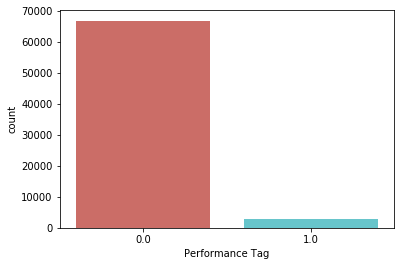

In [24]:
sns.countplot(x= 'Performance Tag', data = merged, palette = 'hls')
plt.title('')
plt.show()

There is only 4.22% population who has defaulted, its an unbalanced dataset

In [25]:
# safe copy
merged_before_woe = merged.copy()

## 2.1 Demographic columns

In [26]:
print(demo.columns.tolist())

['Application ID', 'Age', 'Gender', 'Marital Status (at the time of application)', 'No of dependents', 'Income', 'Education', 'Profession', 'Type of residence', 'No of months in current residence', 'No of months in current company', 'Performance Tag']


### 2.1.1 Age

Check for outliers:
count    71289.000000
mean        44.943385
std          9.938892
min         -3.000000
25%         37.000000
50%         45.000000
75%         53.000000
90%         58.000000
95%         62.000000
99%         65.000000
max         65.000000
Name: Age, dtype: float64


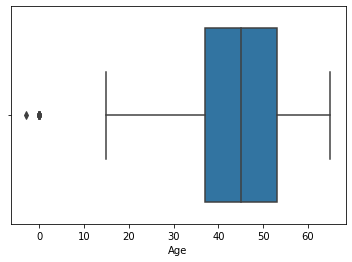

In [27]:
print_bold('Check for outliers:')
print(demo['Age'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['Age'])
plt.show()

- Age has some negative values, which is not possible
- Also the age limit for getting a credit card is 18
- Hence all the rows where age < 18 are dropped

In [28]:
merged = merged[merged['Age']>=18]

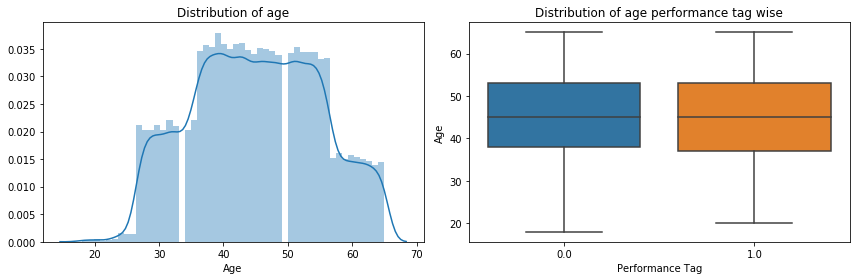

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(merged['Age'])
plt.title('Distribution of age')
plt.subplot(1,2,2)
sns.boxplot(x='Performance Tag',y='Age',data = merged)
plt.title('Distribution of age performance tag wise')
plt.tight_layout()
plt.show()


In [30]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates
bins = np.arange(18,merged['Age'].max() + 10, 10)
merged['age_bins'] = pd.cut(merged['Age'], bins, include_lowest=True)

In [31]:
#checking the default rate
Total_no_of_application = merged.groupby('age_bins')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('age_bins')['Performance Tag'].count().reset_index(name = 'count_default')
agg_age = Total_no_of_application.merge(count_default, on='age_bins')
agg_age['default_rate'] = 100*(agg_age['count_default']/agg_age['Total no.of application']).round(3)
agg_age

age_bins  Total no.of application  count_default  default_rate
0  (17.999, 28.0]                     3166            123           3.9
1    (28.0, 38.0]                    16566            731           4.4
2    (38.0, 48.0]                    23236            995           4.3
3    (48.0, 58.0]                    19983            805           4.0
4    (58.0, 68.0]                     6848            292           4.3

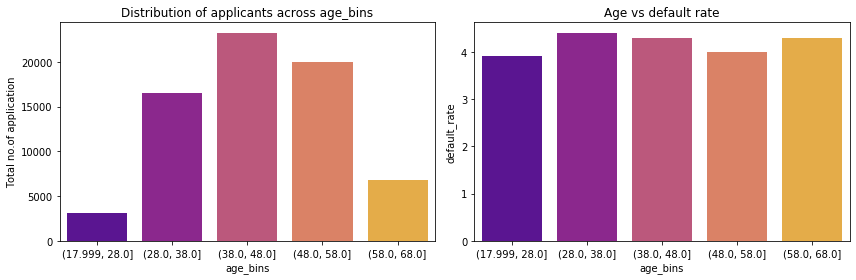

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x='age_bins',y='Total no.of application',data = agg_age,palette = 'plasma')
plt.title('Distribution of applicants across age_bins')
plt.subplot(1,2,2)
sns.barplot(x='age_bins',y='default_rate',data = agg_age,palette = 'plasma')
plt.title('Age vs default rate')
plt.tight_layout()
plt.show()

- Most number of credit cards are given to people of age between 30 and 65.
- The average age of default and non defaulters is similar as seen from the box plot
- The same trend of age independent default rate can be seen from the box plot above

### 2.1.2 Gender

In [33]:
print(merged['Gender'].value_counts())
print('*'*40)
print(round(100*merged['Gender'].value_counts()/len(merged),2))

M    53308
F    16490
Name: Gender, dtype: int64
****************************************
M    76.37
F    23.62
Name: Gender, dtype: float64


In [34]:
#checking the default rate
Total_no_of_application = merged.groupby('Gender')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('Gender')['Performance Tag'].count().reset_index(name = 'count_default')
agg_gender = Total_no_of_application.merge(count_default, on='Gender')
agg_gender['default_rate'] = 100*(agg_gender['count_default']/agg_gender['Total no.of application']).round(3)
agg_gender

Gender  Total no.of application  count_default  default_rate
0      F                    16490            718           4.4
1      M                    53308           2228           4.2

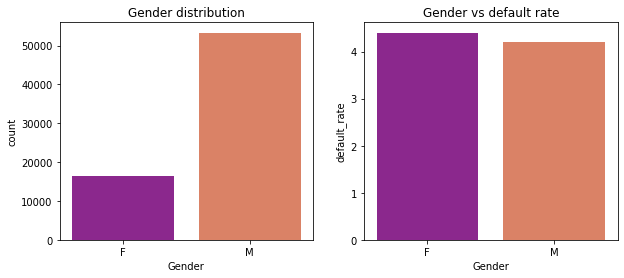

In [35]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(merged['Gender'],palette = 'plasma')
plt.title('Gender distribution')
plt.subplot(1,2,2)
sns.barplot(x='Gender',y='default_rate',data=agg_gender,palette = 'plasma')
plt.title('Gender vs default rate')
plt.show()

- Majority of the credit cards were offered to males
- Slightly high default rate among female (but only by 0.2%)

### 2.1.3 Marital Status

In [36]:
print(merged['Marital Status (at the time of application)'].value_counts())
print('*'*40)
print(round(100*merged['Marital Status (at the time of application)'].value_counts()/len(merged),2))

Married    59502
Single     10292
Name: Marital Status (at the time of application), dtype: int64
****************************************
Married    85.25
Single     14.75
Name: Marital Status (at the time of application), dtype: float64


Text(0, 0.5, 'Performance Frequency')

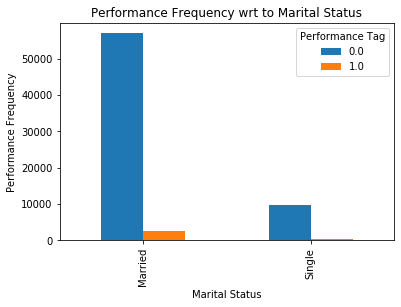

In [37]:
#Performance Frequency wrt to Marital Status
pd.crosstab(merged['Marital Status (at the time of application)'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Performance Frequency')

In [38]:
#checking the default rate
Total_no_of_application = merged.groupby('Marital Status (at the time of application)')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('Marital Status (at the time of application)')['Performance Tag'].count().reset_index(name = 'count_default')
agg_marital = Total_no_of_application.merge(count_default, on='Marital Status (at the time of application)')
agg_marital['default_rate'] = 100*(agg_marital['count_default']/agg_marital['Total no.of application']).round(3)
agg_marital

Marital Status (at the time of application)  Total no.of application  \
0                                     Married                    59502   
1                                      Single                    10292   

   count_default  default_rate  
0           2502           4.2  
1            444           4.3

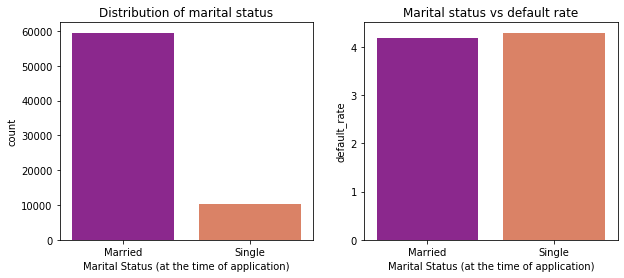

In [39]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(merged['Marital Status (at the time of application)'],palette = 'plasma')
plt.title('Distribution of marital status')
plt.subplot(1,2,2)
sns.barplot(x='Marital Status (at the time of application)',y='default_rate',data=agg_marital,palette = 'plasma')
plt.title('Marital status vs default rate')
plt.show()

- Married people were offered the majority of credit cards (about 85%)
- The default rate is similar across both the categories

### 2.1.4 No of dependents

In [40]:
print(merged['No of dependents'].value_counts())
print('*'*40)
print(round(100*merged['No of dependents'].value_counts()/len(merged),2))

3.0    15626
1.0    15200
2.0    15104
4.0    11994
5.0    11873
Name: No of dependents, dtype: int64
****************************************
3.0    22.39
1.0    21.78
2.0    21.64
4.0    17.18
5.0    17.01
Name: No of dependents, dtype: float64


Text(0, 0.5, 'Performance Frequency')

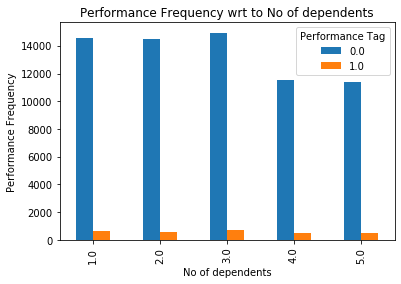

In [41]:
#Performance Frequency wrt to No of dependents
pd.crosstab(merged['No of dependents'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to No of dependents')
plt.xlabel('No of dependents')
plt.ylabel('Performance Frequency')

In [42]:
#checking the default rate
Total_no_of_application = merged.groupby('No of dependents')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('No of dependents')['Performance Tag'].count().reset_index(name = 'count_default')
agg_depend = Total_no_of_application.merge(count_default, on='No of dependents')
agg_depend['default_rate'] = 100*(agg_depend['count_default']/agg_depend['Total no.of application']).round(3)
agg_depend

No of dependents  Total no.of application  count_default  default_rate
0               1.0                    15200            667           4.4
1               2.0                    15104            588           3.9
2               3.0                    15626            694           4.4
3               4.0                    11994            494           4.1
4               5.0                    11873            503           4.2

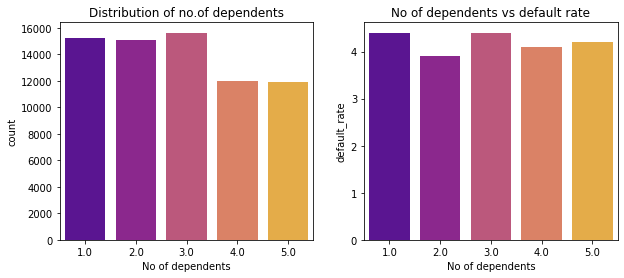

In [43]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(merged['No of dependents'],palette = 'plasma')
plt.title('Distribution of no.of dependents')
plt.subplot(1,2,2)
sns.barplot(x='No of dependents',y='default_rate',data=agg_depend,palette = 'plasma')
plt.title('No of dependents vs default rate')
plt.show()

- Most of the credit cards were distributed to people having no.of dependents = 1,2 or 3.
- We note that there is a slight uptick in default rate for No of dependents =1 and 3 when compared to others. 

### 2.1.5 Income

Check for outliers:
count    69799.000000
mean        27.407742
std         15.478580
min         -0.500000
25%         14.000000
50%         27.000000
75%         40.000000
90%         49.000000
95%         54.000000
99%         59.000000
max         60.000000
Name: Income, dtype: float64


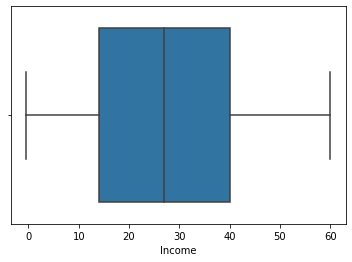

In [44]:
print_bold('Check for outliers:')
print(merged['Income'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['Income'])
plt.show()


income cannot be smaller than 0, hence removing all those rows with income less than 0

In [45]:
merged = merged[merged['Income']>=0]

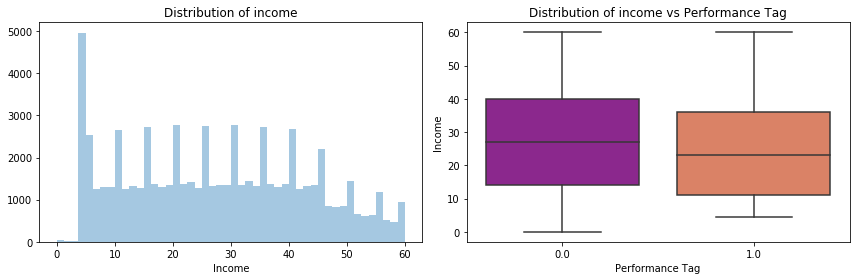

In [46]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(merged['Income'],kde = False)
plt.title('Distribution of income')
plt.subplot(1,2,2)
sns.boxplot(x='Performance Tag',y='Income',data = merged,palette = 'plasma')
plt.title('Distribution of income vs Performance Tag')
plt.tight_layout()
plt.show()


In [47]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates
bins = np.arange(0,merged['Income'].max() + 10, 10)
merged['income_bins'] = pd.cut(merged['Income'], bins, include_lowest=True)

In [48]:
#checking the default rate
Total_no_of_application = merged.groupby('income_bins')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('income_bins')['Performance Tag'].count().reset_index(name = 'count_default')
agg_inc = Total_no_of_application.merge(count_default, on='income_bins')
agg_inc['default_rate'] = 100*(agg_inc['count_default']/agg_inc['Total no.of application']).round(3)
agg_inc


income_bins  Total no.of application  count_default  default_rate
0  (-0.001, 10.0]                    12755            711           5.6
1    (10.0, 20.0]                    13336            604           4.5
2    (20.0, 30.0]                    13569            601           4.4
3    (30.0, 40.0]                    13611            483           3.5
4    (40.0, 50.0]                    10839            384           3.5
5    (50.0, 60.0]                     5609            161           2.9

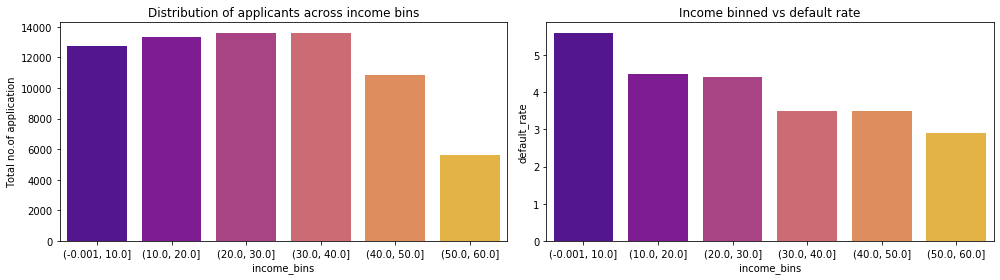

In [49]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.barplot(x='income_bins',y='Total no.of application',data = agg_inc,palette = 'plasma')
plt.title('Distribution of applicants across income bins')
plt.subplot(1,2,2)
sns.barplot(x='income_bins',y='default_rate',data = agg_inc,palette ='plasma')
plt.title('Income binned vs default rate')
plt.tight_layout()
plt.show()

- A large number of credit cards were issued to people with income less than 5
- We can observe a interesting trend of a large of people with income as round numbers, which might mean that either they have selected the income out of prefixed numbers which usually are round numbers or they would have rounded their income to the closest round figure
- The median income for defaulters is lower than the median income for defaulters
- We can also see that there is a strong negative correlation between income and default rate from the barplot

### 2.1.6 Education

In [50]:
print(merged['Education'].value_counts())
print('*'*40)
print(round(100*merged['Education'].value_counts()/len(merged),2))

Professional    24319
Masters         23439
Bachelor        17271
Phd              4454
Others            118
Name: Education, dtype: int64
****************************************
Professional    34.88
Masters         33.62
Bachelor        24.77
Phd              6.39
Others           0.17
Name: Education, dtype: float64


Text(0, 0.5, 'Performance Frequency')

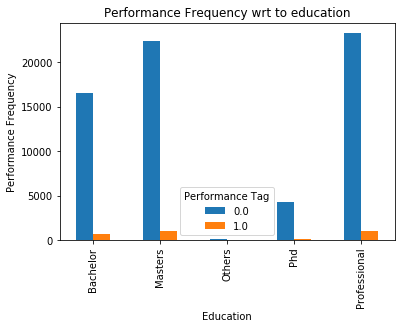

In [51]:
#Performance Frequency wrt to education
pd.crosstab(merged['Education'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to education')
plt.xlabel('Education')
plt.ylabel('Performance Frequency')

In [52]:
#checking the default rate
Total_no_of_application = merged.groupby('Education')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('Education')['Performance Tag'].count().reset_index(name = 'count_default')
agg_edu = Total_no_of_application.merge(count_default, on='Education')
agg_edu['default_rate'] = 100*(agg_edu['count_default']/agg_edu['Total no.of application']).round(3)
agg_edu


Education  Total no.of application  count_default  default_rate
0      Bachelor                    17271            740           4.3
1       Masters                    23439            998           4.3
2        Others                      118              8           6.8
3           Phd                     4454            183           4.1
4  Professional                    24319           1010           4.2

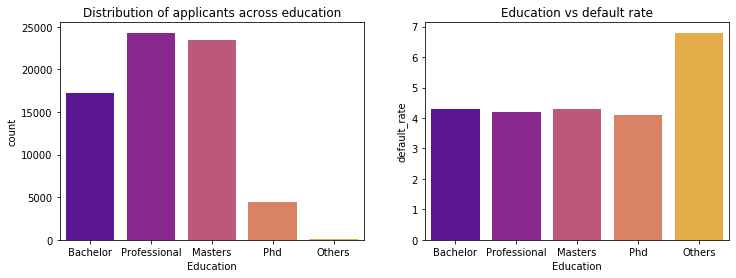

In [53]:
order = merged['Education'].dropna().unique()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(merged['Education'],order = order,palette = 'plasma')
plt.title('Distribution of applicants across education')
plt.subplot(1,2,2)
sns.barplot(x='Education',y='default_rate',data=agg_edu,order = order,palette = 'plasma')
plt.title('Education vs default rate')
plt.show()

- Except for phd and other, other categories have similar distribution of credit cards issued
- The default rate is similar acorss all the categories, except for others which is very high because it has neglible proportion of credit card holders when compared with other categories

### 2.1.7 Profession

In [54]:
print(merged['Profession'].value_counts())
print('*'*40)
print(round(100*merged['Profession'].value_counts()/len(merged),2))

SAL        39586
SE_PROF    16220
SE         13901
Name: Profession, dtype: int64
****************************************
SAL        56.78
SE_PROF    23.26
SE         19.94
Name: Profession, dtype: float64


Text(0, 0.5, 'Performance Frequency')

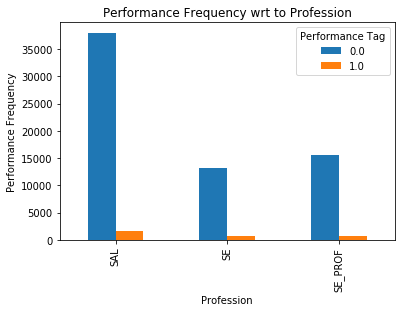

In [55]:
#Performance Frequency wrt to Profession
pd.crosstab(merged['Profession'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to Profession')
plt.xlabel('Profession')
plt.ylabel('Performance Frequency')

In [56]:
#checking the default rate
Total_no_of_application = merged.groupby('Profession')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('Profession')['Performance Tag'].count().reset_index(name = 'count_default')
agg_pro = Total_no_of_application.merge(count_default, on='Profession')
agg_pro['default_rate'] = 100*(agg_pro['count_default']/agg_pro['Total no.of application']).round(3)
agg_pro

Profession  Total no.of application  count_default  default_rate
0        SAL                    39586           1628           4.1
1         SE                    13901            640           4.6
2    SE_PROF                    16220            676           4.2

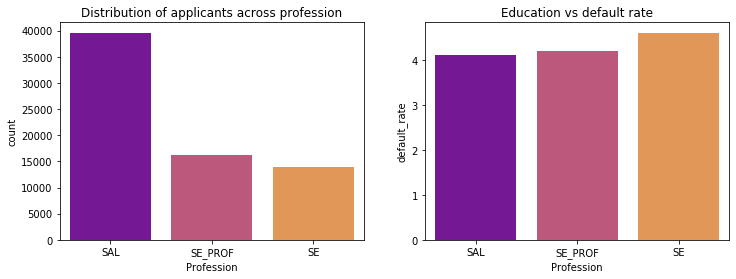

In [57]:
order = merged['Profession'].dropna().unique()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(merged['Profession'],order = order,palette = 'plasma')
plt.title('Distribution of applicants across profession')
plt.subplot(1,2,2)
sns.barplot(x='Profession',y='default_rate',data=agg_pro,order = order,palette = 'plasma')
plt.title('Education vs default rate')
plt.show()

- Considering SE-prof and SE to be both belonging to Self employed category, The distribution of credit cards is similar among salaried and self employed categories
- Self employed people seem to do slightly bad than the salaried people

### 2.1.8 Type of residence

In [58]:
print(merged['Type of residence'].value_counts())
print('*'*40)
print(round(100*merged['Type of residence'].value_counts()/len(merged),2))

Rented                 52189
Owned                  13962
Living with Parents     1763
Company provided        1599
Others                   198
Name: Type of residence, dtype: int64
****************************************
Rented                 74.86
Owned                  20.03
Living with Parents     2.53
Company provided        2.29
Others                  0.28
Name: Type of residence, dtype: float64


Text(0, 0.5, 'Performance Frequency')

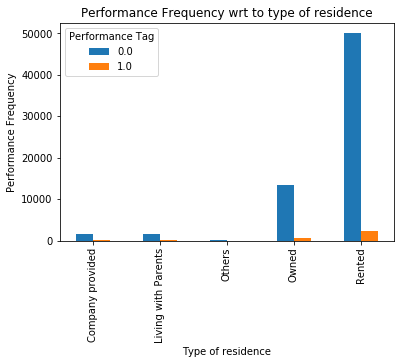

In [59]:
#Performance Frequency wrt to type of residence
pd.crosstab(merged['Type of residence'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to type of residence')
plt.xlabel('Type of residence')
plt.ylabel('Performance Frequency')

In [60]:
#checking the default rate
Total_no_of_application = merged.groupby('Type of residence')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('Type of residence')['Performance Tag'].count().reset_index(name = 'count_default')
agg_tor = Total_no_of_application.merge(count_default, on='Type of residence')
agg_tor['default_rate'] = 100*(agg_tor['count_default']/agg_tor['Total no.of application']).round(3)
agg_tor

Type of residence  Total no.of application  count_default  default_rate
0     Company provided                     1599             73           4.6
1  Living with Parents                     1763             80           4.5
2               Others                      198              5           2.5
3                Owned                    13962            591           4.2
4               Rented                    52189           2195           4.2

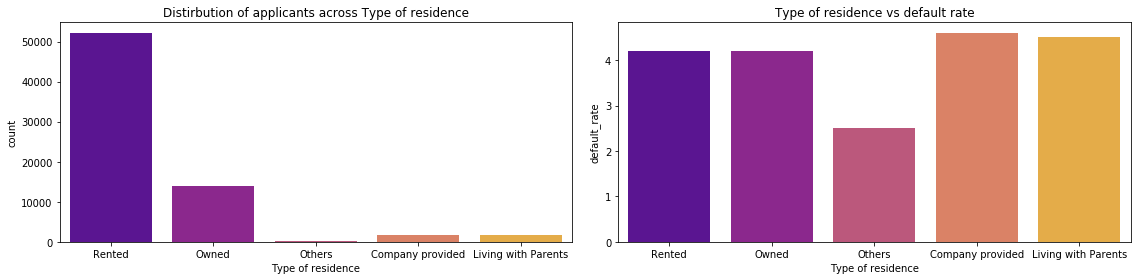

In [61]:
order = merged['Type of residence'].dropna().unique()
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(merged['Type of residence'],order = order,palette = 'plasma')
plt.title('Distirbution of applicants across Type of residence')
plt.subplot(1,2,2)
sns.barplot(x='Type of residence',y='default_rate',data=agg_tor,order = order,palette = 'plasma')
plt.title('Type of residence vs default rate')
plt.tight_layout()
plt.show()

- The majority of credit card population belong to rented category
- Living with parents and company rented people seem to do slightly worse than the other categories, although their population is considerably small when compared to others

### 2.1.9 No of months in current residence

Check for outliers:
count    69719.000000
mean        34.499304
std         36.781744
min          6.000000
25%          6.000000
50%         10.000000
75%         60.000000
90%         98.000000
95%        110.000000
99%        122.000000
max        126.000000
Name: No of months in current residence, dtype: float64


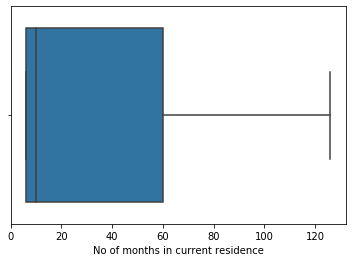

In [62]:
print_bold('Check for outliers:')
print(merged['No of months in current residence'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['No of months in current residence'])
plt.show()


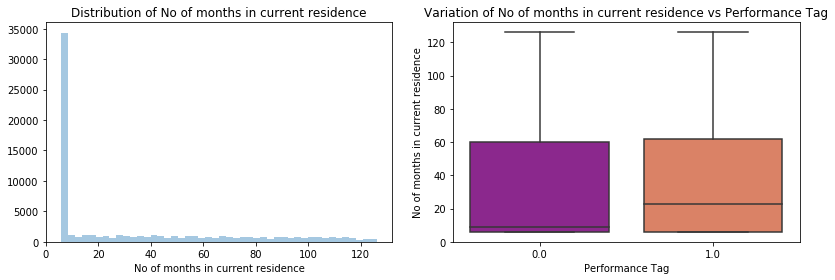

In [63]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(merged['No of months in current residence'],kde = False)
plt.title('Distribution of No of months in current residence')
plt.subplot(1,2,2)
sns.boxplot(x='Performance Tag',y='No of months in current residence',data = merged,palette = 'plasma')
plt.title('Variation of No of months in current residence vs Performance Tag')
plt.tight_layout()
plt.show()


In [64]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates
bins = np.arange(0,merged['No of months in current residence'].max() + 12, 12)
merged['mcr_bins'] = pd.cut(merged['No of months in current residence'], bins, include_lowest=True)

In [65]:
#checking the default rate
Total_no_of_application = merged.groupby('mcr_bins')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('mcr_bins')['Performance Tag'].count().reset_index(name = 'count_default')
agg_mcr = Total_no_of_application.merge(count_default, on='mcr_bins')
agg_mcr['default_rate'] = 100*(agg_mcr['count_default']/agg_mcr['Total no.of application']).round(3)
agg_mcr

mcr_bins  Total no.of application  count_default  default_rate
0   (-0.001, 12.0]                    35844           1217           3.4
1     (12.0, 24.0]                     4396            283           6.4
2     (24.0, 36.0]                     4180            263           6.3
3     (36.0, 48.0]                     4070            215           5.3
4     (48.0, 60.0]                     3818            210           5.5
5     (60.0, 72.0]                     3472            146           4.2
6     (72.0, 84.0]                     3385            173           5.1
7     (84.0, 96.0]                     3244            144           4.4
8    (96.0, 108.0]                     3382            132           3.9
9   (108.0, 120.0]                     3010            111           3.7
10  (120.0, 132.0]                      918             50           5.4

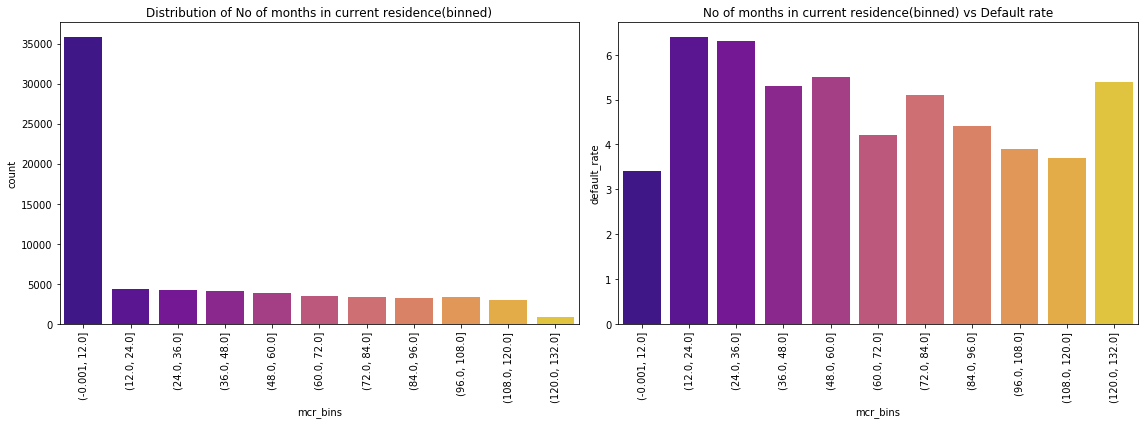

In [66]:
order = sorted(merged['mcr_bins'].dropna().unique())
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(merged['mcr_bins'],order = order,palette = 'plasma')
plt.xticks(rotation='vertical')
plt.title('Distribution of No of months in current residence(binned)')
plt.subplot(1,2,2)
sns.barplot(x='mcr_bins',y='default_rate',data=agg_mcr,order = order,palette = 'plasma')
plt.xticks(rotation='vertical')
plt.title('No of months in current residence(binned) vs Default rate')
plt.tight_layout()
plt.show()

- The large proportion of the credit card holders have been in their current residence for less than a year(particularly a large clustering at 6 months), seems little unsual
- Leaving the category of less than a year, we can see a general trend of decrese in deault rate with increase in number of months in current residence

### 2.10 No of months in current company

Check for outliers:
count    69719.000000
mean        34.182834
std         20.357008
min          3.000000
25%         16.000000
50%         34.000000
75%         51.000000
90%         62.000000
95%         68.000000
99%         74.000000
max        133.000000
Name: No of months in current company, dtype: float64


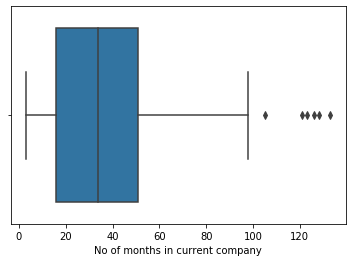

In [67]:
print_bold('Check for outliers:')
print(merged['No of months in current company'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['No of months in current company'])
plt.show()

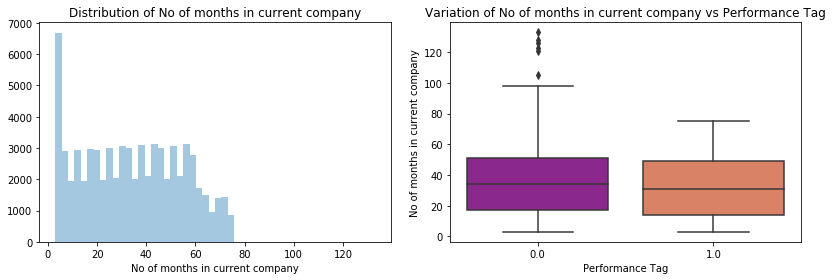

In [68]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(merged['No of months in current company'],kde = False)
plt.title('Distribution of No of months in current company')
plt.subplot(1,2,2)
sns.boxplot(x='Performance Tag',y='No of months in current company',data = merged,palette = 'plasma')
plt.title('Variation of No of months in current company vs Performance Tag')
plt.tight_layout()
plt.show()

In [69]:
bins = np.arange(0,merged['No of months in current company'].max() + 12, 12)
merged['mcc_bins'] = pd.cut(merged['No of months in current company'], bins, include_lowest=True)
#checking the default rate
Total_no_of_application = merged.groupby('mcc_bins')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('mcc_bins')['Performance Tag'].count().reset_index(name = 'count_default')
agg_mcc = Total_no_of_application.merge(count_default, on='mcc_bins')
agg_mcc['default_rate'] = 100*(agg_mcc['count_default']/agg_mcc['Total no.of application']).round(3)
agg_mcc

mcc_bins  Total no.of application  count_default  default_rate
0   (-0.001, 12.0]                    13479            649           4.8
1     (12.0, 24.0]                    11858            572           4.8
2     (24.0, 36.0]                    12086            503           4.2
3     (36.0, 48.0]                    12384            473           3.8
4     (48.0, 60.0]                    12046            401           3.3
5     (60.0, 72.0]                     6544            288           4.4
6     (72.0, 84.0]                     1313             58           4.4
7     (84.0, 96.0]                        2              0           0.0
8    (96.0, 108.0]                        2              0           0.0
9   (108.0, 120.0]                        0              0           NaN
10  (120.0, 132.0]                        4              0           0.0
11  (132.0, 144.0]                        1              0           0.0

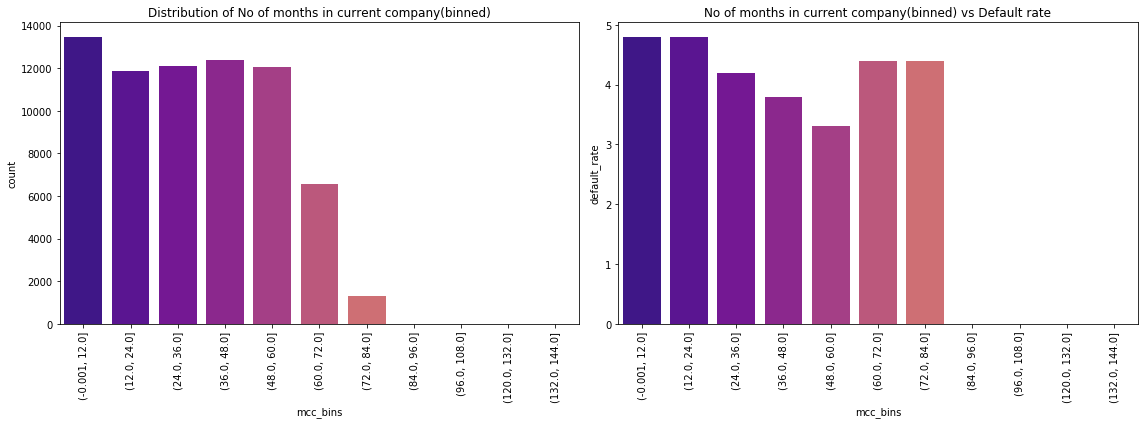

In [70]:
order = sorted(merged['mcc_bins'].dropna().unique())
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(merged['mcc_bins'],order = order,palette = 'plasma')
plt.xticks(rotation='vertical')
plt.title('Distribution of No of months in current company(binned)')
plt.subplot(1,2,2)
sns.barplot(x='mcc_bins',y='default_rate',data=agg_mcc,order = order,palette = 'plasma')
plt.xticks(rotation='vertical')
plt.title('No of months in current company(binned) vs Default rate')
plt.tight_layout()
plt.show()

- There is an almost uniform distribution of credit cards across all the categories
- Defaulters seem to have slightly lower number of months in their present company when compared to the non defaulters
- There is this generaly general trend of decrease in default rate when there is a increase in the number of month a person works in his/her present company
- There is a slight increase in default rate in 5-7 years category, this may be due to the considerably lower propotion of pouplation in these categories

### 2.1.11 Correlation among demographic variables

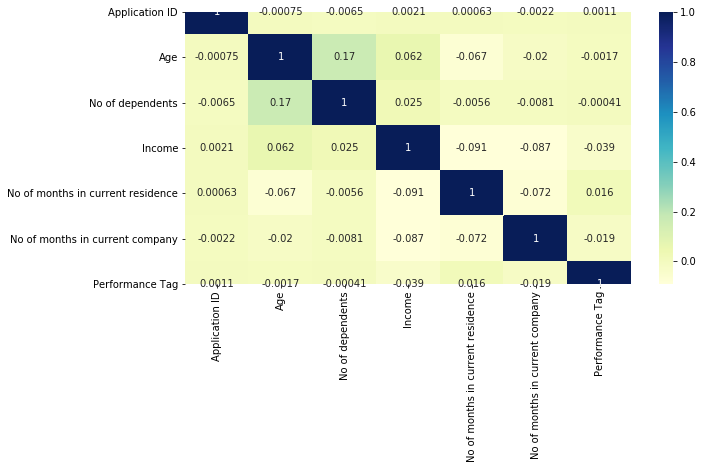

In [71]:
# Checking correlation among demographic variables:
plt.figure(figsize=(10,5))
cor=demo.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### 2.1.12 Summary of demographic variable EDA

   * We don't see any variable having strong correlation with target varaible. 
   * We note slight correlation among Age with No. of dependents and Age with Income.
   * Also, Variable Income, No. of months in current residence and No. of months in current company are 
    negatively correlated.
    
    #### Few data quality issues to note for further correction(in demographic data columns):
(These issues are other than null values):
1. `Age column` has negative value and also few outliers.
2. `Income column` has negative value.
3. `No of months in current company` column has outliers.

1. More than 50 % of the population are Male and married.
2. Most of the population have 1, 2 or 3 dependents.
3. 75% of the credit card was issued to Rented residence people.
4. Maximum records belong to either Professional or Masters and  SAL profession.
5. Most of the credit card is issued for the age group between 36 to 56 years.
6. Most of the credit card was distributed to people with income level 4.5Lakh (Assuming the income is in INR lakhs).
7. We see that maximum credit card is issued during the first few months in the current company.
8. We see that maximum of the credit card is issued during the first few months in the current residence.

With respect to `performance tag`:

1. We saw a very little correlation between a gender and default rate, marital status and default rate .
2. We saw a slight uptick in default rate for No of dependents =1 and 3 when compared to others.
3. We saw a slight higher default rate for type of residence- company provided when compared to other types and followed by those living with parents.
4. Though we saw that there is higher default rate for education type -Others, it is important to note that these others education type have the fewest data entries.
5. We don't see any extreme default rate difference between the age groups. Almost all the age group has almost the same default rate.Among all highest default rate being in the age group -(28.0, 38.0).
6.  Though there is slightly higher default rate for self employed profession it is important to note that these SE profession type have the fewest data entries.
7. Lower income level, higher is the default rate.
8. Most of defaults happened within 2 years with respect to no. of months been in current company.
9. Most of defaults happened within 2-3 years with respect to no. of months stayed in current residence.
10. We don't see any variable having strong positive correlation with target varaible.

## 2.2 Credit bureau columns

### 2.2.1 No-of times 90 DPD in past 6 months

In [72]:
print(merged['No of times 90 DPD or worse in last 6 months'].value_counts())
print('*'*40)
print(round(100*merged['No of times 90 DPD or worse in last 6 months'].value_counts()/len(merged),2))

0    54525
1    13212
2     1774
3      208
Name: No of times 90 DPD or worse in last 6 months, dtype: int64
****************************************
0    78.21
1    18.95
2     2.54
3     0.30
Name: No of times 90 DPD or worse in last 6 months, dtype: float64


Text(0, 0.5, 'Performance Frequency')

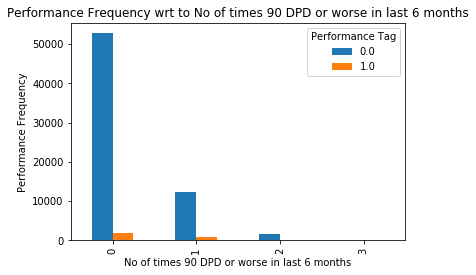

In [73]:
#Performance Frequency wrt to No of times 90 DPD or worse in last 6 months
pd.crosstab(merged['No of times 90 DPD or worse in last 6 months'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to No of times 90 DPD or worse in last 6 months')
plt.xlabel('No of times 90 DPD or worse in last 6 months')
plt.ylabel('Performance Frequency')

In [74]:
#checking the default rate
Total_no_of_application = merged.groupby('No of times 90 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('No of times 90 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'count_default')
agg_90dpd6m = Total_no_of_application.merge(count_default, on='No of times 90 DPD or worse in last 6 months')
agg_90dpd6m['default_rate'] = 100*(agg_90dpd6m['count_default']/agg_90dpd6m['Total no.of application']).round(3)
agg_90dpd6m

No of times 90 DPD or worse in last 6 months  Total no.of application  \
0                                             0                    54525   
1                                             1                    13212   
2                                             2                     1774   
3                                             3                      208   

   count_default  default_rate  
0           1791           3.3  
1            970           7.3  
2            160           9.0  
3             23          11.1

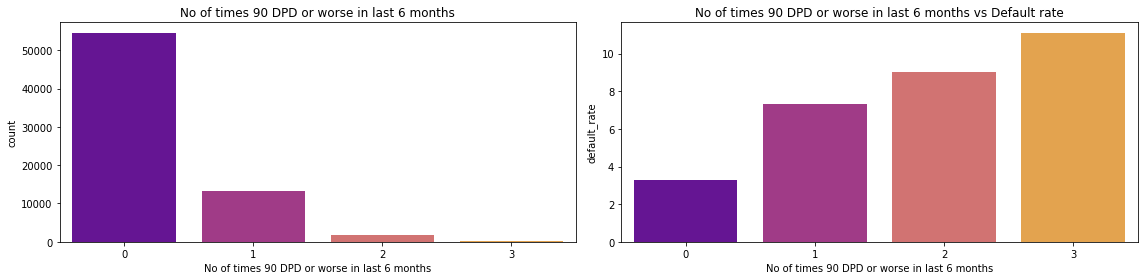

In [75]:
order = merged['No of times 90 DPD or worse in last 6 months'].dropna().unique()
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(merged['No of times 90 DPD or worse in last 6 months'],order = order,palette = 'plasma')
plt.title('No of times 90 DPD or worse in last 6 months')
plt.subplot(1,2,2)
sns.barplot(x='No of times 90 DPD or worse in last 6 months',y='default_rate',data=agg_90dpd6m,order = order,palette = 'plasma')
plt.title('No of times 90 DPD or worse in last 6 months vs Default rate')
plt.tight_layout()
plt.show()

- Majority of population(about 78%) who were offered credit cards havent been 90 DPD in past 6 months
- The default rate increase the number of defaults incease, there is very strong correlation 

### 2.2.2 No-of times 60 DPD in past 6 months

Check for outliers:
count    69719.000000
mean         0.392217
std          0.772214
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
90%          1.000000
95%          2.000000
99%          3.000000
max          5.000000
Name: No of times 60 DPD or worse in last 6 months, dtype: float64


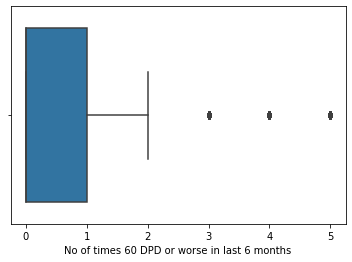

In [76]:
print_bold('Check for outliers:')
print(merged['No of times 60 DPD or worse in last 6 months'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['No of times 60 DPD or worse in last 6 months'])
plt.show()

In [77]:
print(merged['No of times 60 DPD or worse in last 6 months'].value_counts())
print('*'*40)
print(round(100*merged['No of times 60 DPD or worse in last 6 months'].value_counts()/len(merged),2))

0    51733
1    11125
2     4913
3     1468
4      410
5       70
Name: No of times 60 DPD or worse in last 6 months, dtype: int64
****************************************
0    74.20
1    15.96
2     7.05
3     2.11
4     0.59
5     0.10
Name: No of times 60 DPD or worse in last 6 months, dtype: float64


Text(0, 0.5, 'Performance Frequency')

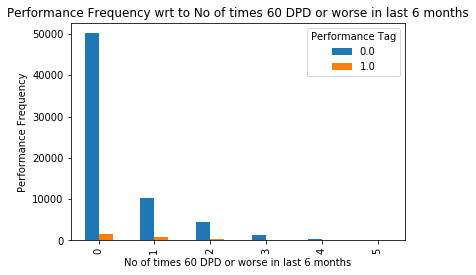

In [78]:
#Performance Frequency wrt to No of times 60 DPD or worse in last 6 months
pd.crosstab(merged['No of times 60 DPD or worse in last 6 months'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to No of times 60 DPD or worse in last 6 months')
plt.xlabel('No of times 60 DPD or worse in last 6 months')
plt.ylabel('Performance Frequency')

In [79]:
#checking the default rate
Total_no_of_application = merged.groupby('No of times 60 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('No of times 60 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'count_default')
agg_60dpd6m = Total_no_of_application.merge(count_default, on='No of times 60 DPD or worse in last 6 months')
agg_60dpd6m['default_rate'] = 100*(agg_60dpd6m['count_default']/agg_60dpd6m['Total no.of application']).round(3)
agg_60dpd6m

No of times 60 DPD or worse in last 6 months  Total no.of application  \
0                                             0                    51733   
1                                             1                    11125   
2                                             2                     4913   
3                                             3                     1468   
4                                             4                      410   
5                                             5                       70   

   count_default  default_rate  
0           1579           3.1  
1            783           7.0  
2            389           7.9  
3            148          10.1  
4             39           9.5  
5              6           8.6

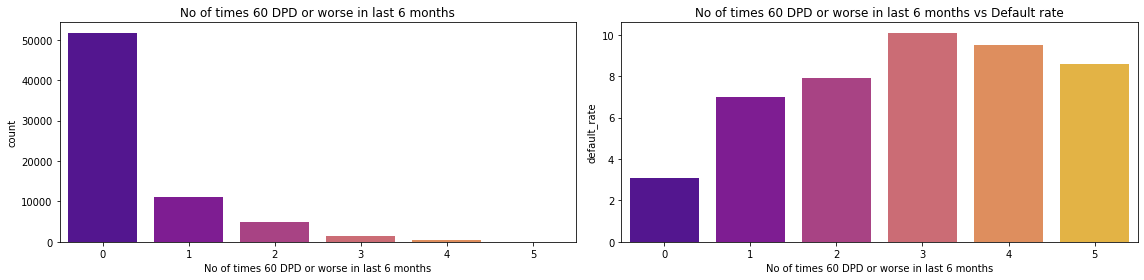

In [80]:
order = merged['No of times 60 DPD or worse in last 6 months'].dropna().unique()
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(merged['No of times 60 DPD or worse in last 6 months'],order = order,palette = 'plasma')
plt.title('No of times 60 DPD or worse in last 6 months')
plt.subplot(1,2,2)
sns.barplot(x='No of times 60 DPD or worse in last 6 months',y='default_rate',data=agg_60dpd6m,order = order,palette = 'plasma')
plt.title('No of times 60 DPD or worse in last 6 months vs Default rate')
plt.tight_layout()
plt.show()

- Similar trend to the 90DPD is observed in 60DPD

### 2.2.3 No-of times 30 DPD in past 6 months

Check for outliers:
count    69719.000000
mean         0.524190
std          1.001053
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
90%          2.000000
95%          3.000000
99%          4.000000
max          7.000000
Name: No of times 30 DPD or worse in last 6 months, dtype: float64


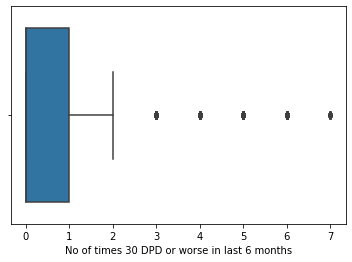

In [81]:
print_bold('Check for outliers:')
print(merged['No of times 30 DPD or worse in last 6 months'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['No of times 30 DPD or worse in last 6 months'])
plt.show()

In [82]:
print(merged['No of times 30 DPD or worse in last 6 months'].value_counts())
print('*'*40)
print(round(100*merged['No of times 30 DPD or worse in last 6 months'].value_counts()/len(merged),2))

0    49962
1     9495
2     5895
3     2828
4     1044
5      384
6       96
7       15
Name: No of times 30 DPD or worse in last 6 months, dtype: int64
****************************************
0    71.66
1    13.62
2     8.46
3     4.06
4     1.50
5     0.55
6     0.14
7     0.02
Name: No of times 30 DPD or worse in last 6 months, dtype: float64


Text(0, 0.5, 'Performance Frequency')

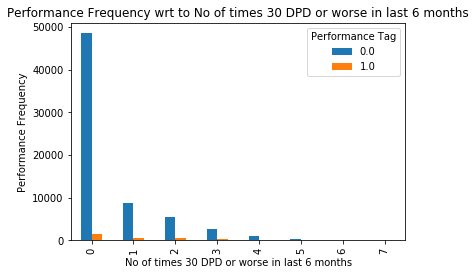

In [83]:
pd.crosstab(merged['No of times 30 DPD or worse in last 6 months'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to No of times 30 DPD or worse in last 6 months')
plt.xlabel('No of times 30 DPD or worse in last 6 months')
plt.ylabel('Performance Frequency')

In [84]:
#checking the default rate
Total_no_of_application = merged.groupby('No of times 30 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('No of times 30 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'count_default')
agg_30dpd6m = Total_no_of_application.merge(count_default, on='No of times 30 DPD or worse in last 6 months')
agg_30dpd6m['default_rate'] = 100*(agg_30dpd6m['count_default']/agg_30dpd6m['Total no.of application']).round(3)
agg_30dpd6m

No of times 30 DPD or worse in last 6 months  Total no.of application  \
0                                             0                    49962   
1                                             1                     9495   
2                                             2                     5895   
3                                             3                     2828   
4                                             4                     1044   
5                                             5                      384   
6                                             6                       96   
7                                             7                       15   

   count_default  default_rate  
0           1452           2.9  
1            622           6.6  
2            466           7.9  
3            245           8.7  
4            107          10.2  
5             43          11.2  
6              8           8.3  
7              1           6.7

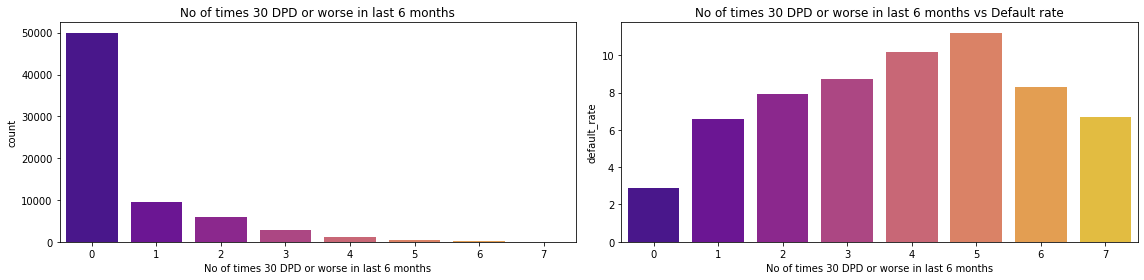

In [85]:
order = merged['No of times 30 DPD or worse in last 6 months'].dropna().unique()
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(merged['No of times 30 DPD or worse in last 6 months'],order = order,palette = 'plasma')
plt.title('No of times 30 DPD or worse in last 6 months')
plt.subplot(1,2,2)
sns.barplot(x='No of times 30 DPD or worse in last 6 months',y='default_rate',data=agg_30dpd6m,order = order,palette = 'plasma')
plt.title('No of times 30 DPD or worse in last 6 months vs Default rate')
plt.tight_layout()
plt.show()

- Similar trend is observed as observed in 60 and 90 DPD
- The number of times persons default increase from 30 to 60 to 90

### 2.2.4 No-of times 90 DPD in past 12 months

Check for outliers:
count    69719.000000
mean         0.415425
std          0.763783
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
90%          2.000000
95%          2.000000
99%          3.000000
max          5.000000
Name: No of times 90 DPD or worse in last 12 months, dtype: float64


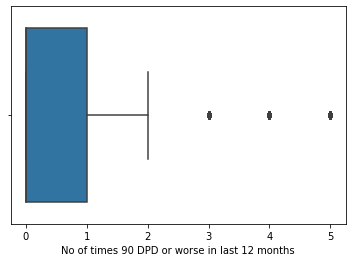

In [86]:
print_bold('Check for outliers:')
print(merged['No of times 90 DPD or worse in last 12 months'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['No of times 90 DPD or worse in last 12 months'])
plt.show()

In [87]:
print(merged['No of times 90 DPD or worse in last 12 months'].value_counts())
print('*'*40)
print(round(100*merged['No of times 90 DPD or worse in last 12 months'].value_counts()/len(merged),2))

0    50354
1    11660
2     6155
3     1243
4      271
5       36
Name: No of times 90 DPD or worse in last 12 months, dtype: int64
****************************************
0    72.22
1    16.72
2     8.83
3     1.78
4     0.39
5     0.05
Name: No of times 90 DPD or worse in last 12 months, dtype: float64


Text(0, 0.5, 'Performance Frequency')

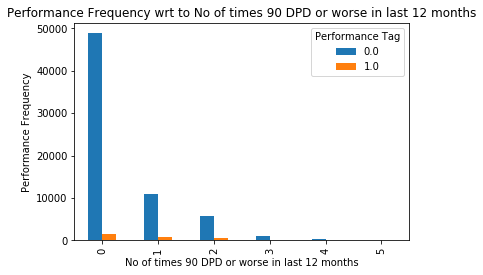

In [88]:
pd.crosstab(merged['No of times 90 DPD or worse in last 12 months'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to No of times 90 DPD or worse in last 12 months')
plt.xlabel('No of times 90 DPD or worse in last 12 months')
plt.ylabel('Performance Frequency')

In [89]:
#checking the default rate
Total_no_of_application = merged.groupby('No of times 90 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('No of times 90 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'count_default')
agg_90dpd12m = Total_no_of_application.merge(count_default, on='No of times 90 DPD or worse in last 12 months')
agg_90dpd12m['default_rate'] = 100*(agg_90dpd12m['count_default']/agg_90dpd12m['Total no.of application']).round(3)
agg_90dpd12m

No of times 90 DPD or worse in last 12 months  Total no.of application  \
0                                              0                    50354   
1                                              1                    11660   
2                                              2                     6155   
3                                              3                     1243   
4                                              4                      271   
5                                              5                       36   

   count_default  default_rate  
0           1507           3.0  
1            796           6.8  
2            488           7.9  
3            120           9.7  
4             28          10.3  
5              5          13.9

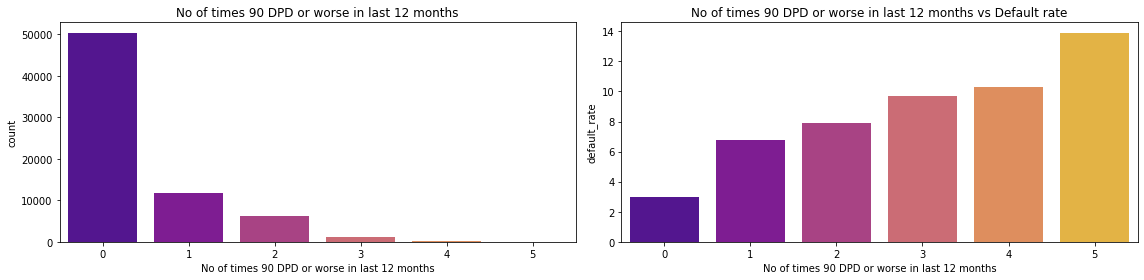

In [90]:
order = merged['No of times 90 DPD or worse in last 12 months'].dropna().unique()
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(merged['No of times 90 DPD or worse in last 12 months'],order = order,palette = 'plasma')
plt.title('No of times 90 DPD or worse in last 12 months')
plt.subplot(1,2,2)
sns.barplot(x='No of times 90 DPD or worse in last 12 months',y='default_rate',data=agg_90dpd12m,order = order,palette = 'plasma')
plt.title('No of times 90 DPD or worse in last 12 months vs Default rate')
plt.tight_layout()
plt.show()

- Simialer trend as seen among previous DPDs

### 2.2.5 No-of times 60 DPD in past 12 months

Check for outliers:
count    69719.000000
mean         0.604183
std          1.022152
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
90%          2.000000
95%          3.000000
99%          4.000000
max          7.000000
Name: No of times 60 DPD or worse in last 12 months, dtype: float64


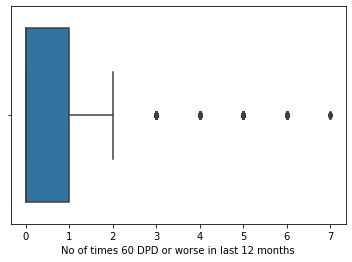

In [91]:
print_bold('Check for outliers:')
print(merged['No of times 60 DPD or worse in last 12 months'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['No of times 60 DPD or worse in last 12 months'])
plt.show()

In [92]:
print(merged['No of times 60 DPD or worse in last 12 months'].value_counts())
print('*'*40)
print(round(100*merged['No of times 60 DPD or worse in last 12 months'].value_counts()/len(merged),2))

0    45739
1    12803
2     6413
3     3203
4     1045
5      398
6      111
7        7
Name: No of times 60 DPD or worse in last 12 months, dtype: int64
****************************************
0    65.60
1    18.36
2     9.20
3     4.59
4     1.50
5     0.57
6     0.16
7     0.01
Name: No of times 60 DPD or worse in last 12 months, dtype: float64


Text(0, 0.5, 'Performance Frequency')

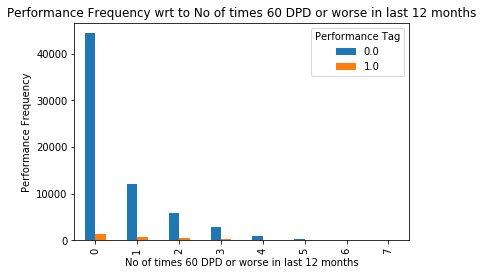

In [93]:
pd.crosstab(merged['No of times 60 DPD or worse in last 12 months'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to No of times 60 DPD or worse in last 12 months')
plt.xlabel('No of times 60 DPD or worse in last 12 months')
plt.ylabel('Performance Frequency')

In [94]:
#checking the default rate
Total_no_of_application = merged.groupby('No of times 60 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('No of times 60 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'count_default')
agg_60dpd12m = Total_no_of_application.merge(count_default, on='No of times 60 DPD or worse in last 12 months')
agg_60dpd12m['default_rate'] = 100*(agg_60dpd12m['count_default']/agg_60dpd12m['Total no.of application']).round(3)
agg_60dpd12m

No of times 60 DPD or worse in last 12 months  Total no.of application  \
0                                              0                    45739   
1                                              1                    12803   
2                                              2                     6413   
3                                              3                     3203   
4                                              4                     1045   
5                                              5                      398   
6                                              6                      111   

   count_default  default_rate  
0           1375           3.0  
1            663           5.2  
2            482           7.5  
3            274           8.6  
4            101           9.7  
5             36           9.0  
6             13          11.7

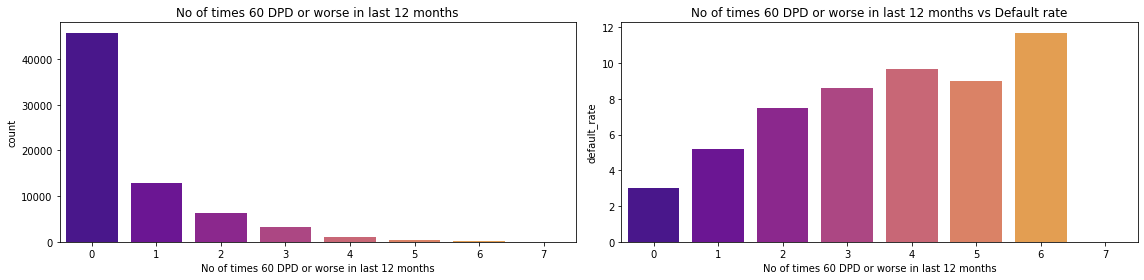

In [95]:
order = merged['No of times 60 DPD or worse in last 12 months'].dropna().unique()
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(merged['No of times 60 DPD or worse in last 12 months'],order = order,palette = 'plasma')
plt.title('No of times 60 DPD or worse in last 12 months')
plt.subplot(1,2,2)
sns.barplot(x='No of times 60 DPD or worse in last 12 months',y='default_rate',data=agg_60dpd12m,order = order,palette = 'plasma')
plt.title('No of times 60 DPD or worse in last 12 months vs Default rate')
plt.tight_layout()
plt.show()

### 2.2.6 No-of times 30 DPD in past 12 months

Check for outliers:
count    69719.000000
mean         0.734821
std          1.243621
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
90%          3.000000
95%          3.000000
99%          5.000000
max          9.000000
Name: No of times 30 DPD or worse in last 12 months, dtype: float64


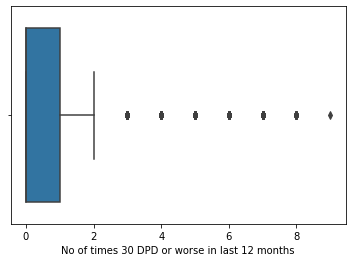

In [96]:
print_bold('Check for outliers:')
print(merged['No of times 30 DPD or worse in last 12 months'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['No of times 30 DPD or worse in last 12 months'])
plt.show()

In [97]:
print(merged['No of times 30 DPD or worse in last 12 months'].value_counts())
print('*'*40)
print(round(100*merged['No of times 30 DPD or worse in last 12 months'].value_counts()/len(merged),2))

0    44730
1    11461
2     6114
3     4134
4     1922
5      852
6      375
7      107
8       23
9        1
Name: No of times 30 DPD or worse in last 12 months, dtype: int64
****************************************
0    64.16
1    16.44
2     8.77
3     5.93
4     2.76
5     1.22
6     0.54
7     0.15
8     0.03
9     0.00
Name: No of times 30 DPD or worse in last 12 months, dtype: float64


Text(0, 0.5, 'Performance Frequency')

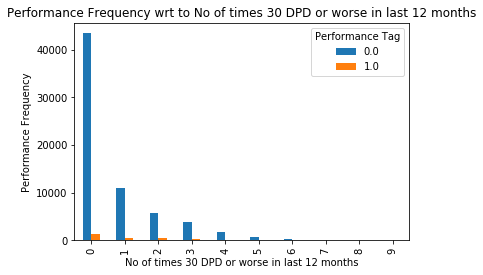

In [98]:
pd.crosstab(merged['No of times 30 DPD or worse in last 12 months'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to No of times 30 DPD or worse in last 12 months')
plt.xlabel('No of times 30 DPD or worse in last 12 months')
plt.ylabel('Performance Frequency')

In [99]:
#checking the default rate
Total_no_of_application = merged.groupby('No of times 30 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('No of times 30 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'count_default')
agg_30dpd12m = Total_no_of_application.merge(count_default, on='No of times 30 DPD or worse in last 12 months')
agg_30dpd12m['default_rate'] = 100*(agg_30dpd12m['count_default']/agg_30dpd12m['Total no.of application']).round(3)
agg_30dpd12m

No of times 30 DPD or worse in last 12 months  Total no.of application  \
0                                              0                    44730   
1                                              1                    11461   
2                                              2                     6114   
3                                              3                     4134   
4                                              4                     1922   
5                                              5                      852   
6                                              6                      375   
7                                              7                      107   
8                                              8                       23   

   count_default  default_rate  
0           1313           2.9  
1            518           4.5  
2            451           7.4  
3            349           8.4  
4            173           9.0  
5             89          10.4  
6             38          10.1  
7             11          10.3  
8              2           8.7

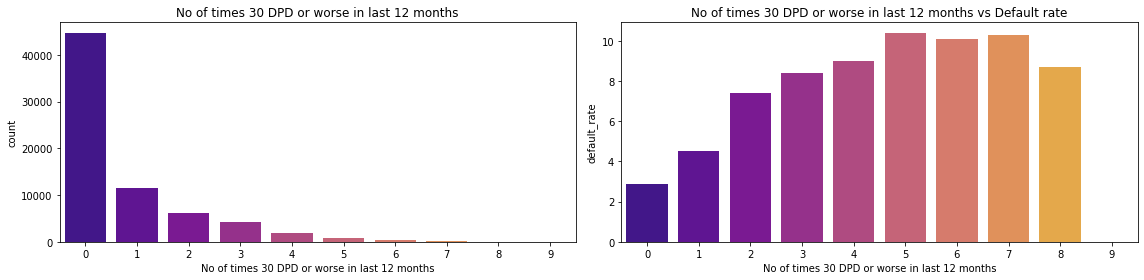

In [100]:
order = merged['No of times 30 DPD or worse in last 12 months'].dropna().unique()
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(merged['No of times 30 DPD or worse in last 12 months'],order = order,palette = 'plasma')
plt.title('No of times 30 DPD or worse in last 12 months')
plt.subplot(1,2,2)
sns.barplot(x='No of times 30 DPD or worse in last 12 months',y='default_rate',data=agg_30dpd12m,order = order,palette = 'plasma')
plt.title('No of times 30 DPD or worse in last 12 months vs Default rate')
plt.tight_layout()
plt.show()

### 2.2.7 Avg CC utilization

Check for outliers:
count    68703.000000
mean        29.300307
std         29.527807
min          0.000000
25%          8.000000
50%         15.000000
75%         45.000000
90%         72.000000
95%        105.000000
99%        113.000000
max        113.000000
Name: Avgas CC Utilization in last 12 months, dtype: float64


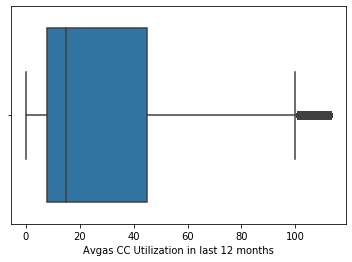

In [101]:
print_bold('Check for outliers:')
print(merged['Avgas CC Utilization in last 12 months'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['Avgas CC Utilization in last 12 months'])
plt.show()

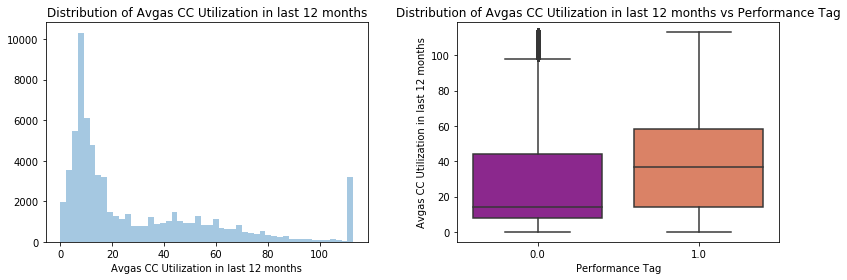

In [102]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(merged['Avgas CC Utilization in last 12 months'].dropna(),kde = False)
plt.title('Distribution of Avgas CC Utilization in last 12 months')
plt.subplot(1,2,2)
sns.boxplot(x='Performance Tag',y='Avgas CC Utilization in last 12 months',data = merged,palette = 'plasma')
plt.title('Distribution of Avgas CC Utilization in last 12 months vs Performance Tag')
plt.tight_layout()
plt.show()

In [103]:
bins = np.arange(0,merged['Avgas CC Utilization in last 12 months'].max() + 12, 12)
merged['acc_bins'] = pd.cut(merged['Avgas CC Utilization in last 12 months'], bins, include_lowest=True)
#checking the default rate
Total_no_of_application = merged.groupby('acc_bins')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('acc_bins')['Performance Tag'].count().reset_index(name = 'count_default')
agg_acc = Total_no_of_application.merge(count_default, on='acc_bins')
agg_acc['default_rate'] = 100*(agg_acc['count_default']/agg_acc['Total no.of application']).round(3)
agg_acc

acc_bins  Total no.of application  count_default  default_rate
0  (-0.001, 12.0]                    29915            616           2.1
1    (12.0, 24.0]                    12591            480           3.8
2    (24.0, 36.0]                     4964            343           6.9
3    (36.0, 48.0]                     5802            428           7.4
4    (48.0, 60.0]                     5027            360           7.2
5    (60.0, 72.0]                     3605            265           7.4
6    (72.0, 84.0]                     2069            149           7.2
7    (84.0, 96.0]                      933             71           7.6
8   (96.0, 108.0]                      525             27           5.1
9  (108.0, 120.0]                     3272            157           4.8

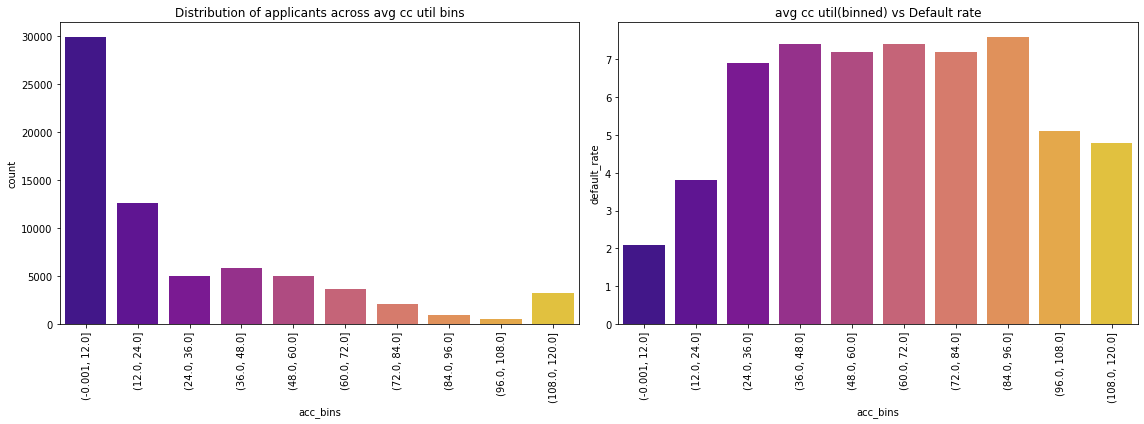

In [104]:
order = sorted(merged['acc_bins'].dropna().unique())
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(merged['acc_bins'],order = order,palette = 'plasma')
plt.xticks(rotation='vertical')
plt.title('Distribution of applicants across avg cc util bins')
plt.subplot(1,2,2)
sns.barplot(x='acc_bins',y='default_rate',data=agg_acc,order = order,palette = 'plasma')
plt.xticks(rotation='vertical')
plt.title('avg cc util(binned) vs Default rate')
plt.tight_layout()
plt.show()

- Most of the credit card users have their avg cc between 0 and 15
- The median of avg utilization for defaults is significantly higher than the non-defaulters
- The is a positive correlation between default rate and avg credit card utilization

### 2.2.8 No of trades opened in last 6 months

Check for outliers:
count    69718.000000
mean         2.288147
std          2.082518
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
90%          5.000000
95%          7.000000
99%          9.000000
max         12.000000
Name: No of trades opened in last 6 months, dtype: float64


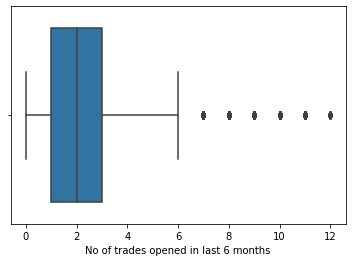

In [105]:
print_bold('Check for outliers:')
print(merged['No of trades opened in last 6 months'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['No of trades opened in last 6 months'])
plt.show()

In [106]:
print(merged['No of trades opened in last 6 months'].value_counts())
print('*'*40)
print(round(100*merged['No of trades opened in last 6 months'].value_counts()/len(merged),2))

1.0     20046
0.0     12137
2.0     12110
3.0      9398
4.0      6294
5.0      3663
6.0      2335
7.0      1649
8.0      1154
9.0       618
10.0      238
11.0       65
12.0       11
Name: No of trades opened in last 6 months, dtype: int64
****************************************
1.0     28.75
0.0     17.41
2.0     17.37
3.0     13.48
4.0      9.03
5.0      5.25
6.0      3.35
7.0      2.37
8.0      1.66
9.0      0.89
10.0     0.34
11.0     0.09
12.0     0.02
Name: No of trades opened in last 6 months, dtype: float64


Text(0, 0.5, 'Performance Frequency')

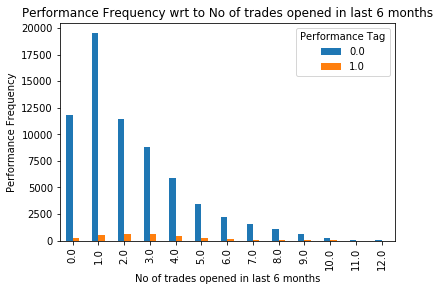

In [107]:
pd.crosstab(merged['No of trades opened in last 6 months'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to No of trades opened in last 6 months')
plt.xlabel('No of trades opened in last 6 months')
plt.ylabel('Performance Frequency')

In [108]:
#checking the default rate
Total_no_of_application = merged.groupby('No of trades opened in last 6 months')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('No of trades opened in last 6 months')['Performance Tag'].count().reset_index(name = 'count_default')
agg_trade6m = Total_no_of_application.merge(count_default, on='No of trades opened in last 6 months')
agg_trade6m['default_rate'] = 100*(agg_trade6m['count_default']/agg_trade6m['Total no.of application']).round(3)
agg_trade6m

No of trades opened in last 6 months  Total no.of application  \
0                                    0.0                    12137   
1                                    1.0                    20046   
2                                    2.0                    12110   
3                                    3.0                     9398   
4                                    4.0                     6294   
5                                    5.0                     3663   
6                                    6.0                     2335   
7                                    7.0                     1649   
8                                    8.0                     1154   
9                                    9.0                      618   
10                                  10.0                      238   
11                                  11.0                       65   

    count_default  default_rate  
0             270           2.2  
1             533           2.7  
2             638           5.3  
3             599           6.4  
4             436           6.9  
5             212           5.8  
6             109           4.7  
7              65           3.9  
8              52           4.5  
9              21           3.4  
10              7           2.9  
11              2           3.1

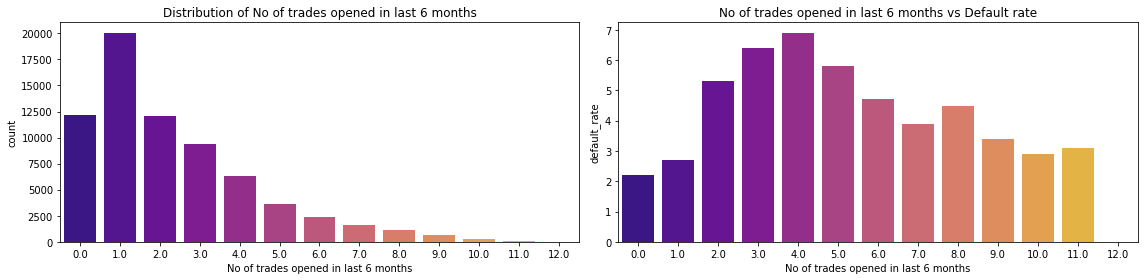

In [109]:
order = sorted(merged['No of trades opened in last 6 months'].dropna().unique())
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(merged['No of trades opened in last 6 months'],order = order,palette = 'plasma')
plt.title('Distribution of No of trades opened in last 6 months')
plt.subplot(1,2,2)
sns.barplot(x='No of trades opened in last 6 months',y='default_rate',data=agg_trade6m,order = order,palette = 'plasma')
plt.title('No of trades opened in last 6 months vs Default rate')
plt.tight_layout()
plt.show()

- majority of the population has 0-4 trades
- default rate seems to increase with number of trades, but there is no clear trend observed

### 2.2.9 No of trades opened in last 12 months

Check for outliers:
count    69719.000000
mean         5.793127
std          5.096497
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
90%         13.000000
95%         16.000000
99%         21.000000
max         28.000000
Name: No of trades opened in last 12 months, dtype: float64


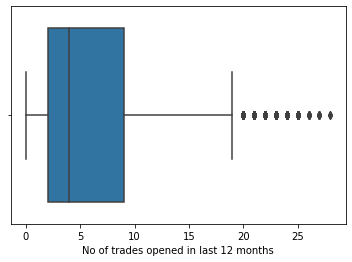

In [110]:
print_bold('Check for outliers:')
print(merged['No of trades opened in last 12 months'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['No of trades opened in last 12 months'])
plt.show()

In [111]:
print(merged['No of trades opened in last 12 months'].value_counts())
print('*'*40)
print(round(100*merged['No of trades opened in last 12 months'].value_counts()/len(merged),2))

1     11315
2      9278
0      4932
4      4848
3      4678
5      4546
6      4206
7      4084
8      3798
9      3375
10     2814
11     2178
12     1703
13     1372
14     1114
15     1067
16      992
17      860
18      736
19      612
20      434
21      308
22      218
23      121
24       73
25       34
26       11
27        9
28        3
Name: No of trades opened in last 12 months, dtype: int64
****************************************
1     16.23
2     13.31
0      7.07
4      6.95
3      6.71
5      6.52
6      6.03
7      5.86
8      5.45
9      4.84
10     4.04
11     3.12
12     2.44
13     1.97
14     1.60
15     1.53
16     1.42
17     1.23
18     1.06
19     0.88
20     0.62
21     0.44
22     0.31
23     0.17
24     0.10
25     0.05
26     0.02
27     0.01
28     0.00
Name: No of trades opened in last 12 months, dtype: float64


Text(0, 0.5, 'Performance Frequency')

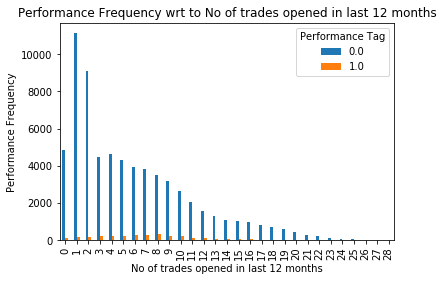

In [112]:
pd.crosstab(merged['No of trades opened in last 12 months'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to No of trades opened in last 12 months')
plt.xlabel('No of trades opened in last 12 months')
plt.ylabel('Performance Frequency')

In [113]:
#checking the default rate
Total_no_of_application = merged.groupby('No of trades opened in last 12 months')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('No of trades opened in last 12 months')['Performance Tag'].count().reset_index(name = 'count_default')
agg_trade12m = Total_no_of_application.merge(count_default, on='No of trades opened in last 12 months')
agg_trade12m['default_rate'] = 100*(agg_trade12m['count_default']/agg_trade12m['Total no.of application']).round(3)
agg_trade12m

No of trades opened in last 12 months  Total no.of application  \
0                                       0                     4932   
1                                       1                    11315   
2                                       2                     9278   
3                                       3                     4678   
4                                       4                     4848   
5                                       5                     4546   
6                                       6                     4206   
7                                       7                     4084   
8                                       8                     3798   
9                                       9                     3375   
10                                     10                     2814   
11                                     11                     2178   
12                                     12                     1703   
13                                     13                     1372   
14                                     14                     1114   
15                                     15                     1067   
16                                     16                      992   
17                                     17                      860   
18                                     18                      736   
19                                     19                      612   
20                                     20                      434   
21                                     21                      308   
22                                     22                      218   
23                                     23                      121   
24                                     24                       73   
25                                     25                       34   

    count_default  default_rate  
0             111           2.3  
1             175           1.5  
2             178           1.9  
3             198           4.2  
4             208           4.3  
5             232           5.1  
6             267           6.3  
7             268           6.6  
8             305           8.0  
9             214           6.3  
10            199           7.1  
11            136           6.2  
12            115           6.8  
13             74           5.4  
14             50           4.5  
15             40           3.7  
16             46           4.6  
17             28           3.3  
18             26           3.5  
19             26           4.2  
20             19           4.4  
21             15           4.9  
22              3           1.4  
23              5           4.1  
24              5           6.8  
25              1           2.9

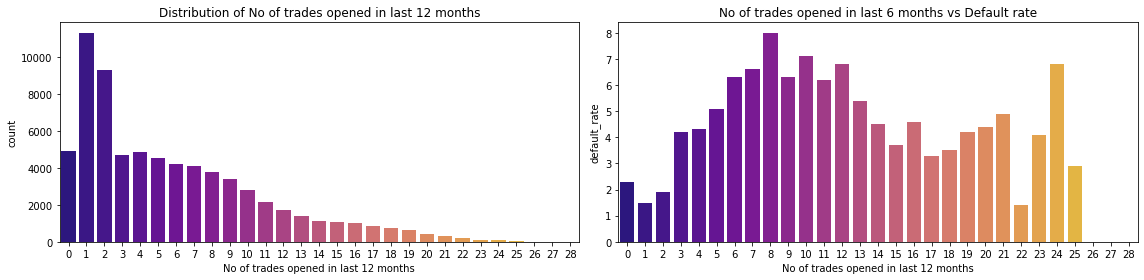

In [114]:
order = sorted(merged['No of trades opened in last 12 months'].dropna().unique())
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(merged['No of trades opened in last 12 months'],order = order,palette = 'plasma')
plt.title('Distribution of No of trades opened in last 12 months')
plt.subplot(1,2,2)
sns.barplot(x='No of trades opened in last 12 months',y='default_rate',data=agg_trade12m,order = order,palette = 'plasma')
plt.title('No of trades opened in last 6 months vs Default rate')
plt.tight_layout()
plt.show()

- majority of the population has 0-4 trades
- default rate seems to increase with number of trades, but there is no clear trend observed

### 2.2.10 No of PL trades opened in last 6 months

Check for outliers:
count    69719.000000
mean         1.191669
std          1.353007
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
90%          3.000000
95%          4.000000
99%          5.000000
max          6.000000
Name: No of PL trades opened in last 6 months, dtype: float64


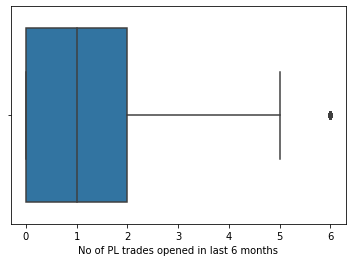

In [115]:
print_bold('Check for outliers:')
print(merged['No of PL trades opened in last 6 months'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['No of PL trades opened in last 6 months'])
plt.show()

In [116]:
print(merged['No of PL trades opened in last 6 months'].value_counts())
print('*'*40)
print(round(100*merged['No of PL trades opened in last 6 months'].value_counts()/len(merged),2))

0    30947
1    13542
2    12558
3     7946
4     3340
5     1090
6      296
Name: No of PL trades opened in last 6 months, dtype: int64
****************************************
0    44.39
1    19.42
2    18.01
3    11.40
4     4.79
5     1.56
6     0.42
Name: No of PL trades opened in last 6 months, dtype: float64


Text(0, 0.5, 'Performance Frequency')

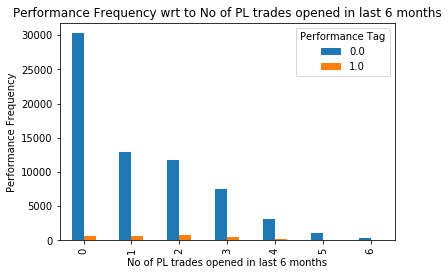

In [117]:
#Performance Frequency wrt to No of PL trades opened in last 6 months
pd.crosstab(merged['No of PL trades opened in last 6 months'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to No of PL trades opened in last 6 months')
plt.xlabel('No of PL trades opened in last 6 months')
plt.ylabel('Performance Frequency')

In [118]:
#checking the default rate
Total_no_of_application = merged.groupby('No of PL trades opened in last 6 months')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('No of PL trades opened in last 6 months')['Performance Tag'].count().reset_index(name = 'count_default')
agg_pltrade6m = Total_no_of_application.merge(count_default, on='No of PL trades opened in last 6 months')
agg_pltrade6m['default_rate'] = 100*(agg_pltrade6m['count_default']/agg_pltrade6m['Total no.of application']).round(3)
agg_pltrade6m

No of PL trades opened in last 6 months  Total no.of application  \
0                                        0                    30947   
1                                        1                    13542   
2                                        2                    12558   
3                                        3                     7946   
4                                        4                     3340   
5                                        5                     1090   
6                                        6                      296   

   count_default  default_rate  
0            696           2.2  
1            691           5.1  
2            803           6.4  
3            501           6.3  
4            197           5.9  
5             48           4.4  
6              8           2.7

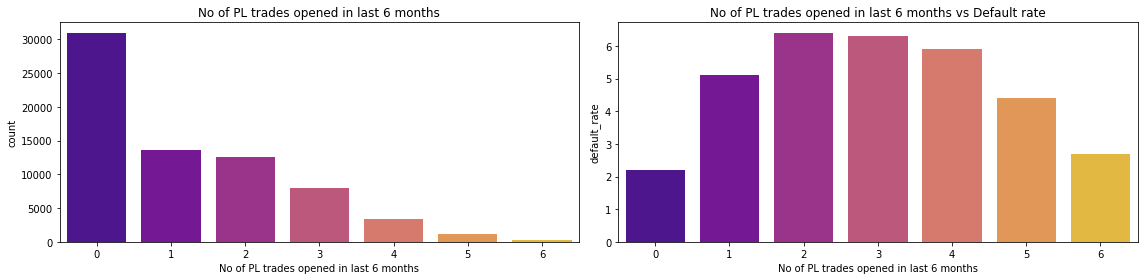

In [119]:
order = sorted(merged['No of PL trades opened in last 6 months'].dropna().unique())
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(merged['No of PL trades opened in last 6 months'],order = order,palette = 'plasma')
plt.title('No of PL trades opened in last 6 months')
plt.subplot(1,2,2)
sns.barplot(x='No of PL trades opened in last 6 months',y='default_rate',data=agg_pltrade6m,order = order,palette = 'plasma')
plt.title('No of PL trades opened in last 6 months vs Default rate')
plt.tight_layout()
plt.show()

- similar trend as in trades is observed here

### 2.2.11 No of PL trades opened in last 12 months

Check for outliers:
count    69719.000000
mean         2.367389
std          2.423758
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
90%          6.000000
95%          7.000000
99%          9.000000
max         12.000000
Name: No of PL trades opened in last 12 months, dtype: float64


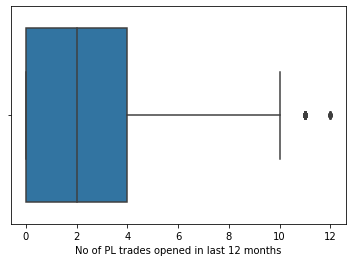

In [120]:
print_bold('Check for outliers:')
print(merged['No of PL trades opened in last 12 months'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['No of PL trades opened in last 12 months'])
plt.show()

In [121]:
print(merged['No of PL trades opened in last 12 months'].value_counts())
print('*'*40)
print(round(100*merged['No of PL trades opened in last 12 months'].value_counts()/len(merged),2))

0     25695
3      8129
4      7895
2      6829
1      6638
5      6187
6      4020
7      2223
8      1171
9       601
10      255
11       66
12       10
Name: No of PL trades opened in last 12 months, dtype: int64
****************************************
0     36.86
3     11.66
4     11.32
2      9.80
1      9.52
5      8.87
6      5.77
7      3.19
8      1.68
9      0.86
10     0.37
11     0.09
12     0.01
Name: No of PL trades opened in last 12 months, dtype: float64


Text(0, 0.5, 'Performance Frequency')

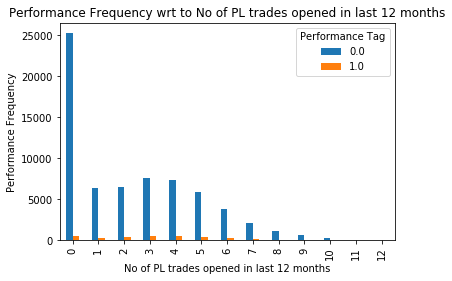

In [122]:
pd.crosstab(merged['No of PL trades opened in last 12 months'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to No of PL trades opened in last 12 months')
plt.xlabel('No of PL trades opened in last 12 months')
plt.ylabel('Performance Frequency')

In [123]:
#checking the default rate
Total_no_of_application = merged.groupby('No of PL trades opened in last 12 months')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('No of PL trades opened in last 12 months')['Performance Tag'].count().reset_index(name = 'count_default')
agg_pltrade12m = Total_no_of_application.merge(count_default, on='No of PL trades opened in last 12 months')
agg_pltrade12m['default_rate'] = 100*(agg_pltrade12m['count_default']/agg_pltrade12m['Total no.of application']).round(3)
agg_pltrade12m

No of PL trades opened in last 12 months  Total no.of application  \
0                                          0                    25695   
1                                          1                     6638   
2                                          2                     6829   
3                                          3                     8129   
4                                          4                     7895   
5                                          5                     6187   
6                                          6                     4020   
7                                          7                     2223   
8                                          8                     1171   
9                                          9                      601   
10                                        10                      255   
11                                        11                       66   
12                                        12                       10   

    count_default  default_rate  
0             454           1.8  
1             247           3.7  
2             366           5.4  
3             507           6.2  
4             535           6.8  
5             391           6.3  
6             243           6.0  
7             109           4.9  
8              50           4.3  
9              28           4.7  
10             10           3.9  
11              3           4.5  
12              1          10.0

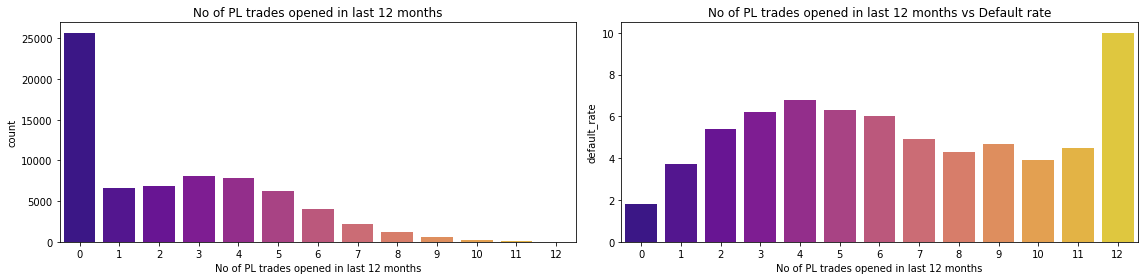

In [124]:
order = sorted(merged['No of PL trades opened in last 12 months'].dropna().unique())
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(merged['No of PL trades opened in last 12 months'],order = order,palette = 'plasma')
plt.title('No of PL trades opened in last 12 months')
plt.subplot(1,2,2)
sns.barplot(x='No of PL trades opened in last 12 months',y='default_rate',data=agg_pltrade12m,order = order,palette = 'plasma')
plt.title('No of PL trades opened in last 12 months vs Default rate')
plt.tight_layout()
plt.show()

- similar trend as in trades is observed here

### 2.2.12 No of Inquiries in last 6 months (excluding home & auto loans)

Check for outliers:
count    69719.000000
mean         1.761012
std          1.985547
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
90%          5.000000
95%          6.000000
99%          8.000000
max         10.000000
Name: No of Inquiries in last 6 months (excluding home & auto loans), dtype: float64


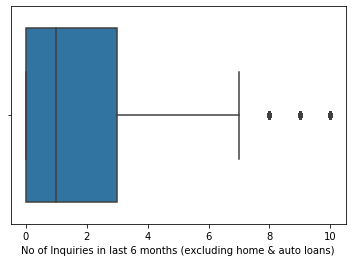

In [125]:
print_bold('Check for outliers:')
print(merged['No of Inquiries in last 6 months (excluding home & auto loans)'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['No of Inquiries in last 6 months (excluding home & auto loans)'])
plt.show()

In [126]:
print(merged['No of Inquiries in last 6 months (excluding home & auto loans)'].value_counts())
print('*'*40)
print(round(100*merged['No of Inquiries in last 6 months (excluding home & auto loans)'].value_counts()/len(merged),2))

0     24940
1     13172
2     12825
3      7250
4      4247
5      3019
6      1750
7      1148
8       835
9       425
10      108
Name: No of Inquiries in last 6 months (excluding home & auto loans), dtype: int64
****************************************
0     35.77
1     18.89
2     18.40
3     10.40
4      6.09
5      4.33
6      2.51
7      1.65
8      1.20
9      0.61
10     0.15
Name: No of Inquiries in last 6 months (excluding home & auto loans), dtype: float64


Text(0, 0.5, 'Performance Frequency')

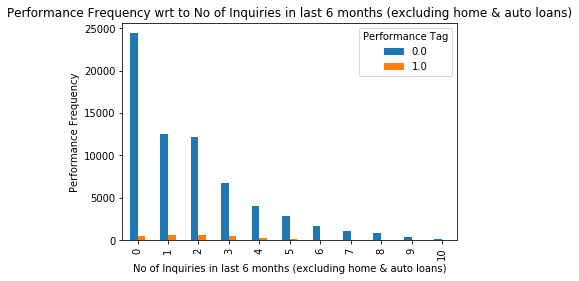

In [127]:
pd.crosstab(merged['No of Inquiries in last 6 months (excluding home & auto loans)'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to No of Inquiries in last 6 months (excluding home & auto loans)')
plt.xlabel('No of Inquiries in last 6 months (excluding home & auto loans)')
plt.ylabel('Performance Frequency')

In [128]:
#checking the default rate
Total_no_of_application = merged.groupby('No of Inquiries in last 6 months (excluding home & auto loans)')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('No of Inquiries in last 6 months (excluding home & auto loans)')['Performance Tag'].count().reset_index(name = 'count_default')
agg_inq6 = Total_no_of_application.merge(count_default, on='No of Inquiries in last 6 months (excluding home & auto loans)')
agg_inq6['default_rate'] = 100*(agg_inq6['count_default']/agg_inq6['Total no.of application']).round(3)
agg_inq6

No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                   0                
1                                                   1                
2                                                   2                
3                                                   3                
4                                                   4                
5                                                   5                
6                                                   6                
7                                                   7                
8                                                   8                
9                                                   9                
10                                                 10                

    Total no.of application  count_default  default_rate  
0                     24940            524           2.1  
1                     13172            658           5.0  
2                     12825            665           5.2  
3                      7250            517           7.1  
4                      4247            269           6.3  
5                      3019            150           5.0  
6                      1750             73           4.2  
7                      1148             40           3.5  
8                       835             33           4.0  
9                       425             13           3.1  
10                      108              2           1.9

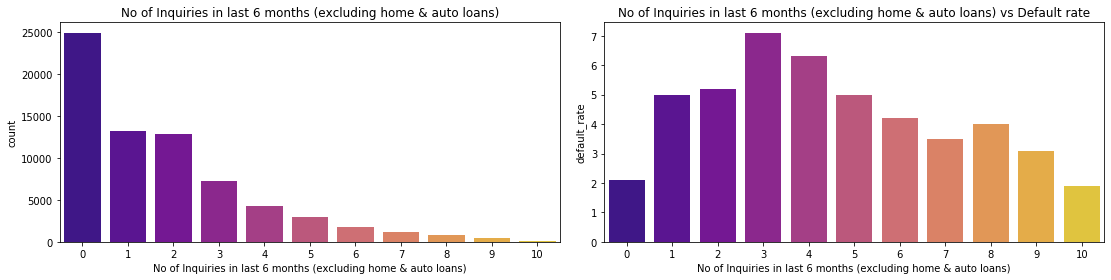

In [129]:
order = sorted(merged['No of Inquiries in last 6 months (excluding home & auto loans)'].dropna().unique())
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(merged['No of Inquiries in last 6 months (excluding home & auto loans)'],order = order,palette = 'plasma')
plt.title('No of Inquiries in last 6 months (excluding home & auto loans)')
plt.subplot(1,2,2)
sns.barplot(x='No of Inquiries in last 6 months (excluding home & auto loans)',y='default_rate',data=agg_inq6,order = order,palette = 'plasma')
plt.title('No of Inquiries in last 6 months (excluding home & auto loans) vs Default rate')
plt.tight_layout()
plt.show()

- similar trend as in trades is observed before

### 2.2.13 No of Inquiries in last 12 months (excluding home & auto loans)

Check for outliers:
count    69719.000000
mean         3.531218
std          3.612168
min          0.000000
25%          0.000000
50%          3.000000
75%          5.000000
90%          9.000000
95%         11.000000
99%         15.000000
max         20.000000
Name: No of Inquiries in last 12 months (excluding home & auto loans), dtype: float64


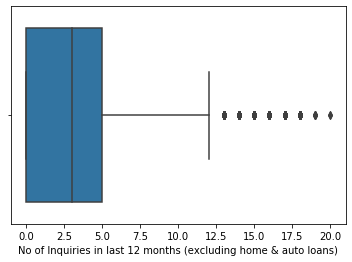

In [130]:
print_bold('Check for outliers:')
print(merged['No of Inquiries in last 12 months (excluding home & auto loans)'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['No of Inquiries in last 12 months (excluding home & auto loans)'])
plt.show()

In [131]:
print(merged['No of Inquiries in last 12 months (excluding home & auto loans)'].value_counts())
print('*'*40)
print(round(100*merged['No of Inquiries in last 12 months (excluding home & auto loans)'].value_counts()/len(merged),2))

0     20453
3      8972
2      7905
4      7110
5      4925
1      3898
6      3611
7      2990
8      2345
9      1777
10     1508
11     1231
12      935
13      789
14      553
15      360
16      212
17       97
18       40
19        6
20        2
Name: No of Inquiries in last 12 months (excluding home & auto loans), dtype: int64
****************************************
0     29.34
3     12.87
2     11.34
4     10.20
5      7.06
1      5.59
6      5.18
7      4.29
8      3.36
9      2.55
10     2.16
11     1.77
12     1.34
13     1.13
14     0.79
15     0.52
16     0.30
17     0.14
18     0.06
19     0.01
20     0.00
Name: No of Inquiries in last 12 months (excluding home & auto loans), dtype: float64


Text(0, 0.5, 'Performance Frequency')

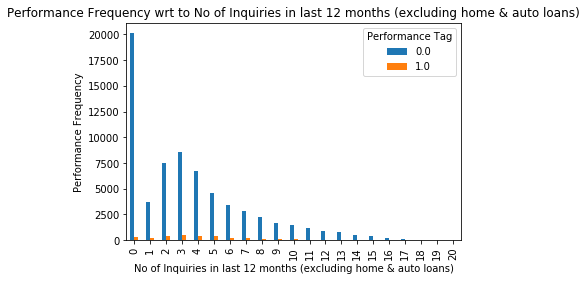

In [132]:
pd.crosstab(merged['No of Inquiries in last 12 months (excluding home & auto loans)'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to No of Inquiries in last 12 months (excluding home & auto loans)')
plt.xlabel('No of Inquiries in last 12 months (excluding home & auto loans)')
plt.ylabel('Performance Frequency')

In [133]:
#checking the default rate
Total_no_of_application = merged.groupby('No of Inquiries in last 12 months (excluding home & auto loans)')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('No of Inquiries in last 12 months (excluding home & auto loans)')['Performance Tag'].count().reset_index(name = 'count_default')
agg_inq12 = Total_no_of_application.merge(count_default, on='No of Inquiries in last 12 months (excluding home & auto loans)')
agg_inq12['default_rate'] = 100*(agg_inq12['count_default']/agg_inq12['Total no.of application']).round(3)
agg_inq12

No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                   0                 
1                                                   1                 
2                                                   2                 
3                                                   3                 
4                                                   4                 
5                                                   5                 
6                                                   6                 
7                                                   7                 
8                                                   8                 
9                                                   9                 
10                                                 10                 
11                                                 11                 
12                                                 12                 
13                                                 13                 
14                                                 14                 
15                                                 15                 
16                                                 16                 
17                                                 17                 

    Total no.of application  count_default  default_rate  
0                     20453            304           1.5  
1                      3898            155           4.0  
2                      7905            382           4.8  
3                      8972            443           4.9  
4                      7110            380           5.3  
5                      4925            362           7.4  
6                      3611            247           6.8  
7                      2990            209           7.0  
8                      2345            141           6.0  
9                      1777             71           4.0  
10                     1508             84           5.6  
11                     1231             53           4.3  
12                      935             40           4.3  
13                      789             26           3.3  
14                      553             23           4.2  
15                      360             12           3.3  
16                      212              6           2.8  
17                       97              6           6.2

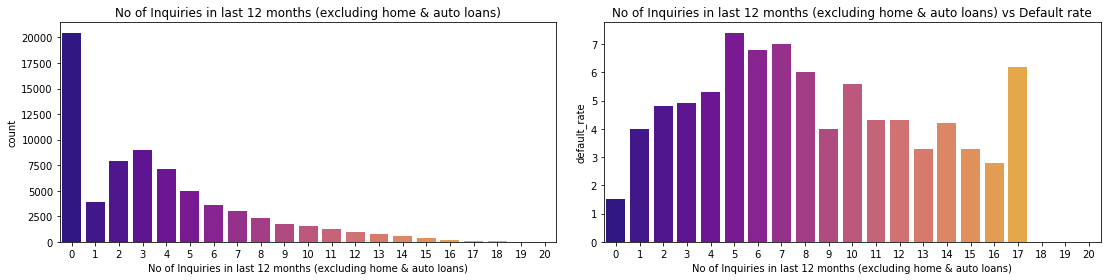

In [134]:
order = sorted(merged['No of Inquiries in last 12 months (excluding home & auto loans)'].dropna().unique())
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(merged['No of Inquiries in last 12 months (excluding home & auto loans)'],order = order,palette='plasma')
plt.title('No of Inquiries in last 12 months (excluding home & auto loans)')
plt.subplot(1,2,2)
sns.barplot(x='No of Inquiries in last 12 months (excluding home & auto loans)',y='default_rate',data=agg_inq12,order = order,palette = 'plasma')
plt.title('No of Inquiries in last 12 months (excluding home & auto loans) vs Default rate')
plt.tight_layout()
plt.show()

- similar trend as in trades is observed before

### 2.2.14 Presence of open Home loan

In [135]:
print(merged['Presence of open home loan'].value_counts())
print('*'*40)
print(round(100*merged['Presence of open home loan'].value_counts()/len(merged),2))

0.0    51445
1.0    18002
Name: Presence of open home loan, dtype: int64
****************************************
0.0    73.79
1.0    25.82
Name: Presence of open home loan, dtype: float64


Text(0, 0.5, 'Performance Frequency')

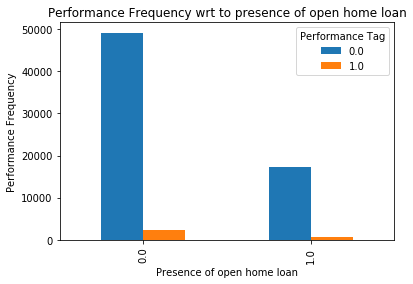

In [136]:
#Performance Frequency wrt to presence of open home loan
pd.crosstab(merged['Presence of open home loan'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to presence of open home loan')
plt.xlabel('Presence of open home loan')
plt.ylabel('Performance Frequency')

In [137]:
#checking the default rate
Total_no_of_application = merged.groupby('Presence of open home loan')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('Presence of open home loan')['Performance Tag'].count().reset_index(name = 'count_default')
agg_hl = Total_no_of_application.merge(count_default, on='Presence of open home loan')
agg_hl['default_rate'] = 100*(agg_hl['count_default']/agg_hl['Total no.of application']).round(3)
agg_hl

Presence of open home loan  Total no.of application  count_default  \
0                         0.0                    51445           2330   
1                         1.0                    18002            606   

   default_rate  
0           4.5  
1           3.4

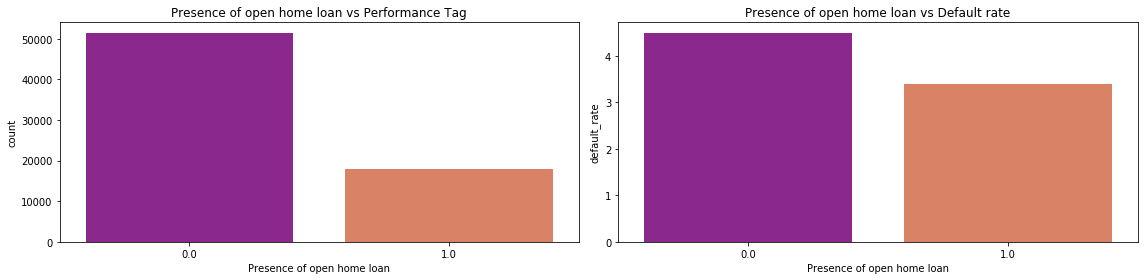

In [138]:
order = sorted(merged['Presence of open home loan'].dropna().unique())
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(merged['Presence of open home loan'],order = order,palette = 'plasma')
plt.title('Presence of open home loan vs Performance Tag')
plt.subplot(1,2,2)
sns.barplot(x='Presence of open home loan',y='default_rate',data=agg_hl,order = order,palette = 'plasma')
plt.title('Presence of open home loan vs Default rate')
plt.tight_layout()
plt.show()

- 70% of the population doesnt have a open home loan
- It seems like people without of a homeloan have higher default rate

### 2.2.15 Outstanding balance

Check for outliers:
count    6.944700e+04
mean     1.252785e+06
std      1.285716e+06
min      0.000000e+00
25%      2.086640e+05
50%      7.741880e+05
75%      2.925399e+06
90%      3.283499e+06
95%      3.650993e+06
99%      4.251014e+06
max      5.218801e+06
Name: Outstanding Balance, dtype: float64


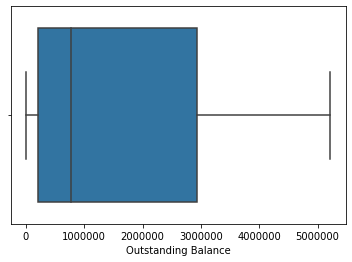

In [139]:
print_bold('Check for outliers:')
print(merged['Outstanding Balance'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['Outstanding Balance'])
plt.show()

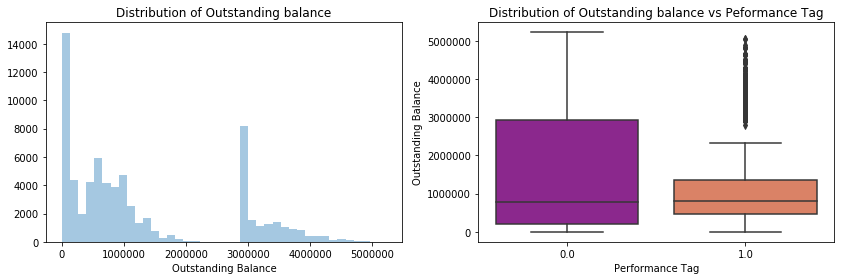

In [140]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(merged['Outstanding Balance'].dropna(),kde = False)
plt.title('Distribution of Outstanding balance')
plt.subplot(1,2,2)
sns.boxplot(x='Performance Tag',y='Outstanding Balance',data = merged,palette = 'plasma')
plt.title('Distribution of Outstanding balance vs Peformance Tag')
plt.tight_layout()
plt.show()

In [141]:
bins = np.arange(0,merged['Outstanding Balance'].max() + 10, 1000000)
merged['ob_bins'] = pd.cut(merged['Outstanding Balance'], bins, include_lowest=True)
#checking the default rate
Total_no_of_application = merged.groupby('ob_bins')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('ob_bins')['Performance Tag'].count().reset_index(name = 'count_default')
agg_ob = Total_no_of_application.merge(count_default, on='ob_bins')
agg_ob['default_rate'] = 100*(agg_ob['count_default']/agg_ob['Total no.of application']).round(3)
agg_ob

ob_bins  Total no.of application  count_default  \
0     (-0.001, 1000000.0]                    43159           1849   
1  (1000000.0, 2000000.0]                     8192            478   
2  (2000000.0, 3000000.0]                     8247            132   
3  (3000000.0, 4000000.0]                     8363            408   
4  (4000000.0, 5000000.0]                     1474             67   

   default_rate  
0           4.3  
1           5.8  
2           1.6  
3           4.9  
4           4.5

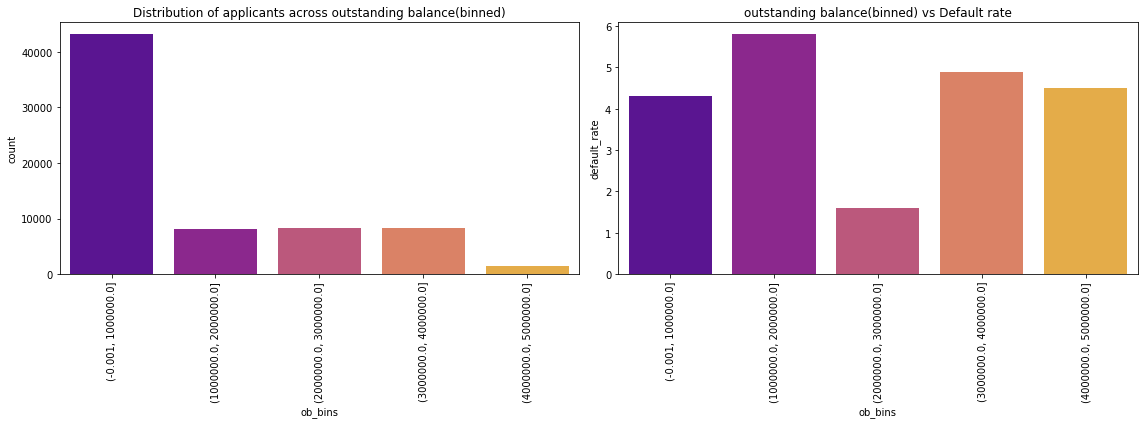

In [142]:
order = sorted(merged['ob_bins'].dropna().unique())
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(merged['ob_bins'],order = order,palette = 'plasma')
plt.title('Distribution of applicants across outstanding balance(binned)')
plt.xticks(rotation='vertical')
plt.subplot(1,2,2)
sns.barplot(x='ob_bins',y='default_rate',data=agg_ob,order = order,palette = 'plasma')
plt.title('outstanding balance(binned) vs Default rate')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

- More than 50% of the population has outstanding balance between 0 and 1e6.
- There is not general trend that can be seen here
- The category with income between 2e6 adn 3e6 seems to do far better than the others.

### 2.2.16 Presence of open auto loan

In [143]:
print(merged['Presence of open auto loan'].value_counts())
print('*'*40)
print(round(100*merged['Presence of open auto loan'].value_counts()/len(merged),2))

0    63805
1     5914
Name: Presence of open auto loan, dtype: int64
****************************************
0    91.52
1     8.48
Name: Presence of open auto loan, dtype: float64


Text(0, 0.5, 'Performance Frequency')

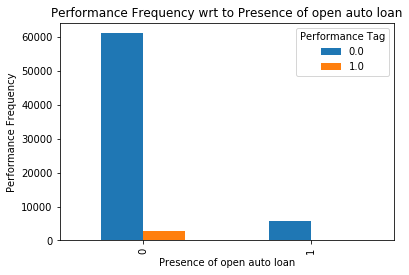

In [144]:
#Performance Frequency wrt to Presence of open auto loan
pd.crosstab(merged['Presence of open auto loan'],merged['Performance Tag']).plot(kind='bar')
plt.title('Performance Frequency wrt to Presence of open auto loan')
plt.xlabel('Presence of open auto loan')
plt.ylabel('Performance Frequency')

In [145]:
#checking the default rate
Total_no_of_application = merged.groupby('Presence of open auto loan')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('Presence of open auto loan')['Performance Tag'].count().reset_index(name = 'count_default')
agg_al = Total_no_of_application.merge(count_default, on='Presence of open auto loan')
agg_al['default_rate'] = 100*(agg_al['count_default']/agg_al['Total no.of application']).round(3)
agg_al

Presence of open auto loan  Total no.of application  count_default  \
0                           0                    63805           2725   
1                           1                     5914            219   

   default_rate  
0           4.3  
1           3.7

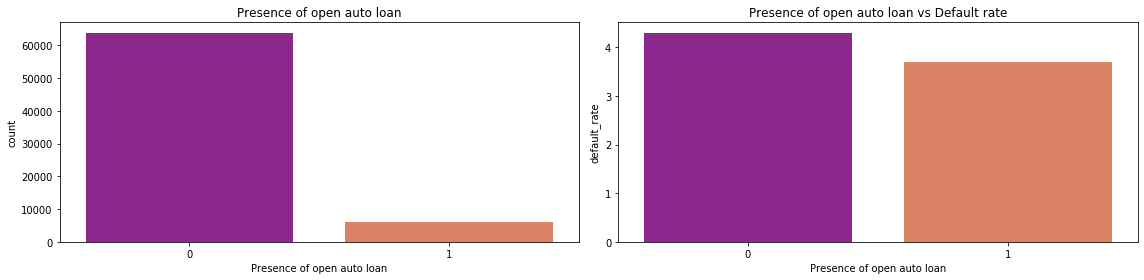

In [146]:
order = sorted(merged['Presence of open auto loan'].dropna().unique())
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(merged['Presence of open auto loan'],order = order,palette = 'plasma')
plt.title('Presence of open auto loan')
plt.subplot(1,2,2)
sns.barplot(x='Presence of open auto loan',y='default_rate',data=agg_al,order = order,palette = 'plasma')
plt.title('Presence of open auto loan vs Default rate')
plt.tight_layout()
plt.show()

- Similar to the results from open house loan

### 2.2.17 Total No of trades

Check for outliers:
count    69719.000000
mean         8.184785
std          7.156114
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
90%         20.000000
95%         25.000000
99%         31.000000
max         44.000000
Name: Total No of Trades, dtype: float64


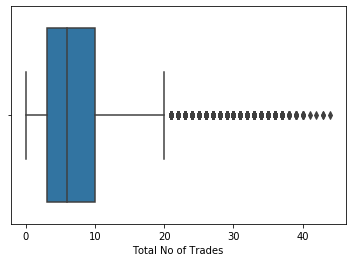

In [147]:
print_bold('Check for outliers:')
print(merged['Total No of Trades'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(merged['Total No of Trades'])
plt.show()

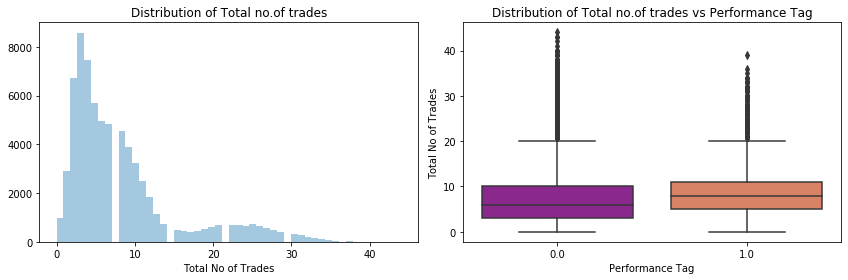

In [148]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(merged['Total No of Trades'].dropna(),kde = False)
plt.title('Distribution of Total no.of trades')
plt.subplot(1,2,2)
sns.boxplot(x='Performance Tag',y='Total No of Trades',data = merged,palette = 'plasma')
plt.title('Distribution of Total no.of trades vs Performance Tag')
plt.tight_layout()
plt.show()

In [149]:
bins = np.arange(0,merged['Total No of Trades'].max() + 5, 5)
merged['trade_bins'] = pd.cut(merged['Total No of Trades'], bins, include_lowest=True)
#checking the default rate
Total_no_of_application = merged.groupby('trade_bins')['Performance Tag'].count().reset_index(name = 'Total no.of application')
count_default = merged[merged['Performance Tag']==1].groupby('trade_bins')['Performance Tag'].count().reset_index(name = 'count_default')
agg_tt = Total_no_of_application.merge(count_default, on='trade_bins')
agg_tt['default_rate'] = 100*(agg_tt['count_default']/agg_tt['Total no.of application']).round(3)
agg_tt

trade_bins  Total no.of application  count_default  default_rate
0  (-0.001, 5.0]                    32367            808           2.5
1    (5.0, 10.0]                    21449           1306           6.1
2   (10.0, 15.0]                     6664            476           7.1
3   (15.0, 20.0]                     2421             84           3.5
4   (20.0, 25.0]                     3460            131           3.8
5   (25.0, 30.0]                     2455            102           4.2
6   (30.0, 35.0]                      794             35           4.4
7   (35.0, 40.0]                      104              2           1.9
8   (40.0, 45.0]                        5              0           0.0

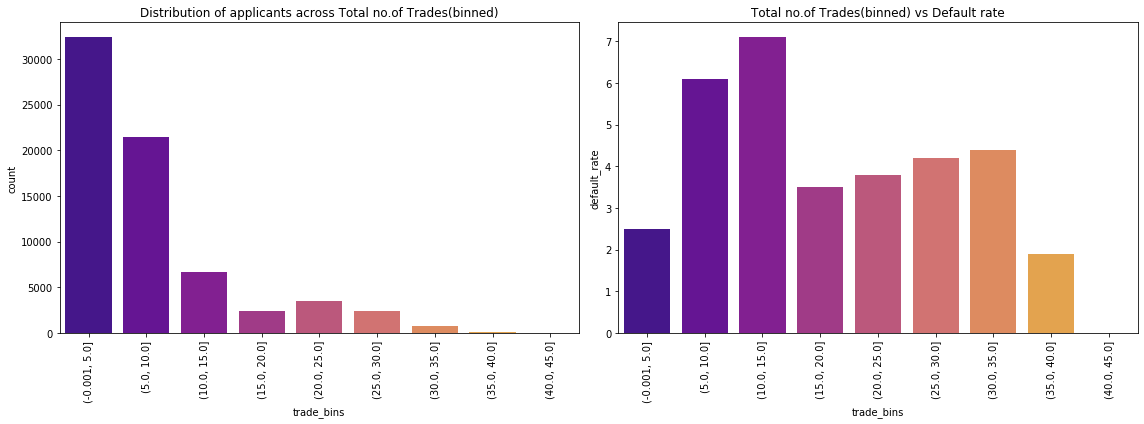

In [150]:
order = sorted(merged['trade_bins'].dropna().unique())
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(merged['trade_bins'],order = order,palette = 'plasma')
plt.xticks(rotation='vertical')
plt.title('Distribution of applicants across Total no.of Trades(binned)')
plt.subplot(1,2,2)
sns.barplot(x='trade_bins',y='default_rate',data=agg_tt,order = order,palette = 'plasma')
plt.xticks(rotation='vertical')
plt.title('Total no.of Trades(binned) vs Default rate')
plt.tight_layout()
plt.show()

- about 50% of the population has 0 to 5 trades
- There seems to a positive correlation between no of trades and the default rate
- Default rate is maximum in category with trades between 10 and 15

### 2.2.18 Correlation among Credit bureau variables

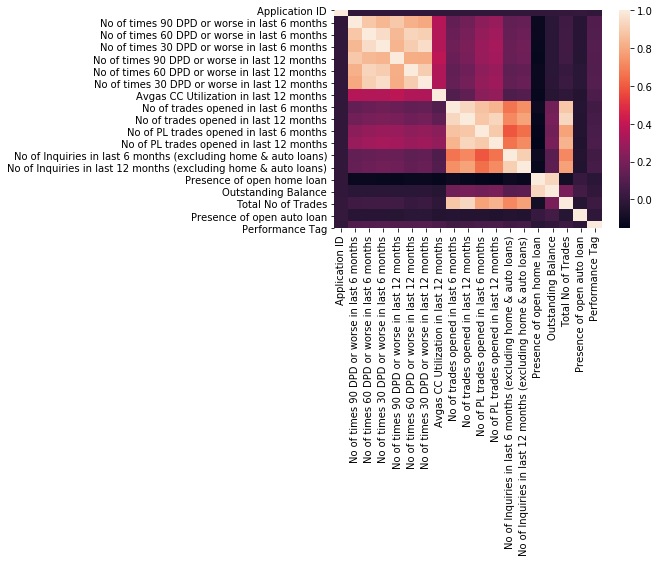

In [151]:
sns.heatmap(cred.corr())
plt.show()

- We can see the presence of highly correlated clusters in the heat map
- One where all DPDs are related and one with all trade variables are related

#### Few data quality issues to note for further correction(in credit bureau columns):
(These issues are other than null values):

All the below mentioned columns have few outliers in the data:

    No of times 60 DPD or worse in last 6 months                          
    No of times 30 DPD or worse in last 6 months                          
    No of times 90 DPD or worse in last 12 months                         
    No of times 60 DPD or worse in last 12 months                         
    No of times 30 DPD or worse in last 12 months                         
    Avgas CC Utilization in last 12 months                             
    No of trades opened in last 6 months                                 
    No of trades opened in last 12 months                                 
    No of PL trades opened in last 6 months                               
    No of PL trades opened in last 12 months                              
    No of Inquiries in last 6 months (excluding home & auto loans)        
    No of Inquiries in last 12 months (excluding home & auto loans)                                                
    Total No of Trades                                       

#### EDA summary for credit bureau data variables: 


1. Maximum of the credit card is issued to people having no open home or auto loan.
2. Maximum credit card holders who have done total number of trading between 1 to 13.
3. Maximum of credit card holders have done one or two trading in the last 6/12 months.
4. Maximum of credit card holders  have not done any PL trading in the last 6/12 months.
5. Most of the credit card holders haven't done any inquiries in the last 6/12 months (excluding home & auto loans) .
6. Most of the customer have not defaulted in the 30/60/90 days past due in last 6/12 months.
7. Maximum Outstanding Balance range fall under (0 to 10,00,000).
8. Average credit utilization is in the range 0 to 20.

With respect `performance tag`:

1. We see higher default rate among Outstanding Balance range (10,00,000 to 20,00,000). However it is important to note that there are few data points in this range. 
2. Though we see that there is higher default rate among people having no home loan or no auto loan, it is also important to note that presence of home loans data have the fewest data entries in the dataframe.
3. We observed higher the number of trading done, higher is the default rate in the last 6/12 months .
4. We note that all the trade columns are highly correlated to each other. 
5. We see default rate is higher for the customers who has done inquiries(excluding home and auto loans) for 3 times/ 5 to 8 times in the last 6 /12 months.
6. Obvious behavior: As DPD increases or worse , the default rate also increases. And DPD columns are highly correlated.
7. Mostly as the average credit utilization increases, the default rate increases.

## 2.3 Few other observation

### 2.3.1 `Avgas CC Utilization in last 12 months vs Income`: 

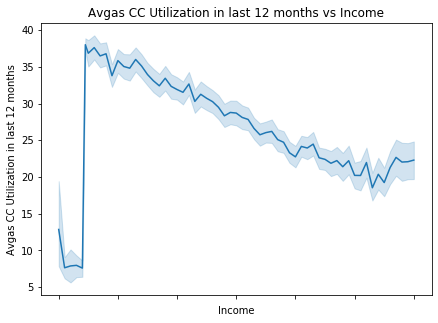

In [152]:
plt.figure(figsize=(7,5))
ax = sns.lineplot(y='Avgas CC Utilization in last 12 months', x='Income', data=merged)
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Avgas CC Utilization in last 12 months vs Income')
plt.show()

- As income increases, average utilization of credit card by customer decreases. 

### 2.3.2 `No of Inquiries in last 6 months (excluding home & auto loans) vs Income`:

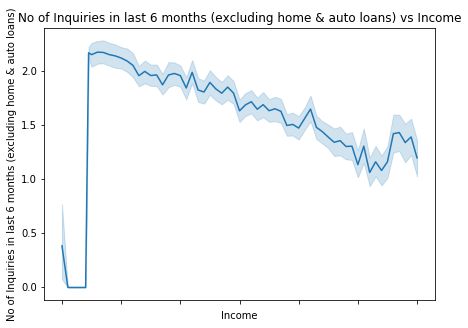

In [153]:
plt.figure(figsize=(7,5))
ax = sns.lineplot(y='No of Inquiries in last 6 months (excluding home & auto loans)', x='Income', data=merged)
ax.set_xticklabels(ax.get_xticklabels())
plt.title('No of Inquiries in last 6 months (excluding home & auto loans) vs Income')
plt.show()

As income increases, number of times the customer inquiried decreases.

### 2.3.3 `No of times 30 DPD or worse in last 6 months vs Income:`

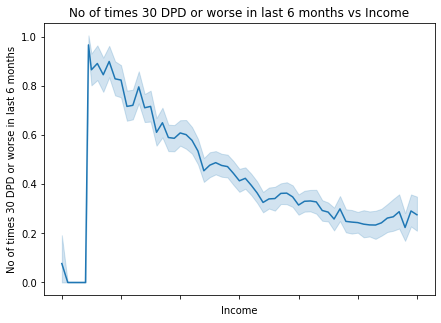

In [154]:
plt.figure(figsize=(7,5))
ax = sns.lineplot(y='No of times 30 DPD or worse in last 6 months', x='Income', data=merged)
ax.set_xticklabels(ax.get_xticklabels())
plt.title('No of times 30 DPD or worse in last 6 months vs Income')
plt.show()

As income increases, number of times customer has not payed dues since 30 days days last 6 months decreases

### 2.3.4 `Outstanding balance and total trades`

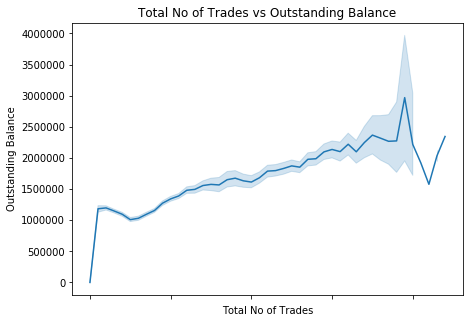

In [155]:
plt.figure(figsize=(7,5))
ax = sns.lineplot(x='Total No of Trades', y='Outstanding Balance', data=merged)
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Total No of Trades vs Outstanding Balance')
plt.show()

Higher the outstanding balance, higher is the total number of trades.

# 3.WOE and IV

We saw few variables have outliers and null values during our EDA. But as we are going impute our dataframe with WOE values, the outliers and null values will be automatically handled via WOE binning.

Few advantages of WOE transformation are:

    * Handles missing values
    * Handles outliers
    * No need for dummy variables.

In [156]:
#WOE and IV functions

import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 5

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1
            

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["BAD"] = d2.sum().Y
    d3["GOOD"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["BAD"] = justmiss.sum().Y
        d4["GOOD"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["BAD_RATE"] = d3.BAD/d3.COUNT
    d3["GOOD_RATE"] = d3.GOOD/d3.COUNT
    d3["DIST_BAD"] = d3.BAD/d3.sum().BAD
    d3["DIST_GOOD"] = d3.GOOD/d3.sum().GOOD
    d3["WOE"] = np.log(d3.DIST_GOOD/d3.DIST_BAD)
    d3["IV"] = (d3.DIST_GOOD-d3.DIST_BAD)*np.log(d3.DIST_GOOD/d3.DIST_BAD)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'BAD', 'BAD_RATE', 'GOOD', 
             'GOOD_RATE', 'DIST_BAD','DIST_GOOD','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["BAD"] = df2.sum().Y
    d3["GOOD"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["BAD"] = justmiss.sum().Y
        d4["GOOD"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["BAD_RATE"] = d3.BAD/d3.COUNT
    d3["GOOD_RATE"] = d3.GOOD/d3.COUNT
    d3["DIST_BAD"] = d3.BAD/d3.sum().BAD
    d3["DIST_GOOD"] = d3.GOOD/d3.sum().GOOD
    d3["WOE"] = np.log(d3.DIST_GOOD/d3.DIST_BAD)
    d3["IV"] = (d3.DIST_GOOD-d3.DIST_BAD)*np.log(d3.DIST_GOOD/d3.DIST_BAD)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'BAD', 'BAD_RATE', 'GOOD', 'GOOD_RATE', 'DIST_BAD','DIST_GOOD','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
                
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

## 3.1 Replacing null values with WOE values

In [157]:
merged_safe = merged.copy()

In [158]:
merged.drop(['age_bins', 'income_bins', 'mcr_bins', 'mcc_bins', 'acc_bins',
       'ob_bins', 'trade_bins'],axis = 1,inplace = True)

In [159]:
merged.set_index('Application ID',inplace = True)

In [160]:
data,iv = data_vars(merged.drop('Performance Tag',axis = 1), merged['Performance Tag'])

In [161]:
data.head()

VAR_NAME MIN_VALUE MAX_VALUE  COUNT     BAD  BAD_RATE     GOOD  GOOD_RATE  \
0      Age        18        40  24531  1069.0  0.043578  23462.0   0.956422   
1      Age        41        50  22846   958.0  0.041933  21888.0   0.958067   
2      Age        51        65  22342   917.0  0.041044  21425.0   0.958956   
3   Gender         F         F  16471   718.0  0.043592  15753.0   0.956408   
4   Gender         M         M  53247  2226.0  0.041805  51021.0   0.958195   

   DIST_BAD  DIST_GOOD       WOE        IV  
0  0.363111   0.351359 -0.032901  0.000682  
1  0.325408   0.327787  0.007286  0.000682  
2  0.311481   0.320854  0.029647  0.000682  
3  0.243886   0.235912 -0.033243  0.000348  
4  0.756114   0.764073  0.010472  0.000348

In [162]:
merged_safe1 = merged.copy()

In [163]:
#replacing the null values
for x in merged.isnull().sum()[merged.isnull().sum()>0].index:
    replace_value = data[(pd.isnull(data.MAX_VALUE))&(data.VAR_NAME==x)].WOE.item()
    merged[x] = merged[x].replace(np.nan,replace_value) 

In [164]:
merged.isnull().sum()

Age                                                                0
Gender                                                             0
Marital Status (at the time of application)                        0
No of dependents                                                   0
Income                                                             0
Education                                                          0
Profession                                                         0
Type of residence                                                  0
No of months in current residence                                  0
No of months in current company                                    0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in last 6 months                       0
No of times 90 DPD or worse in last 12 months                      0
No of times 60 DPD or worse in las

- NO null values

### 3.2 Replacing all the values with WOE values

In [165]:
woe_merged = merged.copy()

In [166]:
# as per variable range, assigning the woe values:
for var in woe_merged.columns:
    small_df = data[data['VAR_NAME'] == var]
    small_df = small_df[~(small_df.MIN_VALUE.isnull())]
    small_df = small_df[~(small_df.MAX_VALUE.isnull())]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            woe_merged[var] = woe_merged[var].apply(lambda x: eval(replace_cmd))
        except:
            woe_merged[var] = woe_merged[var].apply(lambda x: eval(replace_cmd1))

In [167]:
woe_merged.head()

Age    Gender  \
Application ID                       
954457215       0.007286 -0.033243   
432830445      -0.032901  0.010472   
941387308      -0.032901  0.010472   
392161677       0.007286  0.010472   
182011211      -0.032901 -0.033243   

                Marital Status (at the time of application)  No of dependents  \
Application ID                                                                  
954457215                                          0.003972          0.019118   
432830445                                          0.003972          0.024876   
941387308                                         -0.023173          0.019118   
392161677                                          0.003972          0.019118   
182011211                                          0.003972         -0.000488   

                  Income  Education  Profession  Type of residence  \
Application ID                                                       
954457215       0.245302  -0.015217    0.027568           0.004161   
432830445       0.263523   0.017330    0.013677           0.004161   
941387308       0.263523  -0.015217    0.013677           0.004161   
392161677       0.263523  -0.015217   -0.090445           0.004161   
182011211       0.245302   0.017330    0.027568           0.004161   

                No of months in current residence  \
Application ID                                      
954457215                               -0.029135   
432830445                               -0.029135   
941387308                               -0.029135   
392161677                               -0.029135   
182011211                               -0.029135   

                No of months in current company  \
Application ID                                    
954457215                              0.123039   
432830445                              0.073502   
941387308                              0.073502   
392161677                              0.123039   
182011211                              0.073502   

                No of times 90 DPD or worse in last 6 months  \
Application ID                                                 
954457215                                           0.036865   
432830445                                           0.036865   
941387308                                           0.036865   
392161677                                           0.036865   
182011211                                           0.036865   

                No of times 60 DPD or worse in last 6 months  \
Application ID                                                 
954457215                                           0.121509   
432830445                                           0.121509   
941387308                                           0.121509   
392161677                                           0.121509   
182011211                                           0.121509   

                No of times 30 DPD or worse in last 6 months  \
Application ID                                                 
954457215                                           0.198709   
432830445                                           0.198709   
941387308                                           0.198709   
392161677                                           0.198709   
182011211                                           0.198709   

                No of times 90 DPD or worse in last 12 months  \
Application ID                                                  
954457215                                            0.133744   
432830445                                            0.133744   
941387308                                            0.133744   
392161677                                            0.133744   
182011211                                            0.133744   

                No of times 60 DPD or worse in last 12 months  \
Application ID                                                  
954457215                       

## 3.3 important variables using IV

In [168]:
# creating Variable_Predictiveness column
iv.loc[iv.IV < 0.02, 'Variable_Predictiveness'] = 'Not useful for prediction'  
iv.loc[iv.IV >= 0.5, 'Variable_Predictiveness'] = 'Suspicious Predictive Power'  
iv.loc[(iv.IV >= 0.02) & (iv.IV < 0.1), 'Variable_Predictiveness'] = 'Weak predictive Power'  
iv.loc[(iv.IV >= 0.1) & (iv.IV < 0.3) , 'Variable_Predictiveness'] = 'Medium predictive Power'  
iv.loc[(iv.IV >= 0.3) & (iv.IV < 0.5) , 'Variable_Predictiveness'] = 'Strong predictive Power' 

In [169]:
# printing the important variables
iv.sort_values('IV', ascending = False)

VAR_NAME        IV  \
1              Avgas CC Utilization in last 12 months  0.294117   
19              No of trades opened in last 12 months  0.257558   
6   No of Inquiries in last 12 months (excluding h...  0.229287   
25                                 Total No of Trades  0.190025   
13      No of times 30 DPD or worse in last 12 months  0.188084   
8            No of PL trades opened in last 12 months  0.178891   
21                                Outstanding Balance  0.175553   
20               No of trades opened in last 6 months  0.173375   
14       No of times 30 DPD or worse in last 6 months  0.145751   
15      No of times 60 DPD or worse in last 12 months  0.137659   
9             No of PL trades opened in last 6 months  0.125287   
7   No of Inquiries in last 6 months (excluding ho...  0.096079   
17      No of times 90 DPD or worse in last 12 months  0.095775   
16       No of times 60 DPD or worse in last 6 months  0.089620   
12                  No of months in current residence  0.067782   
4                                              Income  0.038135   
18       No of times 90 DPD or worse in last 6 months  0.030744   
11                    No of months in current company  0.010948   
24                                         Profession  0.002170   
22                         Presence of open auto loan  0.001619   
26                                  Type of residence  0.000955   
10                                   No of dependents  0.000933   
2                                           Education  0.000774   
0                                                 Age  0.000682   
23                         Presence of open home loan  0.000465   
3                                              Gender  0.000348   
5         Marital Status (at the time of application)  0.000093   

      Variable_Predictiveness  
1     Medium predictive Power  
19    Medium predictive Power  
6     Medium predictive Power  
25    Medium predictive Power  
13    Medium predictive Power  
8     Medium predictive Power  
21    Medium predictive Power  
20    Medium predictive Power  
14    Medium predictive Power  
15    Medium predictive Power  
9     Medium predictive Power  
7       Weak predictive Power  
17      Weak predictive Power  
16      Weak predictive Power  
12      Weak predictive Power  
4       Weak predictive Power  
18      Weak predictive Power  
11  Not useful for prediction  
24  Not useful for prediction  
22  Not useful for prediction  
26  Not useful for prediction  
10  Not useful for prediction  
2   Not useful for prediction  
0   Not useful for prediction  
23  Not useful for prediction  
3   Not useful for prediction  
5   Not useful for prediction

- There are 11 variables with medium predictive power and all of them are from credit data

## 3.4 IV plot

[]

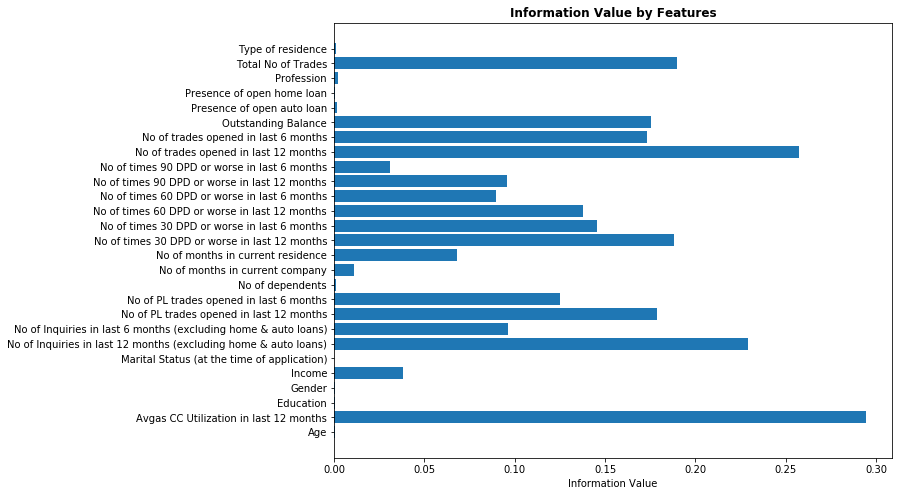

In [170]:
plt.figure(figsize=(10,8))
plt.barh(iv['VAR_NAME'], iv['IV'])
plt.xlabel('Information Value')
plt.title('Information Value by Features', fontweight="bold")
plt.plot()

- Avg CC utilization,No of trades and No of inquires are the top 3 variables that have high iv value

## 3.5 WOE plots

In [171]:
woe_merged.columns

Index(['Age', 'Gender', 'Marital Status (at the time of application)',
       'No of dependents', 'Income', 'Education', 'Profession',
       'Type of residence', 'No of months in current residence',
       'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loa

### 3.5.1 Avgas CC Utilization in last 12 months

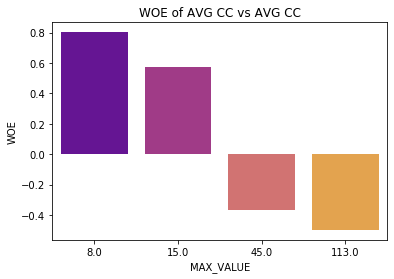

In [172]:
feature = 'Avgas CC Utilization in last 12 months'
sns.barplot(x = 'MAX_VALUE',y='WOE',data = data[(data.VAR_NAME == feature )&~pd.isnull(data.MAX_VALUE)],palette = 'plasma')
plt.title('WOE of AVG CC vs AVG CC')
plt.show()

### 3.5.2 No of trades opened in last 12 months

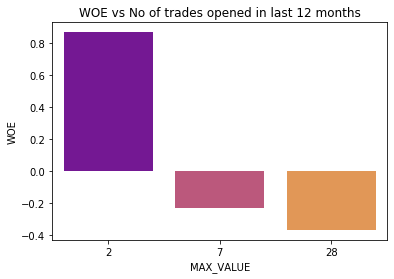

In [173]:
feature = 'No of trades opened in last 12 months'
sns.barplot(x = 'MAX_VALUE',y='WOE',data = data[(data.VAR_NAME == feature )&~pd.isnull(data.MAX_VALUE)],palette = 'plasma')
plt.title('WOE vs No of trades opened in last 12 months')
plt.show()

### 3.5.3 No of Inquiries in last 12 months (excluding home & auto loans)

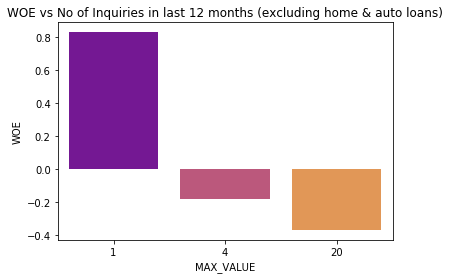

In [174]:
feature = 'No of Inquiries in last 12 months (excluding home & auto loans)'
sns.barplot(x = 'MAX_VALUE',y='WOE',data = data[(data.VAR_NAME == feature )&~pd.isnull(data.MAX_VALUE)],palette = 'plasma')
plt.title('WOE vs No of Inquiries in last 12 months (excluding home & auto loans)')
plt.show()

### 3.5.4 Total No of Trades

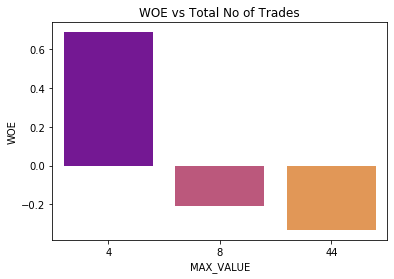

In [175]:
feature = 'Total No of Trades'
sns.barplot(x = 'MAX_VALUE',y='WOE',data = data[(data.VAR_NAME == feature )&~pd.isnull(data.MAX_VALUE)],palette = 'plasma')
plt.title('WOE vs Total No of Trades')
plt.show()

### 3.5.5 No of times 30 DPD or worse in last 12 months

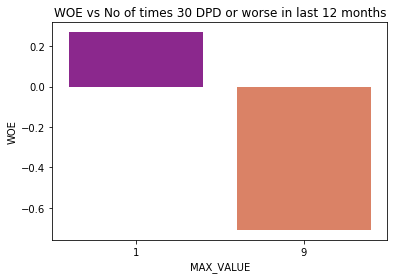

In [176]:
feature = 'No of times 30 DPD or worse in last 12 months'
sns.barplot(x = 'MAX_VALUE',y='WOE',data = data[(data.VAR_NAME == feature )&~pd.isnull(data.MAX_VALUE)],palette = 'plasma')
plt.title('WOE vs No of times 30 DPD or worse in last 12 months')
plt.show()

### 3.5.6 Outstanding Balance

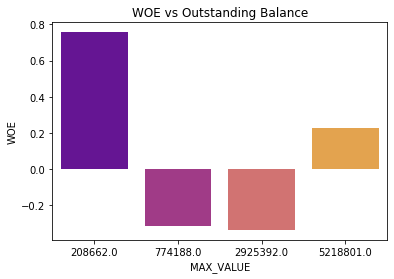

In [177]:
feature = 'Outstanding Balance'
sns.barplot(x = 'MAX_VALUE',y='WOE',data = data[(data.VAR_NAME == feature )&~pd.isnull(data.MAX_VALUE)],palette = 'plasma')
plt.title('WOE vs Outstanding Balance')
plt.show()

### 3.5.7 Income

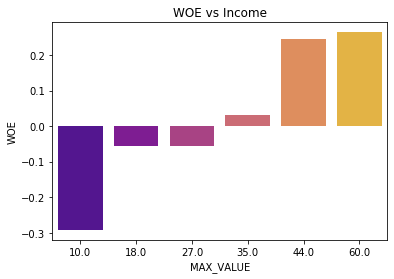

In [178]:
feature = 'Income'
sns.barplot(x = 'MAX_VALUE',y='WOE',data = data[(data.VAR_NAME == feature )&~pd.isnull(data.MAX_VALUE)],palette = 'plasma')
plt.title('WOE vs Income')
plt.show()

- Almost all the variables have monotic woe,except for outstanding balance
- Since WOE values are log values of odds, all the features have woe values in the same scale (majorly between -1 and 1) and since the values are replaced by woe values, the scaling is not required
- The replacement of values with woe values also removes the presence of outliers

# 4.Model building

### 4.1 Model using only demographic data

In [179]:
demo_cols = demo.columns.tolist()

In [180]:
demo_cols.remove('Application ID')
print(demo_cols)

['Age', 'Gender', 'Marital Status (at the time of application)', 'No of dependents', 'Income', 'Education', 'Profession', 'Type of residence', 'No of months in current residence', 'No of months in current company', 'Performance Tag']


In [181]:
X_demo = woe_merged[demo_cols].drop('Performance Tag',axis = 1)
y_demo = woe_merged['Performance Tag']

In [182]:
X_demo.head()

Age    Gender  \
Application ID                       
954457215       0.007286 -0.033243   
432830445      -0.032901  0.010472   
941387308      -0.032901  0.010472   
392161677       0.007286  0.010472   
182011211      -0.032901 -0.033243   

                Marital Status (at the time of application)  No of dependents  \
Application ID                                                                  
954457215                                          0.003972          0.019118   
432830445                                          0.003972          0.024876   
941387308                                         -0.023173          0.019118   
392161677                                          0.003972          0.019118   
182011211                                          0.003972         -0.000488   

                  Income  Education  Profession  Type of residence  \
Application ID                                                       
954457215       0.245302  -0.015217    0.027568           0.004161   
432830445       0.263523   0.017330    0.013677           0.004161   
941387308       0.263523  -0.015217    0.013677           0.004161   
392161677       0.263523  -0.015217   -0.090445           0.004161   
182011211       0.245302   0.017330    0.027568           0.004161   

                No of months in current residence  \
Application ID                                      
954457215                               -0.029135   
432830445                               -0.029135   
941387308                               -0.029135   
392161677                               -0.029135   
182011211                               -0.029135   

                No of months in current company  
Application ID                                   
954457215                              0.123039  
432830445                              0.073502  
941387308                              0.073502  
392161677                              0.123039  
182011211                              0.073502

### 4.1.1 Train test split

In [183]:
X_train_demo,X_test_demo,y_train_demo,y_test_demo = train_test_split(X_demo,y_demo,test_size = 0.3,random_state = 42,stratify = y_demo)

### 4.1.2 Logistic Regression

In [184]:
#renaming the our test train data to keep it consistent

#For logistic regression:
X_train_lg =X_train_demo.copy()
X_test_lg = X_test_demo.copy()
y_train_lg = y_train_demo.copy()
y_test_lg = y_test_demo.copy()

In [185]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_demo_sm = sm.add_constant(X_train_demo)
logm1 = sm.GLM(y_train_demo, X_train_demo_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48803
Model:                            GLM   Df Residuals:                    48792
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8436.6
Date:                Mon, 23 Dec 2019   Deviance:                       16873.
Time:                        13:28:28   Pearson chi2:                 4.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -3.1208      0.023   -136.928      0.000      -3.165      -3.076
Age                                            -0.5002      0.888     -0.563      0.573      -2.240       1.240
Gender                                          0.1707      1.219      0.140      0.889      -2.219       2.560
Marital Status (at the time of application)     0.4979      2.388      0.208      0.835      -4.183       5.178
No of dependents                               -0.7550      0.734     -1.029      0.303      -2.193       0.683
Income                                         -0.7957      0.117     -6.793      0.000      -1.025      -0.566
Education                                      -1.5390      0.675     -2.280      0.023      -2.862      -0.216
Profession                                     -0.9085      0.479     -1.896      0.058      -1.848       0.031
Type of residence                              -1.2775      0.819     -1.560      0.119      -2.882       0.327
No of months in current residence              -0.8726      0.086    -10.111      0.000      -1.042      -0.703
No of months in current company                -0.9681      0.215     -4.494      0.000      -1.390      -0.546
===============================================================================================================
"""

#### checking VIF

In [186]:
cols = X_train_demo.columns.tolist()

In [187]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = cols
vif['VIF'] = [variance_inflation_factor(X_train_demo[cols].values, i) for i in range(X_train_demo[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                          Age  1.07
2  Marital Status (at the time of application)  1.05
4                                       Income  1.03
8            No of months in current residence  1.03
7                            Type of residence  1.01
9              No of months in current company  1.01
1                                       Gender  1.00
3                             No of dependents  1.00
5                                    Education  1.00
6                                   Profession  1.00

- Dropping Gender because of very high p value

In [188]:
cols.remove('Gender')

#### model 2

In [189]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_demo_sm = sm.add_constant(X_train_demo[cols])
logm1 = sm.GLM(y_train_demo, X_train_demo_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48803
Model:                            GLM   Df Residuals:                    48793
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8436.6
Date:                Mon, 23 Dec 2019   Deviance:                       16873.
Time:                        13:28:30   Pearson chi2:                 4.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -3.1207      0.023   -136.936      0.000      -3.165      -3.076
Age                                            -0.5011      0.888     -0.564      0.572      -2.241       1.239
Marital Status (at the time of application)     0.4995      2.388      0.209      0.834      -4.181       5.180
No of dependents                               -0.7550      0.734     -1.029      0.303      -2.193       0.683
Income                                         -0.7958      0.117     -6.793      0.000      -1.025      -0.566
Education                                      -1.5394      0.675     -2.281      0.023      -2.862      -0.217
Profession                                     -0.9079      0.479     -1.894      0.058      -1.847       0.031
Type of residence                              -1.2774      0.819     -1.560      0.119      -2.882       0.327
No of months in current residence              -0.8728      0.086    -10.114      0.000      -1.042      -0.704
No of months in current company                -0.9679      0.215     -4.493      0.000      -1.390      -0.546
===============================================================================================================
"""

#### checking VIF

In [190]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = cols
vif['VIF'] = [variance_inflation_factor(X_train_demo[cols].values, i) for i in range(X_train_demo[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                          Age  1.07
1  Marital Status (at the time of application)  1.05
3                                       Income  1.03
7            No of months in current residence  1.03
6                            Type of residence  1.01
8              No of months in current company  1.01
2                             No of dependents  1.00
4                                    Education  1.00
5                                   Profession  1.00

- Dropping Marital status

In [191]:
cols.remove('Marital Status (at the time of application)')

### model 3 

In [192]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_demo_sm = sm.add_constant(X_train_demo[cols])
logm1 = sm.GLM(y_train_demo, X_train_demo_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48803
Model:                            GLM   Df Residuals:                    48794
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8436.7
Date:                Mon, 23 Dec 2019   Deviance:                       16873.
Time:                        13:28:32   Pearson chi2:                 4.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1208      0.023   -136.940      0.000      -3.165      -3.076
Age                                  -0.4605      0.866     -0.531      0.595      -2.159       1.238
No of dependents                     -0.7546      0.734     -1.029      0.304      -2.192       0.683
Income                               -0.7954      0.117     -6.791      0.000      -1.025      -0.566
Education                            -1.5408      0.675     -2.283      0.022      -2.864      -0.218
Profession                           -0.9083      0.479     -1.895      0.058      -1.848       0.031
Type of residence                    -1.2708      0.817     -1.555      0.120      -2.873       0.331
No of months in current residence    -0.8728      0.086    -10.113      0.000      -1.042      -0.704
No of months in current company      -0.9681      0.215     -4.494      0.000      -1.390      -0.546
=====================================================================================================
"""

- Dropping Age

In [193]:
cols.remove('Age')

#### model 4

In [194]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_demo_sm = sm.add_constant(X_train_demo[cols])
logm1 = sm.GLM(y_train_demo, X_train_demo_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48803
Model:                            GLM   Df Residuals:                    48795
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8436.8
Date:                Mon, 23 Dec 2019   Deviance:                       16874.
Time:                        13:28:32   Pearson chi2:                 4.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1208      0.023   -136.943      0.000      -3.165      -3.076
No of dependents                     -0.7672      0.733     -1.046      0.295      -2.204       0.670
Income                               -0.7990      0.117     -6.835      0.000      -1.028      -0.570
Education                            -1.5496      0.675     -2.296      0.022      -2.872      -0.227
Profession                           -0.9080      0.479     -1.895      0.058      -1.847       0.031
Type of residence                    -1.3155      0.819     -1.607      0.108      -2.920       0.289
No of months in current residence    -0.8738      0.086    -10.129      0.000      -1.043      -0.705
No of months in current company      -0.9656      0.215     -4.483      0.000      -1.388      -0.543
=====================================================================================================
"""

- Dropping no of dependents

In [195]:
cols.remove('No of dependents')

#### model 5

In [196]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_demo_sm = sm.add_constant(X_train_demo[cols])
logm1 = sm.GLM(y_train_demo, X_train_demo_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48803
Model:                            GLM   Df Residuals:                    48796
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8437.3
Date:                Mon, 23 Dec 2019   Deviance:                       16875.
Time:                        13:28:32   Pearson chi2:                 4.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1208      0.023   -136.951      0.000      -3.165      -3.076
Income                               -0.8022      0.117     -6.866      0.000      -1.031      -0.573
Education                            -1.5520      0.675     -2.300      0.021      -2.875      -0.229
Profession                           -0.9081      0.479     -1.895      0.058      -1.847       0.031
Type of residence                    -1.3270      0.821     -1.616      0.106      -2.936       0.282
No of months in current residence    -0.8748      0.086    -10.142      0.000      -1.044      -0.706
No of months in current company      -0.9654      0.215     -4.482      0.000      -1.388      -0.543
=====================================================================================================
"""

- Dropping Type of residence

In [197]:
cols.remove('Type of residence')

#### model 6

In [198]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_demo_sm = sm.add_constant(X_train_demo[cols])
logm1 = sm.GLM(y_train_demo, X_train_demo_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48803
Model:                            GLM   Df Residuals:                    48797
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8438.8
Date:                Mon, 23 Dec 2019   Deviance:                       16878.
Time:                        13:28:32   Pearson chi2:                 4.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1205      0.023   -136.996      0.000      -3.165      -3.076
Income                               -0.8051      0.117     -6.892      0.000      -1.034      -0.576
Education                            -1.5607      0.675     -2.311      0.021      -2.884      -0.237
Profession                           -0.8707      0.479     -1.819      0.069      -1.809       0.068
No of months in current residence    -0.8751      0.086    -10.145      0.000      -1.044      -0.706
No of months in current company      -0.9660      0.215     -4.485      0.000      -1.388      -0.544
=====================================================================================================
"""

- Dropping profession

In [199]:
cols.remove('Profession')

#### model 7

In [200]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_demo_sm = sm.add_constant(X_train_demo[cols])
logm1 = sm.GLM(y_train_demo, X_train_demo_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48803
Model:                            GLM   Df Residuals:                    48798
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8440.4
Date:                Mon, 23 Dec 2019   Deviance:                       16881.
Time:                        13:28:33   Pearson chi2:                 4.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1204      0.023   -137.025      0.000      -3.165      -3.076
Income                               -0.8046      0.117     -6.887      0.000      -1.034      -0.576
Education                            -1.5444      0.675     -2.288      0.022      -2.867      -0.222
No of months in current residence    -0.8767      0.086    -10.165      0.000      -1.046      -0.708
No of months in current company      -0.9656      0.215     -4.483      0.000      -1.388      -0.543
=====================================================================================================
"""

#### checking VIF

In [201]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = cols
vif['VIF'] = [variance_inflation_factor(X_train_demo[cols].values, i) for i in range(X_train_demo[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                             Income  1.03
2  No of months in current residence  1.03
3    No of months in current company  1.01
1                          Education  1.00

All p-values and VIF values are acceptable

In [202]:
logistic = LogisticRegression(class_weight= 'balanced', random_state = 42)
params = [{'C': [0.1,0.2, 0.3, 0.4 ,0.5, 0.8, 0.9, 1, 2], 'penalty': ['l1', 'l2']}]
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
logreg_model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc')
logreg_model.fit(X_train_demo[cols],y_train_demo)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.9, 1, 2],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [203]:
# print best hyperparameters
print("Best AUC: ", logreg_model.best_score_)
print("Best hyperparameters: ", logreg_model.best_params_)

Best AUC:  0.5884264591327838
Best hyperparameters:  {'C': 2, 'penalty': 'l2'}


In [204]:
#y train probability prediction
y_train_prob_pred = logreg_model.predict_proba(X_train_demo[cols])

# combining X_train and y_train_prob_pred
y_train_pred_final = pd.DataFrame(y_train_prob_pred[:,1],index = X_train_demo.index).reset_index().rename(columns = {0:'performance_prob'})
y_train_pred_final = y_train_pred_final.merge(y_train_demo.reset_index(),on='Application ID')
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag
0       707978764          0.476296              0.0
1       131395592          0.494782              1.0
2        96569465          0.530457              0.0
3       754389325          0.408190              0.0
4       920953361          0.479807              0.0

#### ROC curve

In [188]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

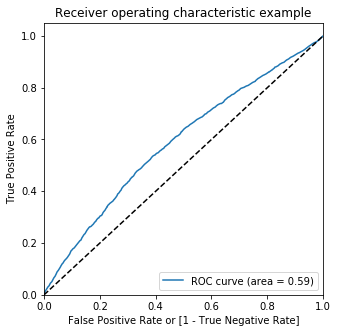

In [206]:
# Call the ROC function
draw_roc(y_train_pred_final['Performance Tag'], y_train_pred_final.performance_prob)

- The ROC curve area is 0.59, which is not great. Let us check our optimal cutoff

#### Optimal Cutoff

In [207]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.performance_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag  0.0  0.1  0.2  0.3  0.4  \
0       707978764          0.476296              0.0    1    1    1    1    1   
1       131395592          0.494782              1.0    1    1    1    1    1   
2        96569465          0.530457              0.0    1    1    1    1    1   
3       754389325          0.408190              0.0    1    1    1    1    1   
4       920953361          0.479807              0.0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    1    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [208]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Performance Tag'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.042231  1.000000  0.000000
0.1   0.1  0.042231  1.000000  0.000000
0.2   0.2  0.042231  1.000000  0.000000
0.3   0.3  0.042231  1.000000  0.000000
0.4   0.4  0.141569  0.921883  0.107163
0.5   0.5  0.604983  0.537603  0.607954
0.6   0.6  0.876442  0.157690  0.908134
0.7   0.7  0.957503  0.002426  0.999615
0.8   0.8  0.957769  0.000000  1.000000
0.9   0.9  0.957769  0.000000  1.000000


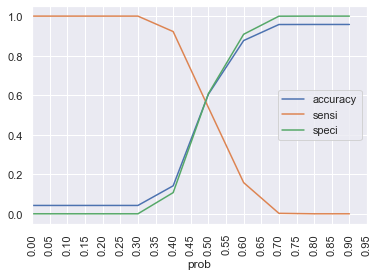

In [209]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set()
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,0.05))
plt.xticks(rotation='vertical')
plt.show()

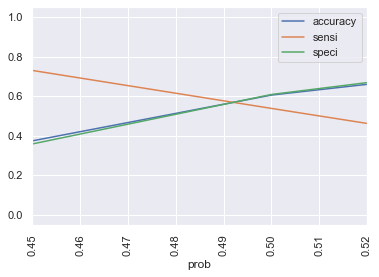

In [210]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0.45,0.52,0.01))
plt.xticks(rotation='vertical')
plt.xlim(0.45,0.52)
plt.show()

- The optimal cutoff point is 0.492

In [211]:
#creating final prediction on train dataset
y_train_pred_final['final_train_prediction'] = y_train_pred_final.performance_prob.map( lambda x: 1 if x > 0.492 else 0)
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag  0.0  0.1  0.2  0.3  0.4  \
0       707978764          0.476296              0.0    1    1    1    1    1   
1       131395592          0.494782              1.0    1    1    1    1    1   
2        96569465          0.530457              0.0    1    1    1    1    1   
3       754389325          0.408190              0.0    1    1    1    1    1   
4       920953361          0.479807              0.0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_train_prediction  
0    0    0    0    0    0                       0  
1    0    0    0    0    0                       1  
2    1    0    0    0    0                       1  
3    0    0    0    0    0                       0  
4    0    0    0    0    0                       0

### Evaluation Matrix

#### Train data

In [212]:
# Let's check the overall accuracy.
print('Train Accuracy:', accuracy_score(y_train_pred_final['Performance Tag'], y_train_pred_final.final_train_prediction))

confusion_train = confusion_matrix(y_train_pred_final['Performance Tag'], y_train_pred_final.final_train_prediction)
print(confusion_train)

TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity:",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

# Calculate false postive rate 
print('False poisitive rate:',FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive power :',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive power :',TN / float(TN+ FN))

Train Accuracy: 0.5591459541421634
[[26094 20648]
 [  867  1194]]
Sensitivity: 0.5793304221251819
Specificity: 0.558255958238843
False poisitive rate: 0.441744041761157
Positive predictive power : 0.054665323688306934
Negative predictive power : 0.9678424390786692


### Making prediction on test data

In [213]:
y_test_pred = logreg_model.predict_proba(X_test_demo[cols])

In [214]:
# combining X_test prospect id and y_test_pred
y_test_pred_final = pd.DataFrame(y_test_pred[:,1],index = X_test_demo[cols].index).reset_index().rename(columns = {0:'performance_prob'})
y_test_pred_final = pd.merge(y_test_pred_final,y_test_demo.reset_index(), on = 'Application ID')
y_test_pred_final['final_test_prediction'] = y_test_pred_final.performance_prob.map(lambda x : 1 if x > 0.492 else 0)
y_test_pred_final.head()

Application ID  performance_prob  Performance Tag  final_test_prediction
0       859752985          0.530457              0.0                      1
1       587815635          0.371080              0.0                      0
2        45482412          0.477098              0.0                      0
3       647271529          0.431645              0.0                      0
4       122001435          0.611864              0.0                      1

#### Evaluating on Test data

In [215]:
# Let's check the overall accuracy.
print('Test Accuracy:', accuracy_score(y_test_pred_final['Performance Tag'], y_test_pred_final.final_test_prediction))

confusion_test = confusion_matrix(y_test_pred_final['Performance Tag'], y_test_pred_final.final_test_prediction)
print(confusion_test)

TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity:",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

# Calculate false postive rate 
print('False poisitive rate:',FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive power :',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive power :',TN / float(TN+ FN))

Test Accuracy: 0.556368330464716
[[11123  8910]
 [  369   514]]
Sensitivity: 0.5821064552661381
Specificity: 0.5552338641241951
False poisitive rate: 0.44476613587580494
Positive predictive power : 0.054541595925297115
Negative predictive power : 0.9678907065784894


In [216]:
print(metrics.roc_auc_score(y_test_demo,y_test_pred[:,1]))

0.5970542715504694


### 4.1.2 Decision Tree

In [217]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced',random_state = 42)

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_demo, y_train_demo)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   11.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                  

In [218]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.153409      0.071210         0.008000    5.059843e-03   
1        0.075604      0.003611         0.004600    7.999778e-04   
2        0.090205      0.007414         0.005600    1.019814e-03   
3        0.076804      0.018434         0.004000    6.324097e-04   
4        0.072604      0.000490         0.004000    1.168008e-07   
5        0.094405      0.020974         0.005000    1.095453e-03   
6        0.131208      0.010246         0.007800    2.135560e-03   
7        0.232013      0.130004         0.013801    9.662846e-03   
8        0.288817      0.059479         0.019001    6.542535e-03   
9        0.077204      0.041443         0.004000    6.324851e-04   
10       0.067604      0.004454         0.004200    9.799682e-04   
11       0.091005      0.014575         0.005400    2.059194e-03   
12       0.153809      0.006795         0.007201    2.135587e-03   
13       0.152209      0.009065         0.006600    1.854774e-03   
14       0.113607      0.023089         0.004800    7.482900e-04   
15       0.345220      0.097250         0.018401    5.607422e-03   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                    100   
3          entropy               5                    100   
4          entropy              10                     50   
5          entropy              10                     50   
6          entropy              10                    100   
7          entropy              10                    100   
8             gini               5                     50   
9             gini               5                     50   
10            gini               5                    100   
11            gini               5                    100   
12            gini              10                     50   
13            gini              10                     50   
14            gini              10                    100   
15            gini              10                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
5                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
6                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
7                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
8                       50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
9                      100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
10                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
11                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
12                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
13                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
14                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
15                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.535239           0.549431           0.591189   
1            0.535239           0.549431           0.591189   
2            0.538005           0.547075           0.588730   
3            0.538005           0.547075           0.588730   
4            0.573243           0.548919           0.568750   
5            0.573243           0.548919           0.

In [219]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.5827305698420179
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [220]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(class_weight='balanced',criterion = "gini", 
                                  random_state = 42,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train_demo, y_train_demo)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [221]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(X_train_demo.columns[0:])
features

C:\Users\Pramodini\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['Age',
 'Gender',
 'Marital Status (at the time of application)',
 'No of dependents',
 'Income',
 'Education',
 'Profession',
 'Type of residence',
 'No of months in current residence',
 'No of months in current company']

In [222]:
# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

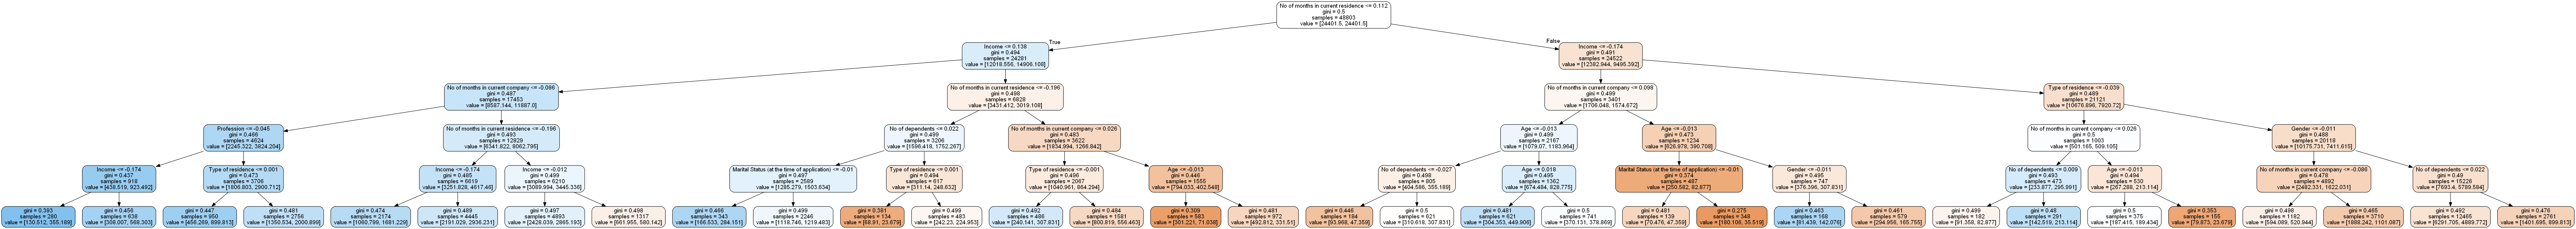

In [223]:
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Let us reduce max_depth to 3 to get clear picture.

In [224]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(class_weight='balanced',criterion = "gini", 
                                  random_state = 42,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train_demo, y_train_demo)

# score
print(clf_gini.score(X_train_demo, y_train_demo))

0.5225703337909555


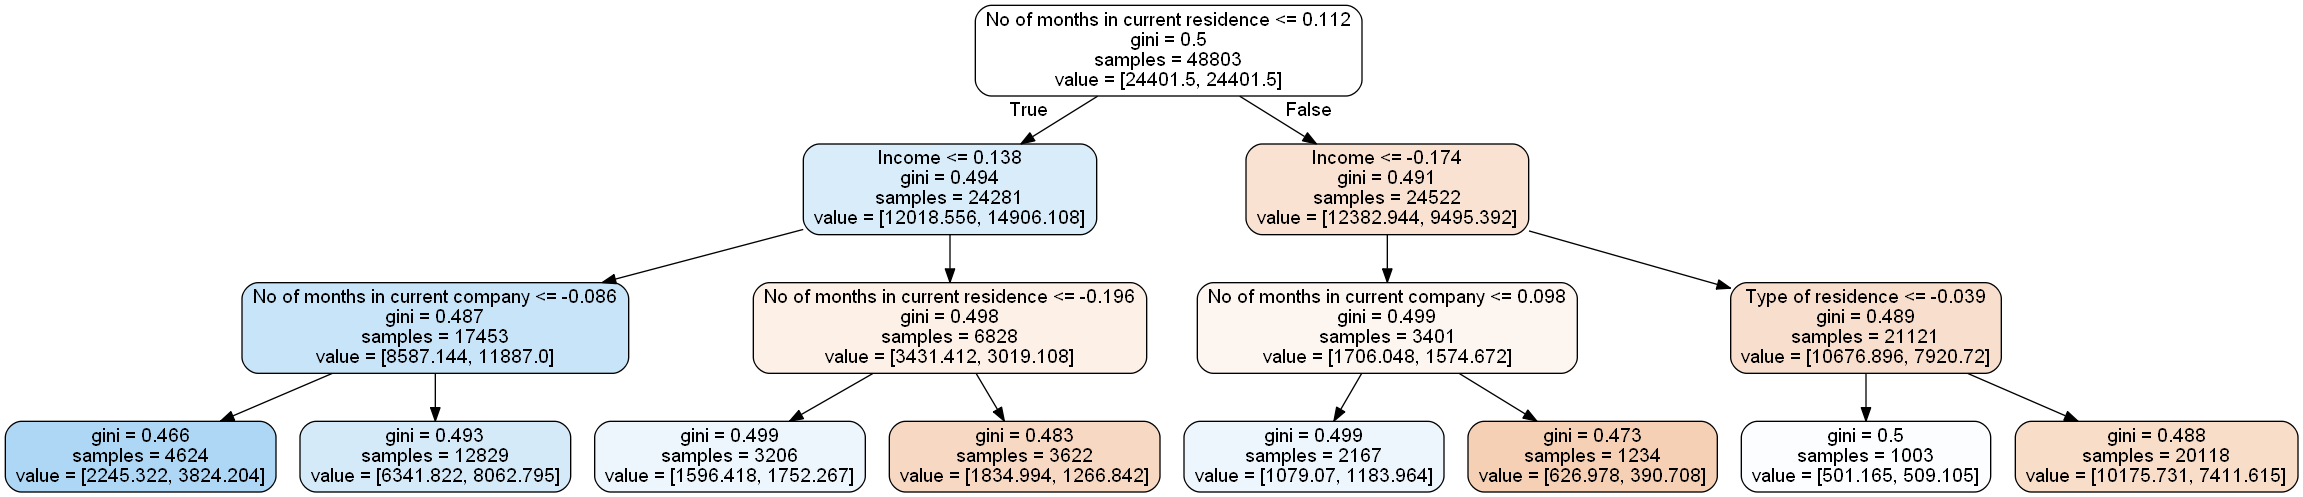

In [225]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [226]:
#y train probability prediction
y_train_prob_pred = clf_gini.predict_proba(X_train_demo)

# combining X_train  and y_train_prob_pred
y_train_pred_final = pd.DataFrame(y_train_prob_pred[:,1],index = X_train_demo.index).reset_index().rename(columns = {0:'performance_prob'})
y_train_pred_final = y_train_pred_final.merge(y_train_demo.reset_index(),on='Application ID')
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag
0       707978764          0.421417              0.0
1       131395592          0.559737              1.0
2        96569465          0.523175              0.0
3       754389325          0.421417              0.0
4       920953361          0.559737              0.0

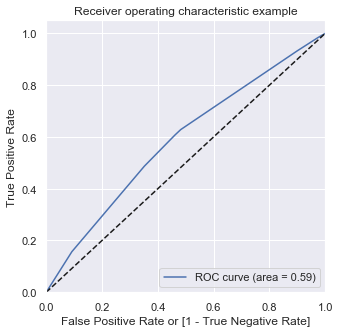

In [227]:
# Call the ROC function
draw_roc(y_train_pred_final['Performance Tag'], y_train_pred_final.performance_prob)

- The roc values is 0.59

#### Optimal Cutoff

In [228]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.performance_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag  0.0  0.1  0.2  0.3  0.4  \
0       707978764          0.421417              0.0    1    1    1    1    1   
1       131395592          0.559737              1.0    1    1    1    1    1   
2        96569465          0.523175              0.0    1    1    1    1    1   
3       754389325          0.421417              0.0    1    1    1    1    1   
4       920953361          0.559737              0.0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    1    0    0    0    0  
2    1    0    0    0    0  
3    0    0    0    0    0  
4    1    0    0    0    0

In [229]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Performance Tag'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.042231  1.000000  0.000000
0.1   0.1  0.042231  1.000000  0.000000
0.2   0.2  0.042231  1.000000  0.000000
0.3   0.3  0.042231  1.000000  0.000000
0.4   0.4  0.066164  0.983988  0.025694
0.5   0.5  0.522570  0.628336  0.517907
0.6   0.6  0.876258  0.156720  0.907984
0.7   0.7  0.957769  0.000000  1.000000
0.8   0.8  0.957769  0.000000  1.000000
0.9   0.9  0.957769  0.000000  1.000000


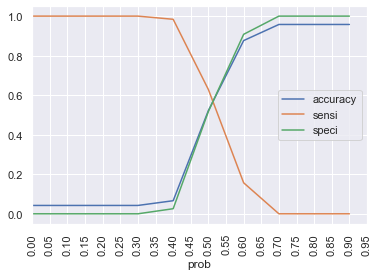

In [230]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set()
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,0.05))
plt.xticks(rotation='vertical')
plt.show()

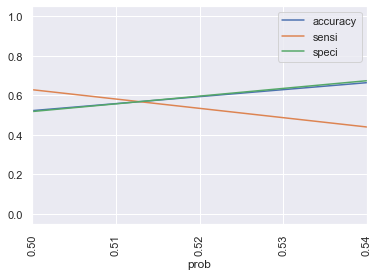

In [231]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0.50,0.54,0.01))
plt.xticks(rotation='vertical')
plt.xlim(0.50,0.54)
plt.show()

- The optimal cutoff point is 0.512

In [232]:
#creating final prediction on train dataset
y_train_pred_final['final_train_prediction'] = y_train_pred_final.performance_prob.map( lambda x: 1 if x > 0.512 else 0)
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag  0.0  0.1  0.2  0.3  0.4  \
0       707978764          0.421417              0.0    1    1    1    1    1   
1       131395592          0.559737              1.0    1    1    1    1    1   
2        96569465          0.523175              0.0    1    1    1    1    1   
3       754389325          0.421417              0.0    1    1    1    1    1   
4       920953361          0.559737              0.0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_train_prediction  
0    0    0    0    0    0                       0  
1    1    0    0    0    0                       1  
2    1    0    0    0    0                       1  
3    0    0    0    0    0                       0  
4    1    0    0    0    0                       1

#### Evaluation on train data set:

In [233]:
print(classification_report(y_train_demo,y_train_pred_final.final_train_prediction))

              precision    recall  f1-score   support

         0.0       0.97      0.54      0.69     46742
         1.0       0.05      0.61      0.10      2061

    accuracy                           0.54     48803
   macro avg       0.51      0.57      0.40     48803
weighted avg       0.93      0.54      0.67     48803



In [234]:
# Printing confusion matrix
print(confusion_matrix(y_train_demo,y_train_pred_final.final_train_prediction))
confusion_train = confusion_matrix(y_train_demo,y_train_pred_final.final_train_prediction)

[[25168 21574]
 [  809  1252]]


In [235]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity(Recall):",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

# Calculate false postive rate 
print('False poisitive rate:',FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive power(Precision) :',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive power :',TN / float(TN+ FN))

Sensitivity(Recall): 0.6074721009218825
Specificity: 0.5384450815112747
False poisitive rate: 0.4615549184887253
Positive predictive power(Precision) : 0.054849732760886706
Negative predictive power : 0.9688570658659583


In [236]:
print(accuracy_score(y_train_demo,y_train_pred_final.final_train_prediction))

0.5413601622851054


#### test data

In [237]:
y_test_pred = clf_gini.predict_proba(X_test_demo)

# combining X_test prospect id and y_test_pred
y_test_pred_final = pd.DataFrame(y_test_pred[:,1],index = X_test_demo.index).reset_index().rename(columns = {0:'performance_prob'})
y_test_pred_final = pd.merge(y_test_pred_final,y_test_demo.reset_index(), on = 'Application ID')
y_test_pred_final['final_test_prediction'] = y_test_pred_final.performance_prob.map(lambda x : 1 if x > 0.512 else 0)
y_test_pred_final.head()

Application ID  performance_prob  Performance Tag  final_test_prediction
0       859752985          0.523175              0.0                      1
1       587815635          0.421417              0.0                      0
2        45482412          0.559737              0.0                      1
3       647271529          0.421417              0.0                      0
4       122001435          0.559737              0.0                      1

In [238]:
print(classification_report(y_test_demo,y_test_pred_final.final_test_prediction))

              precision    recall  f1-score   support

         0.0       0.97      0.54      0.69     20033
         1.0       0.05      0.60      0.10       883

    accuracy                           0.54     20916
   macro avg       0.51      0.57      0.40     20916
weighted avg       0.93      0.54      0.67     20916



In [239]:
# Printing confusion matrix
print(confusion_matrix(y_test_demo,y_test_pred_final.final_test_prediction))
confusion_test_df = confusion_matrix(y_test_demo,y_test_pred_final.final_test_prediction)

[[10809  9224]
 [  354   529]]


In [240]:
TP = confusion_test_df[1,1] # true positive 
TN = confusion_test_df[0,0] # true negatives
FP = confusion_test_df[0,1] # false positives
FN = confusion_test_df[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity(Recall):",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

# Calculate false postive rate 
print('False poisitive rate:',FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive power(Precision) :',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive power :',TN / float(TN+ FN))

Sensitivity(Recall): 0.5990939977349944
Specificity: 0.5395597264513553
False poisitive rate: 0.46044027354864475
Positive predictive power(Precision) : 0.054239721111452886
Negative predictive power : 0.9682880945982263


In [241]:
print(accuracy_score(y_test_demo,y_test_pred_final.final_test_prediction))

0.5420730541212468


In [242]:
#print(metrics.roc_auc_score( y_test_demo,y_test_pred_final.final_test_prediction))
print(metrics.roc_auc_score(y_test_demo,y_test_pred[:,1]))

0.5803247122429191


### 4.1.3 Random Forest

In [243]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight = 'balanced',random_state = 42)
# Instantiate the grid search model
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = folds, n_jobs = -1,verbose = 1)

In [244]:
# Fit the grid search to the data
grid_search.fit(X_train_demo, y_train_demo)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 33.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_f...
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                

In [245]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.7074769993647931 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [246]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200, class_weight='balanced',random_state = 42)
rfc.fit(X_train_demo,y_train_demo)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [247]:
#y train probability prediction
y_train_prob_pred = rfc.predict_proba(X_train_demo)

# combining X_train  and y_train_prob_pred
y_train_pred_final = pd.DataFrame(y_train_prob_pred[:,1],index = X_train_demo.index).reset_index().rename(columns = {0:'performance_prob'})
y_train_pred_final = y_train_pred_final.merge(y_train_demo.reset_index(),on='Application ID')
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag
0       707978764          0.316360              0.0
1       131395592          0.554178              1.0
2        96569465          0.452093              0.0
3       754389325          0.375188              0.0
4       920953361          0.536884              0.0

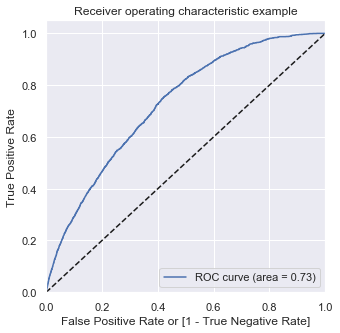

In [248]:
# Call the ROC function
draw_roc(y_train_pred_final['Performance Tag'], y_train_pred_final.performance_prob)

- The roc values is 0.73

#### Optimal Cutoff

In [249]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.performance_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag  0.0  0.1  0.2  0.3  0.4  \
0       707978764          0.316360              0.0    1    1    1    1    0   
1       131395592          0.554178              1.0    1    1    1    1    1   
2        96569465          0.452093              0.0    1    1    1    1    1   
3       754389325          0.375188              0.0    1    1    1    1    0   
4       920953361          0.536884              0.0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    1    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    1    0    0    0    0

In [250]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Performance Tag'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.042231  1.000000  0.000000
0.1   0.1  0.042415  1.000000  0.000193
0.2   0.2  0.050058  1.000000  0.008173
0.3   0.3  0.119255  0.996118  0.080591
0.4   0.4  0.402783  0.905386  0.380621
0.5   0.5  0.716595  0.571082  0.723011
0.6   0.6  0.911214  0.206211  0.942300
0.7   0.7  0.956826  0.008734  0.998631
0.8   0.8  0.957769  0.000000  1.000000
0.9   0.9  0.957769  0.000000  1.000000


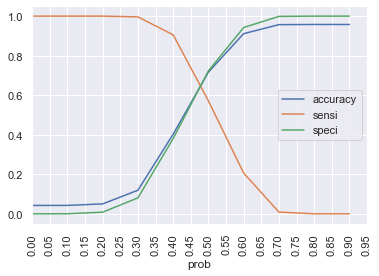

In [251]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set()
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,0.05))
plt.xticks(rotation='vertical')
plt.show()

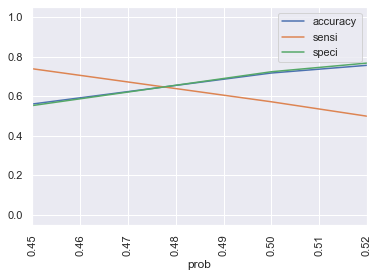

In [252]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0.45,0.52,0.01))
plt.xticks(rotation='vertical')
plt.xlim(0.45,0.52)
plt.show()

- The optimal cutoff point is 0.477

In [253]:
#creating final prediction on train dataset
y_train_pred_final['final_train_prediction'] = y_train_pred_final.performance_prob.map( lambda x: 1 if x > 0.477 else 0)
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag  0.0  0.1  0.2  0.3  0.4  \
0       707978764          0.316360              0.0    1    1    1    1    0   
1       131395592          0.554178              1.0    1    1    1    1    1   
2        96569465          0.452093              0.0    1    1    1    1    1   
3       754389325          0.375188              0.0    1    1    1    1    0   
4       920953361          0.536884              0.0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_train_prediction  
0    0    0    0    0    0                       0  
1    1    0    0    0    0                       1  
2    0    0    0    0    0                       0  
3    0    0    0    0    0                       0  
4    1    0    0    0    0                       1

#### Evaluation on train data set:

In [254]:
print(classification_report(y_train_demo,y_train_pred_final.final_train_prediction))

              precision    recall  f1-score   support

         0.0       0.98      0.65      0.78     46742
         1.0       0.08      0.65      0.14      2061

    accuracy                           0.65     48803
   macro avg       0.53      0.65      0.46     48803
weighted avg       0.94      0.65      0.76     48803



In [255]:
# Printing confusion matrix
print(confusion_matrix(y_train_demo,y_train_pred_final.final_train_prediction))
confusion_train = confusion_matrix(y_train_demo,y_train_pred_final.final_train_prediction)

[[30579 16163]
 [  715  1346]]


In [256]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity(Recall):",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

# Calculate false postive rate 
print('False poisitive rate:',FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive power(Precision) :',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive power :',TN / float(TN+ FN))

Sensitivity(Recall): 0.6530810286268801
Specificity: 0.6542082067519576
False poisitive rate: 0.34579179324804243
Positive predictive power(Precision) : 0.07687475012850534
Negative predictive power : 0.9771521697449991


In [257]:
print(accuracy_score(y_train_demo,y_train_pred_final.final_train_prediction))

0.6541606048808475


#### test data

In [258]:
y_test_pred = rfc.predict_proba(X_test_demo)

# combining X_test prospect id and y_test_pred
y_test_pred_final = pd.DataFrame(y_test_pred[:,1],index = X_test_demo.index).reset_index().rename(columns = {0:'performance_prob'})
y_test_pred_final = pd.merge(y_test_pred_final,y_test_demo.reset_index(), on = 'Application ID')
y_test_pred_final['final_test_prediction'] = y_test_pred_final.performance_prob.map(lambda x : 1 if x > 0.477 else 0)
y_test_pred_final.head()

Application ID  performance_prob  Performance Tag  final_test_prediction
0       859752985          0.449279              0.0                      0
1       587815635          0.404395              0.0                      0
2        45482412          0.325360              0.0                      0
3       647271529          0.532079              0.0                      1
4       122001435          0.656815              0.0                      1

In [259]:
print(classification_report(y_test_demo,y_test_pred_final.final_test_prediction))

              precision    recall  f1-score   support

         0.0       0.96      0.64      0.77     20033
         1.0       0.05      0.45      0.09       883

    accuracy                           0.64     20916
   macro avg       0.51      0.55      0.43     20916
weighted avg       0.93      0.64      0.74     20916



In [260]:
# Printing confusion matrix
print(confusion_matrix(y_test_demo,y_test_pred_final.final_test_prediction))
confusion_train = confusion_matrix(y_test_demo,y_test_pred_final.final_test_prediction)

[[12899  7134]
 [  484   399]]


In [261]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity(Recall):",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

# Calculate false postive rate 
print('False poisitive rate:',FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive power(Precision) :',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive power :',TN / float(TN+ FN))

Sensitivity(Recall): 0.45186862967157415
Specificity: 0.6438875854839515
False poisitive rate: 0.3561124145160485
Positive predictive power(Precision) : 0.05296694544006372
Negative predictive power : 0.9638347156840769


In [262]:
print(accuracy_score(y_test_demo,y_test_pred_final.final_test_prediction))

0.6357812201185695


In [263]:
#print(metrics.roc_auc_score( y_test_demo,y_test_pred_final.final_test_prediction))
print(metrics.roc_auc_score(y_test_demo,y_test_pred[:,1]))

0.562768798413535


#### Summary of Demographic Data analysis:

####  Logistic Regression:

    train:
    Accuracy: 0.559
    Sensitivity: 0.579
    Specificity: 0.558
    AUC: 0.59
 
    test:
    Accuracy: 0.556
    Sensitivity: 0.582
    Specificity: 0.555
    AUC: 0.59

####  Decison tree:

    train: 
    Accuracy: 0.541
    Sensitivity: 0.607
    Specificity: 0.538
    AUC: 0.59
 
    test:
    Accuracy: 0.542
    Sensitivity: 0.599
    Specificity: 0.539
    AUC: 0.58

####  Random Forest:

    train:
    Accuracy: 0.654
    Sensitivity: 0.653
    Specificity: 0.654
    AUC: 0.73
 
    test:
    Accuracy: 0.635
    Sensitivity: 0.451
    Specificity: 0.643
    AUC: 0.5627

Note:

    1. We have tried 3 different logistic models, Decision Tree and Random forest on demographic data.
    2. Random Forest test sensitivity score is too low.
    3. Logistic Regression and decision tree model values are almost the same.
       However overall metrics measure are still low.This shows demographic data alone is not sufficient 
       for model prediction.
    4. Next, let us try with both demographic and credit bureau data.

## 4.2 Model using entire data

#### Train test split

In [179]:
X = woe_merged.drop('Performance Tag',axis=1)
y = woe_merged['Performance Tag']

In [180]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100,stratify = y)

## 4.2.1 Logistic regression using Sklearn

using columns which are either medium or weak predictors

In [181]:
# printing the important variables
final_cols = iv[iv.Variable_Predictiveness != 'Not useful for prediction']['VAR_NAME'].tolist()

In [182]:
logistic = LogisticRegression(class_weight= 'balanced',random_state = 42)
params = [{'C': [0.1, 0.2, 0.3, 0.4 ,0.5, 0.8, 0.9, 1, 2], 'penalty': ['l1', 'l2']}]
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
logreg_model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc')
logreg_model.fit(X_train[final_cols],y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.9, 1, 2],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [183]:
# print best hyperparameters
print("Best AUC: ", logreg_model.best_score_)
print("Best hyperparameters: ", logreg_model.best_params_)

Best AUC:  0.6684437187788204
Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}


In [184]:
lr_final = logreg_model.best_estimator_

In [185]:
#y train probability prediction
y_train_prob_pred = logreg_model.predict_proba(X_train[final_cols])

# combining X_train  and y_train_prob_pred
y_train_pred_final = pd.DataFrame(y_train_prob_pred[:,1],index = X_train.index).reset_index().rename(columns = {0:'performance_prob'})
y_train_pred_final = y_train_pred_final.merge(y_train.reset_index(),on='Application ID')
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag
0        57082721          0.587097              0.0
1       895593920          0.533862              0.0
2       449869836          0.664463              1.0
3       312514026          0.523957              0.0
4       233300275          0.716319              0.0

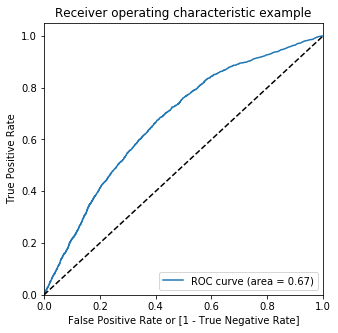

In [189]:
# Call the ROC function
draw_roc(y_train_pred_final['Performance Tag'], y_train_pred_final.performance_prob)

In [190]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.performance_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag  0.0  0.1  0.2  0.3  0.4  \
0        57082721          0.587097              0.0    1    1    1    1    1   
1       895593920          0.533862              0.0    1    1    1    1    1   
2       449869836          0.664463              1.0    1    1    1    1    1   
3       312514026          0.523957              0.0    1    1    1    1    1   
4       233300275          0.716319              0.0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    1    0    0    0    0  
1    1    0    0    0    0  
2    1    1    0    0    0  
3    1    0    0    0    0  
4    1    1    1    0    0

In [191]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Performance Tag'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.042231  1.000000  0.000000
0.1   0.1  0.042231  1.000000  0.000000
0.2   0.2  0.042231  1.000000  0.000000
0.3   0.3  0.326619  0.892770  0.301656
0.4   0.4  0.427043  0.837458  0.408947
0.5   0.5  0.578182  0.692868  0.573125
0.6   0.6  0.800566  0.379913  0.819113
0.7   0.7  0.908079  0.124212  0.942643
0.8   0.8  0.957769  0.000000  1.000000
0.9   0.9  0.957769  0.000000  1.000000


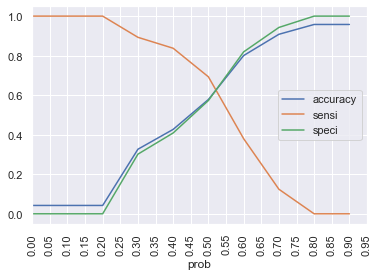

In [192]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set()
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,0.05))
plt.xticks(rotation='vertical')
plt.show()

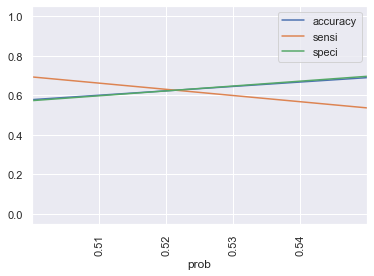

In [193]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0.51,0.54,0.01))
plt.xticks(rotation='vertical')
plt.xlim(0.50,0.55)
plt.show()

### Optimal cutoff probability is 0.521

In [194]:
#creating final prediction on train dataset
y_train_pred_final['final_train_prediction'] = y_train_pred_final.performance_prob.map( lambda x: 1 if x > 0.521 else 0)
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag  0.0  0.1  0.2  0.3  0.4  \
0        57082721          0.587097              0.0    1    1    1    1    1   
1       895593920          0.533862              0.0    1    1    1    1    1   
2       449869836          0.664463              1.0    1    1    1    1    1   
3       312514026          0.523957              0.0    1    1    1    1    1   
4       233300275          0.716319              0.0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_train_prediction  
0    1    0    0    0    0                       1  
1    1    0    0    0    0                       1  
2    1    1    0    0    0                       1  
3    1    0    0    0    0                       1  
4    1    1    1    0    0                       1

#### Evaluation on train data set:

In [195]:
# Let's check the overall accuracy.
print('Train Accuracy:', accuracy_score(y_train_pred_final['Performance Tag'], y_train_pred_final.final_train_prediction))

confusion_train = confusion_matrix(y_train_pred_final['Performance Tag'], y_train_pred_final.final_train_prediction)
print(confusion_train)

TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity(Recall):",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

# Calculate false postive rate 
print('False poisitive rate:',FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive power(Precision) :',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive power :',TN / float(TN+ FN))

Train Accuracy: 0.5991025141897015
[[27851 18891]
 [  674  1387]]
Sensitivity(Recall): 0.6729742843279961
Specificity: 0.5958452783363998
False poisitive rate: 0.40415472166360017
Positive predictive power(Precision) : 0.06839925041917348
Negative predictive power : 0.9763716038562664


#### Making prediction on test dataset:

In [196]:
y_test_pred = logreg_model.predict_proba(X_test[final_cols])

# combining X_test and y_test_pred
y_test_pred_final = pd.DataFrame(y_test_pred[:,1],index = X_test.index).reset_index().rename(columns = {0:'performance_prob'})
y_test_pred_final = y_test_pred_final.merge(y_test.reset_index(), on = 'Application ID')
y_test_pred_final['final_test_prediction'] = y_test_pred_final.performance_prob.map(lambda x : 1 if x > 0.521 else 0)
y_test_pred_final.head()

Application ID  performance_prob  Performance Tag  final_test_prediction
0       616539833          0.568281              0.0                      1
1       403664233          0.422084              0.0                      0
2       471585227          0.538422              0.0                      1
3       623674475          0.482024              0.0                      0
4        32801003          0.541083              0.0                      1

In [197]:
# Let's check the overall accuracy.
print('Test Accuracy:', accuracy_score(y_test_pred_final['Performance Tag'], y_test_pred_final.final_test_prediction))

print("AUC Score (Testing): %f" % metrics.roc_auc_score(y_test_pred_final['Performance Tag'], y_test_pred_final.performance_prob))

confusion_test = confusion_matrix(y_test_pred_final['Performance Tag'], y_test_pred_final.final_test_prediction)
print(confusion_test)

TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity(Recall):",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

# Calculate false postive rate 
print('False poisitive rate:',FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive power(Precision) :',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive power :',TN / float(TN+ FN))

Test Accuracy: 0.6004016064257028
AUC Score (Testing): 0.668954
[[11971  8062]
 [  296   587]]
Sensitivity(Recall): 0.6647791619479049
Specificity: 0.5975640193680427
False poisitive rate: 0.4024359806319573
Positive predictive power(Precision) : 0.06786911781708868
Negative predictive power : 0.9758702209179099


# 4.2.2 Logistic regression using Sklearn with SMOTE

### SMOTE

In [280]:
#creating smote implied X_train and y_train
columns = X_train.columns
smt = SMOTE(random_state = 42) 
X_train_res, y_train_res = smt.fit_sample(X_train, y_train)


X_train_res = pd.DataFrame(data=X_train_res,columns=columns )
y_train_res= pd.DataFrame(data=y_train_res,columns=['Performance Tag'])


# creating a copy of X_train_res, y_train_res
X_train_after_smote = X_train_res.copy()
y_train_after_smote = y_train_res.copy()

In [281]:
# printing the important variables
final_cols = iv[iv.Variable_Predictiveness != 'Not useful for prediction']['VAR_NAME'].tolist()

In [282]:
logistic = LogisticRegression(class_weight= 'balanced',random_state = 42)
params = [{'C': [0.1, 0.2, 0.3, 0.4 ,0.5, 0.8, 0.9, 1, 2], 'penalty': ['l1', 'l2']}]
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
logreg_model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc')
logreg_model.fit(X_train_res[final_cols],y_train_res)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.9, 1, 2],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [283]:
# print best hyperparameters
print("Best AUC: ", logreg_model.best_score_)
print("Best hyperparameters: ", logreg_model.best_params_)

Best AUC:  0.6734163965181611
Best hyperparameters:  {'C': 2, 'penalty': 'l2'}


In [284]:
#y train probability prediction
y_train_prob_pred = logreg_model.predict_proba(X_train_res[final_cols])

# combining X_train  and y_train_prob_pred
y_train_pred_final = pd.DataFrame(y_train_prob_pred[:,1],index = X_train_res.index).reset_index().rename(columns = {0:'performance_prob'})
y_train_pred_final = y_train_pred_final.merge(y_train_res.reset_index())
y_train_pred_final.head()

index  performance_prob  Performance Tag
0      0          0.595016              0.0
1      1          0.535718              0.0
2      2          0.645689              1.0
3      3          0.537207              0.0
4      4          0.713778              0.0

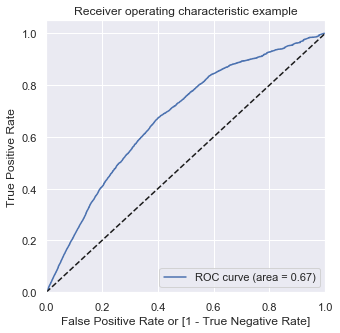

In [285]:
# Call the ROC function
draw_roc(y_train_pred_final['Performance Tag'], y_train_pred_final.performance_prob)

In [286]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.performance_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

index  performance_prob  Performance Tag  0.0  0.1  0.2  0.3  0.4  0.5  \
0      0          0.595016              0.0    1    1    1    1    1    1   
1      1          0.535718              0.0    1    1    1    1    1    1   
2      2          0.645689              1.0    1    1    1    1    1    1   
3      3          0.537207              0.0    1    1    1    1    1    1   
4      4          0.713778              0.0    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    1    0    0    0  
3    0    0    0    0  
4    1    1    0    0

In [287]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Performance Tag'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.500000  1.000000  0.000000
0.2   0.2  0.500000  1.000000  0.000000
0.3   0.3  0.590219  0.894784  0.285653
0.4   0.4  0.624717  0.838903  0.410530
0.5   0.5  0.632418  0.694515  0.570322
0.6   0.6  0.598455  0.379808  0.817102
0.7   0.7  0.531492  0.113367  0.949617
0.8   0.8  0.500000  0.000000  1.000000
0.9   0.9  0.500000  0.000000  1.000000


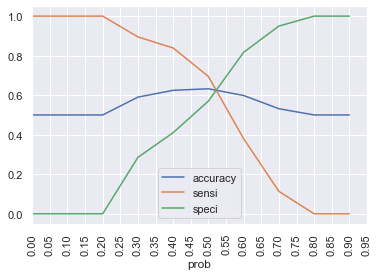

In [288]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set()
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,0.05))
plt.xticks(rotation='vertical')
plt.show()

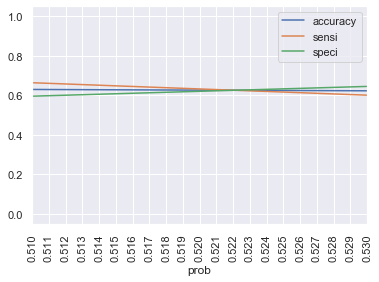

In [289]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0.51,0.54,0.001))
plt.xticks(rotation='vertical')
plt.xlim(0.51,0.53)
plt.show()

### Optimal cutoff probability is 0.522

In [290]:
#creating final prediction on train dataset
y_train_pred_final['final_train_prediction'] = y_train_pred_final.performance_prob.map( lambda x: 1 if x > 0.522 else 0)
y_train_pred_final.head()

index  performance_prob  Performance Tag  0.0  0.1  0.2  0.3  0.4  0.5  \
0      0          0.595016              0.0    1    1    1    1    1    1   
1      1          0.535718              0.0    1    1    1    1    1    1   
2      2          0.645689              1.0    1    1    1    1    1    1   
3      3          0.537207              0.0    1    1    1    1    1    1   
4      4          0.713778              0.0    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  final_train_prediction  
0    0    0    0    0                       1  
1    0    0    0    0                       1  
2    1    0    0    0                       1  
3    0    0    0    0                       1  
4    1    1    0    0                       1

#### Evaluation on train data set:

In [291]:
# Let's check the overall accuracy.
print('Train Accuracy:', accuracy_score(y_train_pred_final['Performance Tag'], y_train_pred_final.final_train_prediction))

confusion_train = confusion_matrix(y_train_pred_final['Performance Tag'], y_train_pred_final.final_train_prediction)
print(confusion_train)

TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity(Recall):",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

# Calculate false postive rate 
print('False poisitive rate:',FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive power(Precision) :',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive power :',TN / float(TN+ FN))

Train Accuracy: 0.6355526079329084
[[27745 18997]
 [15073 31669]]
Sensitivity(Recall): 0.6775277052757691
Specificity: 0.5935775105900475
False poisitive rate: 0.4064224894099525
Positive predictive power(Precision) : 0.625054277029961
Negative predictive power : 0.6479751506375824


#### Making prediction on test dataset:

In [292]:
y_test_pred = logreg_model.predict_proba(X_test[final_cols])

# combining X_test and y_test_pred
y_test_pred_final = pd.DataFrame(y_test_pred[:,1],index = X_test.index).reset_index().rename(columns = {0:'performance_prob'})
y_test_pred_final = y_test_pred_final.merge(y_test.reset_index(), on = 'Application ID')
y_test_pred_final['final_test_prediction'] = y_test_pred_final.performance_prob.map(lambda x : 1 if x > 0.522 else 0)
y_test_pred_final.head()

Application ID  performance_prob  Performance Tag  final_test_prediction
0       616539833          0.575318              0.0                      1
1       403664233          0.431568              0.0                      0
2       471585227          0.543061              0.0                      1
3       623674475          0.454276              0.0                      0
4        32801003          0.548035              0.0                      1

In [293]:
# Let's check the overall accuracy.
print('Test Accuracy:', accuracy_score(y_test_pred_final['Performance Tag'], y_test_pred_final.final_test_prediction))

print("AUC Score (Testing): %f" % metrics.roc_auc_score(y_test_pred_final['Performance Tag'], y_test_pred_final.performance_prob))

confusion_test = confusion_matrix(y_test_pred_final['Performance Tag'], y_test_pred_final.final_test_prediction)
print(confusion_test)

TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity(Recall):",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

# Calculate false postive rate 
print('False poisitive rate:',FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive power(Precision) :',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive power :',TN / float(TN+ FN))

Test Accuracy: 0.5977242302543507
AUC Score (Testing): 0.667451
[[11921  8112]
 [  302   581]]
Sensitivity(Recall): 0.6579841449603624
Specificity: 0.5950681375730046
False poisitive rate: 0.40493186242699547
Positive predictive power(Precision) : 0.06683538479236167
Negative predictive power : 0.9752924813875481


# 4.2.3 Decision Tree

In [238]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(class_weight='balanced', max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [239]:
# Let's check the evaluation metrics of our default model

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

         0.0       0.98      0.53      0.69     20033
         1.0       0.06      0.72      0.12       883

    accuracy                           0.54     20916
   macro avg       0.52      0.63      0.40     20916
weighted avg       0.94      0.54      0.66     20916



In [240]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred_default))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_default, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

[[10628  9405]
 [  247   636]]
Sensitivity: 	0.72
Specificity: 	0.53


#### Let us use grid search for hyper parameter tuning:

In [241]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced',random_state = 42)
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   11.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                  

In [242]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.131808      0.020558           0.0050        0.000894   
1        0.102006      0.001095           0.0044        0.000490   
2        0.114006      0.013357           0.0048        0.001600   
3        0.124007      0.010179           0.0046        0.000490   
4        0.197811      0.042941           0.0054        0.000490   
5        0.215812      0.045668           0.0056        0.001200   
6        0.209412      0.027392           0.0070        0.003521   
7        0.171210      0.015805           0.0052        0.000980   
8        0.102806      0.002561           0.0042        0.000400   
9        0.101606      0.001020           0.0046        0.000490   
10       0.102006      0.000632           0.0046        0.000490   
11       0.103006      0.003522           0.0042        0.000400   
12       0.154409      0.001200           0.0048        0.000400   
13       0.154209      0.002136           0.0046        0.000490   
14       0.152809      0.006113           0.0046        0.000490   
15       0.152409      0.003555           0.0052        0.000400   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                    100   
3          entropy               5                    100   
4          entropy              10                     50   
5          entropy              10                     50   
6          entropy              10                    100   
7          entropy              10                    100   
8             gini               5                     50   
9             gini               5                     50   
10            gini               5                    100   
11            gini               5                    100   
12            gini              10                     50   
13            gini              10                     50   
14            gini              10                    100   
15            gini              10                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
5                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
6                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
7                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
8                       50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
9                      100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
10                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
11                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
12                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
13                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
14                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
15                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.541897           0.539494           0.526025   
1            0.541897           0.539494           0.526025   
2            0.541078           0.543592           0.529098   
3            0.541078           0.543592           0.529098   
4            0.603053           0.637947           0.640574   
5            0.603053           0.637947           0.

In [243]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.6135483474376575
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [244]:
# model with optimal hyperparameters
clf_entropy = DecisionTreeClassifier(class_weight='balanced',criterion = "entropy", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [245]:
# accuracy score
clf_entropy.score(X_test,y_test)

0.6149359342130426

In [246]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(X_train.columns[0:])
features

C:\Users\Pramodini\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['Age',
 'Gender',
 'Marital Status (at the time of application)',
 'No of dependents',
 'Income',
 'Education',
 'Profession',
 'Type of residence',
 'No of months in current residence',
 'No of months in current company',
 'No of times 90 DPD or worse in last 6 months',
 'No of times 60 DPD or worse in last 6 months',
 'No of times 30 DPD or worse in last 6 months',
 'No of times 90 DPD or worse in last 12 months',
 'No of times 60 DPD or worse in last 12 months',
 'No of times 30 DPD or worse in last 12 months',
 'Avgas CC Utilization in last 12 months',
 'No of trades opened in last 6 months',
 'No of trades opened in last 12 months',
 'No of PL trades opened in last 6 months',
 'No of PL trades opened in last 12 months',
 'No of Inquiries in last 6 months (excluding home & auto loans)',
 'No of Inquiries in last 12 months (excluding home & auto loans)',
 'Presence of open home loan',
 'Outstanding Balance',
 'Total No of Trades',
 'Presence of open auto loan']

In [247]:
# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.664335 to fit



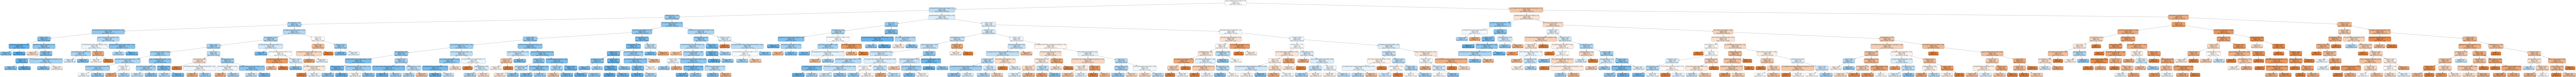

In [248]:
dot_data = StringIO()  
export_graphviz(clf_entropy, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

As we clearly can not see anything. Let us reduce max depth to 3.

In [249]:
# tree with max_depth = 3
clf_entropy = DecisionTreeClassifier(class_weight='balanced', criterion = "entropy", 
                                  random_state = 42,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_entropy.fit(X_train, y_train)

# score
print(clf_entropy.score(X_test,y_test))

0.5343755976286096


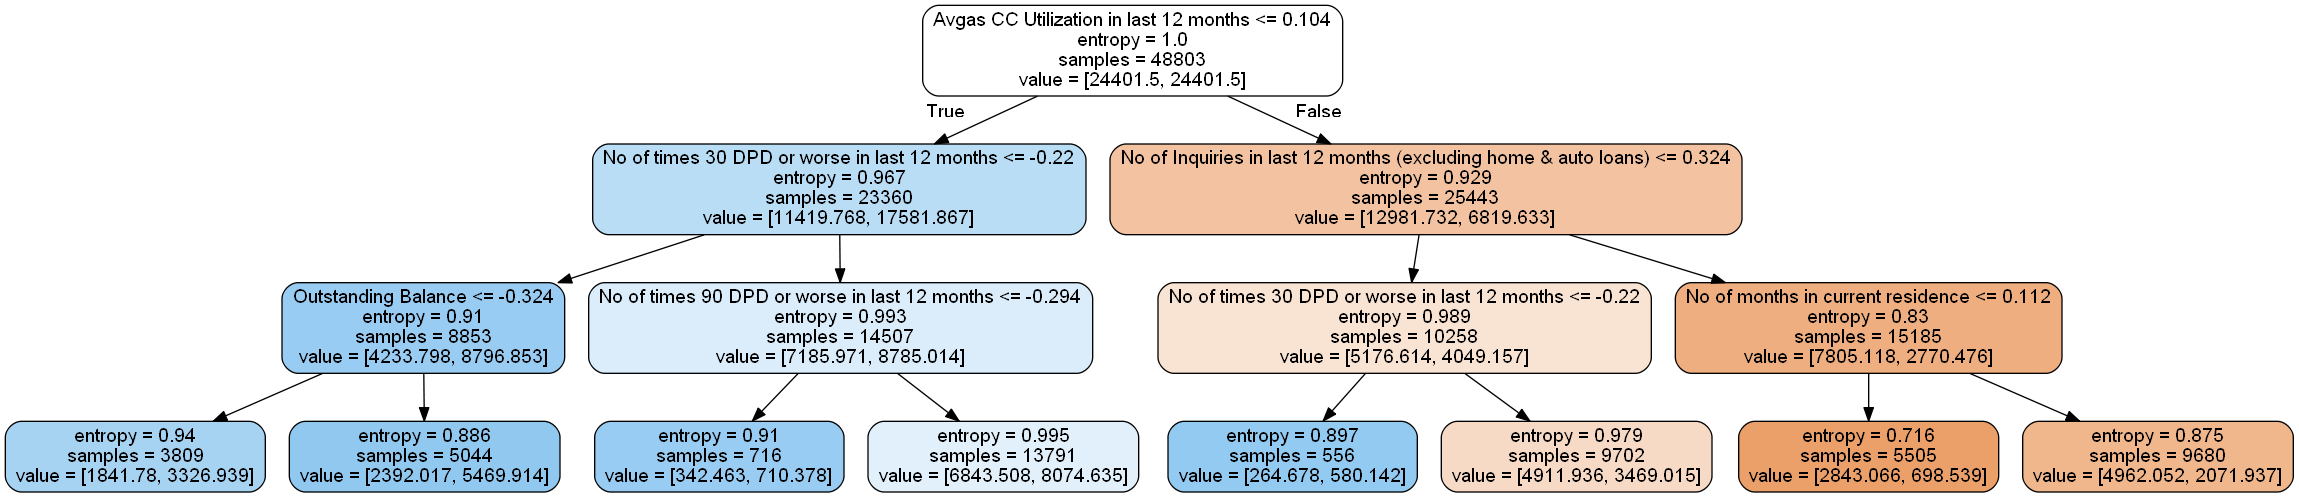

In [250]:
# plotting tree with max_depth=5
dot_data = StringIO()  
export_graphviz(clf_entropy, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [251]:
#y train probability prediction
y_train_prob_pred = clf_entropy.predict_proba(X_train)

# combining X_train  and y_train_prob_pred
y_train_pred_final = pd.DataFrame(y_train_prob_pred[:,1],index = X_train.index).reset_index().rename(columns = {0:'performance_prob'})
y_train_pred_final = y_train_pred_final.merge(y_train.reset_index(),on='Application ID')
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag
0        57082721          0.686705              0.0
1       895593920          0.541263              0.0
2       449869836          0.695747              1.0
3       312514026          0.541263              0.0
4       233300275          0.643668              0.0

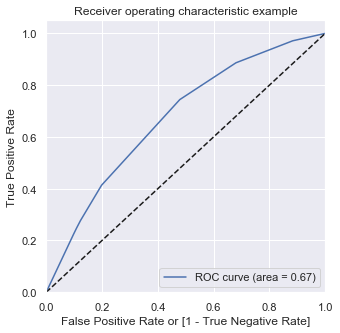

In [252]:
# Call the ROC function
draw_roc(y_train_pred_final['Performance Tag'], y_train_pred_final.performance_prob)

In [253]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.performance_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag  0.0  0.1  0.2  0.3  0.4  \
0        57082721          0.686705              0.0    1    1    1    1    1   
1       895593920          0.541263              0.0    1    1    1    1    1   
2       449869836          0.695747              1.0    1    1    1    1    1   
3       312514026          0.541263              0.0    1    1    1    1    1   
4       233300275          0.643668              0.0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    1    1    0    0    0  
1    1    0    0    0    0  
2    1    1    0    0    0  
3    1    0    0    0    0  
4    1    1    0    0    0

In [254]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Performance Tag'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.042231  1.000000  0.000000
0.1   0.1  0.042231  1.000000  0.000000
0.2   0.2  0.152614  0.971373  0.116512
0.3   0.3  0.343790  0.886463  0.319862
0.4   0.4  0.343790  0.886463  0.319862
0.5   0.5  0.530582  0.744299  0.521159
0.6   0.6  0.785218  0.413392  0.801613
0.7   0.7  0.957769  0.000000  1.000000
0.8   0.8  0.957769  0.000000  1.000000
0.9   0.9  0.957769  0.000000  1.000000


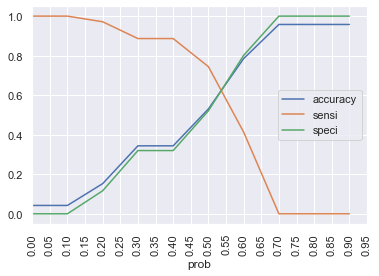

In [255]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set()
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,0.05))
plt.xticks(rotation='vertical')
plt.show()

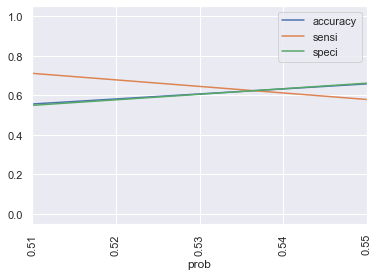

In [256]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0.51,0.55,0.01))
plt.xticks(rotation='vertical')
plt.xlim(0.51,0.55)
plt.show()

### Optimal cutoff probability is 0.536

In [257]:
#creating final prediction on train dataset
y_train_pred_final['final_train_prediction'] = y_train_pred_final.performance_prob.map( lambda x: 1 if x > 0.536 else 0)
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag  0.0  0.1  0.2  0.3  0.4  \
0        57082721          0.686705              0.0    1    1    1    1    1   
1       895593920          0.541263              0.0    1    1    1    1    1   
2       449869836          0.695747              1.0    1    1    1    1    1   
3       312514026          0.541263              0.0    1    1    1    1    1   
4       233300275          0.643668              0.0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_train_prediction  
0    1    1    0    0    0                       1  
1    1    0    0    0    0                       1  
2    1    1    0    0    0                       1  
3    1    0    0    0    0                       1  
4    1    1    0    0    0                       1

#### Evaluation on train data set:

In [258]:
print(classification_report(y_train,y_train_pred_final.final_train_prediction))

              precision    recall  f1-score   support

         0.0       0.98      0.52      0.68     46742
         1.0       0.06      0.74      0.12      2061

    accuracy                           0.53     48803
   macro avg       0.52      0.63      0.40     48803
weighted avg       0.94      0.53      0.66     48803



In [259]:
# Printing confusion matrix
print(confusion_matrix(y_train,y_train_pred_final.final_train_prediction))
confusion_train = confusion_matrix(y_train,y_train_pred_final.final_train_prediction)

TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity(Recall):",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

# Calculate false postive rate 
print('False poisitive rate:',FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive power(Precision) :',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive power :',TN / float(TN+ FN))

print('Accuracy:',accuracy_score(y_train,y_train_pred_final.final_train_prediction))

[[24360 22382]
 [  527  1534]]
Sensitivity(Recall): 0.7442988840368753
Specificity: 0.5211587009541739
False poisitive rate: 0.478841299045826
Positive predictive power(Precision) : 0.06414116072921894
Negative predictive power : 0.978824285771688
Accuracy: 0.5305821363440772


#### Evaluating the test data:

In [260]:
y_test_pred = clf_entropy.predict_proba(X_test)

# combining X_test and y_test_pred
y_test_pred_final = pd.DataFrame(y_test_pred[:,1],index = X_test.index).reset_index().rename(columns = {0:'performance_prob'})
y_test_pred_final = y_test_pred_final.merge(y_test.reset_index(), on = 'Application ID')
y_test_pred_final['final_test_prediction'] = y_test_pred_final.performance_prob.map(lambda x : 1 if x > 0.536 else 0)
y_test_pred_final.head()

Application ID  performance_prob  Performance Tag  final_test_prediction
0       616539833          0.541263              0.0                      1
1       403664233          0.413917              0.0                      0
2       471585227          0.541263              0.0                      1
3       623674475          0.541263              0.0                      1
4        32801003          0.541263              0.0                      1

In [261]:
# Let's check the overall accuracy and other metrices:

confusion_test = confusion_matrix(y_test_pred_final['Performance Tag'], y_test_pred_final.final_test_prediction)
print(confusion_test)

TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity(Recall):",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

# Calculate false postive rate 
print('False positive rate:',FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive power(Precision) :',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive power :',TN / float(TN+ FN))

print("accuracy_score:", accuracy_score(y_test,y_test_pred_final.final_test_prediction))
print ("AUC Score (Testing): %f" % metrics.roc_auc_score(y_test,y_test_pred_final.performance_prob))

[[10520  9513]
 [  226   657]]
Sensitivity(Recall): 0.7440543601359003
Specificity: 0.5251335296760345
False positive rate: 0.47486647032396545
Positive predictive power(Precision) : 0.06460176991150443
Negative predictive power : 0.9789689186674111
accuracy_score: 0.5343755976286096
AUC Score (Testing): 0.662985


## 4.2.4 Random Forest

In [318]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight = 'balanced')

In [319]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200,500], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight = 'balanced',random_state = 42)
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = folds, n_jobs = -1,verbose = 1)

In [320]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 39.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_f...
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                

In [321]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.6466405753744647 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 500}


In [322]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=500, class_weight='balanced',random_state = 42)

In [323]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [324]:
#y train probability prediction
y_train_prob_pred = rfc.predict_proba(X_train)

# combining X_train  and y_train_prob_pred
y_train_pred_final = pd.DataFrame(y_train_prob_pred[:,1],index = X_train.index).reset_index().rename(columns = {0:'performance_prob'})
y_train_pred_final = y_train_pred_final.merge(y_train.reset_index(),on='Application ID')
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag
0        57082721          0.658134              0.0
1       895593920          0.504918              0.0
2       449869836          0.649496              1.0
3       312514026          0.516678              0.0
4       233300275          0.604271              0.0

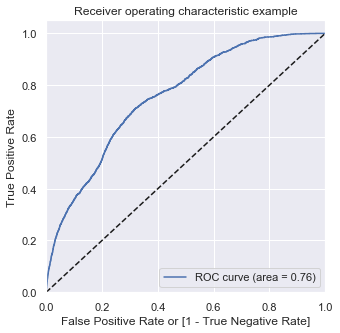

In [325]:
# Call the ROC function
draw_roc(y_train_pred_final['Performance Tag'], y_train_pred_final.performance_prob)

In [326]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.performance_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag  0.0  0.1  0.2  0.3  0.4  \
0        57082721          0.658134              0.0    1    1    1    1    1   
1       895593920          0.504918              0.0    1    1    1    1    1   
2       449869836          0.649496              1.0    1    1    1    1    1   
3       312514026          0.516678              0.0    1    1    1    1    1   
4       233300275          0.604271              0.0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    1    1    0    0    0  
1    1    0    0    0    0  
2    1    1    0    0    0  
3    1    0    0    0    0  
4    1    1    0    0    0

In [327]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Performance Tag'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.042231  1.000000  0.000000
0.1   0.1  0.045796  1.000000  0.003723
0.2   0.2  0.139397  0.998059  0.101536
0.3   0.3  0.344753  0.949054  0.318108
0.4   0.4  0.488843  0.849588  0.472937
0.5   0.5  0.646579  0.739447  0.642484
0.6   0.6  0.844169  0.410966  0.863271
0.7   0.7  0.954859  0.066473  0.994031
0.8   0.8  0.957769  0.000000  1.000000
0.9   0.9  0.957769  0.000000  1.000000


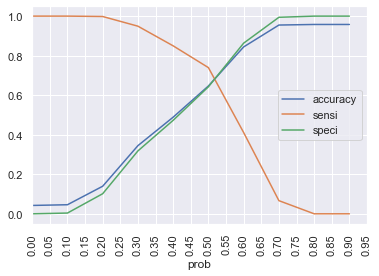

In [328]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set()
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,0.05))
plt.xticks(rotation='vertical')
plt.show()

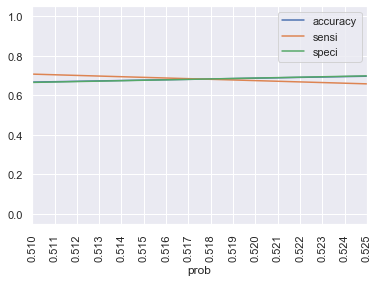

In [329]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0.51,0.54,0.001))
plt.xticks(rotation='vertical')
plt.xlim(0.51,0.525)
plt.show()

### Optimal cutoff probability is 0.518

In [330]:
#creating final prediction on train dataset
y_train_pred_final['final_train_prediction'] = y_train_pred_final.performance_prob.map( lambda x: 1 if x > 0.518 else 0)
y_train_pred_final.head()

Application ID  performance_prob  Performance Tag  0.0  0.1  0.2  0.3  0.4  \
0        57082721          0.658134              0.0    1    1    1    1    1   
1       895593920          0.504918              0.0    1    1    1    1    1   
2       449869836          0.649496              1.0    1    1    1    1    1   
3       312514026          0.516678              0.0    1    1    1    1    1   
4       233300275          0.604271              0.0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_train_prediction  
0    1    1    0    0    0                       1  
1    1    0    0    0    0                       0  
2    1    1    0    0    0                       1  
3    1    0    0    0    0                       0  
4    1    1    0    0    0                       1

#### Evaluation on train data set:

In [331]:
print(classification_report(y_train,y_train_pred_final.final_train_prediction))

              precision    recall  f1-score   support

         0.0       0.98      0.70      0.82     46742
         1.0       0.09      0.68      0.16      2061

    accuracy                           0.70     48803
   macro avg       0.54      0.69      0.49     48803
weighted avg       0.94      0.70      0.79     48803



In [332]:
# Printing confusion matrix
print(confusion_matrix(y_train,y_train_pred_final.final_train_prediction))
confusion_train = confusion_matrix(y_train,y_train_pred_final.final_train_prediction)

TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity(Recall):",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

# Calculate false postive rate 
print('False poisitive rate:',FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive power(Precision) :',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive power :',TN / float(TN+ FN))

print('Accuracy:',accuracy_score(y_train,y_train_pred_final.final_train_prediction))

[[32836 13906]
 [  656  1405]]
Sensitivity(Recall): 0.6817079087821446
Specificity: 0.7024945445209876
False poisitive rate: 0.29750545547901247
Positive predictive power(Precision) : 0.0917640911762785
Negative predictive power : 0.9804132330108682
Accuracy: 0.7016167038911543


#### Evaluating the test data:

In [333]:
y_test_pred = rfc.predict_proba(X_test)

# combining X_test and y_test_pred
y_test_pred_final = pd.DataFrame(y_test_pred[:,1],index = X_test.index).reset_index().rename(columns = {0:'performance_prob'})
y_test_pred_final = y_test_pred_final.merge(y_test.reset_index(), on = 'Application ID')
y_test_pred_final['final_test_prediction'] = y_test_pred_final.performance_prob.map(lambda x : 1 if x > 0.518 else 0)
y_test_pred_final.head()

Application ID  performance_prob  Performance Tag  final_test_prediction
0       616539833          0.499324              0.0                      0
1       403664233          0.361727              0.0                      0
2       471585227          0.464948              0.0                      0
3       623674475          0.412907              0.0                      0
4        32801003          0.483698              0.0                      0

In [334]:
# predict
print(classification_report(y_test,y_test_pred_final.final_test_prediction))

print(confusion_matrix(y_test,y_test_pred_final.final_test_prediction))
confusion_test = confusion_matrix(y_test,y_test_pred_final.final_test_prediction)

TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity(Recall):",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

# Calculate false postive rate 
print('False poisitive rate:',FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive power(Precision) :',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive power :',TN / float(TN+ FN))

print("accuracy_score:", accuracy_score(y_test,y_test_pred_final.final_test_prediction))
print ("AUC Score (Testing): %f" % metrics.roc_auc_score(y_test,y_test_pred_final.performance_prob))

              precision    recall  f1-score   support

         0.0       0.97      0.69      0.81     20033
         1.0       0.07      0.54      0.13       883

    accuracy                           0.69     20916
   macro avg       0.52      0.62      0.47     20916
weighted avg       0.93      0.69      0.78     20916

[[13896  6137]
 [  405   478]]
Sensitivity(Recall): 0.5413363533408834
Specificity: 0.693655468477013
False poisitive rate: 0.3063445315229871
Positive predictive power(Precision) : 0.07226001511715797
Negative predictive power : 0.9716803020767778
accuracy_score: 0.6872250908395486
AUC Score (Testing): 0.670142


### Commenting the SVM section as it takes a lot of time to run. Incase, if you want to run. Please uncomment it. The result of our SVM model can be seen in the summary section below.

## 4.2.5 SVM

In [389]:
# from sklearn.svm import SVC
# param_grid = {
#     'gamma': [0.01,0.1,1,10,100],
#     'C': [1,10,100]
# }
# # Create a based model
# svm = SVC(kernel='rbf', class_weight= 'balanced',random_state = 42)
# folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
# # Instantiate the grid search model
# grid_search_svm = GridSearchCV(estimator = svm, param_grid = param_grid, 
#                           cv = folds, n_jobs = -1,verbose = 1)

# grid_search_svm.fit(X_train, y_train)

In [390]:
# # printing the optimal accuracy score and hyperparameters
# print('We can get accuracy of',grid_search_svm.best_score_,'using',grid_search_svm.best_params_)

### evaluation train data

In [391]:
# y_train_pred = grid_search_svm.predict(X_train)

# # confusion matrix and accuracy, precision, recall

# # accuracy
# print("accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_train_pred), "\n")

# print ("AUC Score (Testing): %f" % metrics.roc_auc_score(y_train, y_train_pred ))

# # cm
# print(metrics.confusion_matrix(y_true=y_train, y_pred=y_train_pred))
# confusion_train = metrics.confusion_matrix(y_true=y_train, y_pred=y_train_pred)

# TP = confusion_train[1,1] # true positive 
# TN = confusion_train[0,0] # true negatives
# FP = confusion_train[0,1] # false positives
# FN = confusion_train[1,0] # false negatives

# # Let's see the sensitivity of our logistic regression model
# print("Sensitivity(Recall):",TP / float(TP+FN))

# # Let us calculate specificity
# print("Specificity:", TN / float(TN+FP))

# # Calculate false postive rate 
# print('False poisitive rate:',FP/ float(TN+FP))

# # Positive predictive value 
# print ('Positive predictive power(Precision) :',TP / float(TP+FP))

# # Negative predictive value
# print ('Negative predictive power :',TN / float(TN+ FN))


### evaluation test data

In [ ]:
# y_test_pred = grid_search_svm.predict(X_test)

# # confusion matrix and accuracy, precision, recall

# # accuracy
# print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_test_pred), "\n")

# print ("AUC Score (Testing): %f" % metrics.roc_auc_score(y_test, y_test_pred ))

# # cm
# print(metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred))
# confusion_train = metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred)

# TP = confusion_train[1,1] # true positive 
# TN = confusion_train[0,0] # true negatives
# FP = confusion_train[0,1] # false positives
# FN = confusion_train[1,0] # false negatives

# # Let's see the sensitivity of our logistic regression model
# print("Sensitivity(Recall):",TP / float(TP+FN))

# # Let us calculate specificity
# print("Specificity:", TN / float(TN+FP))

# # Calculate false postive rate 
# print('False poisitive rate:',FP/ float(TN+FP))

# # Positive predictive value 
# print ('Positive predictive power(Precision) :',TP / float(TP+FP))

# # Negative predictive value
# print ('Negative predictive power :',TN / float(TN+ FN))

### 4.2.6 Results

####  Logistic Regression with WOE are:

    train:
    Accuracy: 0.599
    Sensitivity: 0.672
    Specificity: 0.595
    AUC: 0.67
 
    test:
    Accuracy: 0.600
    Sensitivity: 0.664
    Specificity: 0.597
    AUC: 0.668
    
####  Logistic Regression with WOE and SMOTE:

    train:
    Accuracy: 0.635
    Sensitivity: 0.677
    Specificity: 0.593
    AUC: 0.67
 
    test:
    Accuracy: 0.597
    Sensitivity: 0.657
    Specificity: 0.595
    AUC: 0.667
    
    

####  Decison tree with WOE:

    train: 
    Accuracy: 0.5305
    Sensitivity: 0.744
    Specificity: 0.521
    AUC: 0.67
 
    test:
    Accuracy: 0.5343
    Sensitivity: 0.744
    Specificity: 0.525
    AUC: 0.662

####  Random Forest with WOE:

    train:
    Accuracy: 0.701
    Sensitivity: 0.681
    Specificity: 0.702
    AUC: 0.76
 
    test:
    Accuracy: 0.687
    Sensitivity: 0.541
    Specificity: 0.693
    AUC: 0.670   
    
####  SVM with WOE:

    train:
    Accuracy: 0.994
    Sensitivity: 1
    Specificity: 0.993
    AUC: 0.996
 
    test:
    Accuracy: 0.935
    Sensitivity: 0.012
    Specificity: 0.976
    AUC: 0.494

We have choosen logistic regression as our final model.The below are the reasons
- Logistic regression had higher AUC score when compared to Decision tree model, also the other metrics like accuracy, sensitivity and specificity were better for logistic regression model
- Though random forest had better training metrics, the test metrics had significant dip which shows that there was overfiting in the random forest model
- Therefore we have chosen logistic regression as our final model

### 4.3 Model stability

The test and train metrics for logistic regression model are fairly close, which suggests that the model performs well and generalizes fairly well to the unseen data. hence we can conclude that the selected logistic regression model is stable.

# 5.Building application scorecard

## logistic regression

In [198]:
y_prob_pred = lr_final.predict_proba(X[final_cols])
y_pred_final = pd.DataFrame(y_prob_pred[:,1],index = X.index).reset_index().rename(columns = {0:'performance_prob'})
y_pred_final = y_pred_final.merge(y.reset_index(),on='Application ID')
y_pred_final.head()

Application ID  performance_prob  Performance Tag
0       954457215          0.264108              0.0
1       432830445          0.227664              0.0
2       941387308          0.263402              0.0
3       392161677          0.282340              0.0
4       182011211          0.283077              0.0

In [199]:
y_pred_final['odds'] = (1/y_pred_final.performance_prob-1)
y_pred_final['log_odds'] = np.log(1/y_pred_final.performance_prob-1)

In [200]:
y_pred_final.head()

Application ID  performance_prob  Performance Tag      odds  log_odds
0       954457215          0.264108              0.0  2.786330  1.024725
1       432830445          0.227664              0.0  3.392447  1.221552
2       941387308          0.263402              0.0  2.796472  1.028359
3       392161677          0.282340              0.0  2.541827  0.932883
4       182011211          0.283077              0.0  2.532609  0.929250

In [201]:
y_pred_final['score'] = 400+20*(y_pred_final.log_odds-np.log(10))/np.log(2)

In [202]:
y_pred_final.sort_values(by='score',ascending = False).head()

Application ID  performance_prob  Performance Tag      odds  log_odds  \
487         368232932          0.220553              0.0  3.534056  1.262446   
26940       947398680          0.220990              0.0  3.525096  1.259908   
12193       655639551          0.220990              0.0  3.525096  1.259908   
2978        722596160          0.227136              0.0  3.402644  1.224553   
6330        575813309          0.227136              0.0  3.402644  1.224553   

            score  
487    369.987940  
26940  369.914693  
12193  369.914693  
2978   368.894560  
6330   368.894560

In [203]:
y_pred_final.score.max()

369.9879398999216

In [204]:
y_pred_final.score.min()

299.40468061221753

In [205]:
y_pred_final.groupby('Performance Tag').score.describe()

count        mean        std         min         25%  \
Performance Tag                                                           
0.0              66775.0  339.519084  18.859495  299.510973  325.620915   
1.0               2944.0  328.076234  16.765545  299.404681  313.411627   

                        50%         75%         max  
Performance Tag                                      
0.0              338.848553  360.219962  369.987940  
1.0              326.102752  338.378027  368.734719

The mean score of defaulter is 328, where as mean score of non defaulters is 339.5

[]

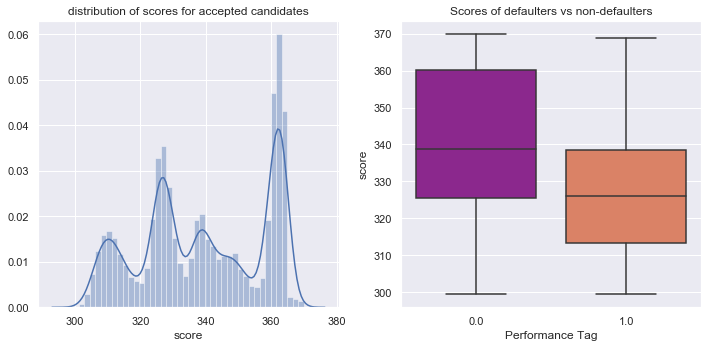

In [206]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(y_pred_final['score'])
plt.title('distribution of scores for accepted candidates')
plt.subplot(1,2,2)
sns.boxplot(x='Performance Tag',y='score',data = y_pred_final,palette = 'plasma')
plt.title('Scores of defaulters vs non-defaulters')
plt.tight_layout()
plt.plot()

## scorecard cutoff

the cutoff for probability for losigtic regression is 0.521, hence the corresponding score in the scorecard will be the cutoff

In [207]:
cutoff_odds = 1/0.521-1
cutoff_logodds = np.log(cutoff_odds)
cutoff_score = 400+20*(cutoff_logodds-np.log(10))/np.log(2)
print('cuttoff_odds : ',cutoff_odds)
print('cuttoff_logodds : ',cutoff_logodds)
print('cuttoff_score : ',cutoff_score)

cuttoff_odds :  0.9193857965451055
cuttoff_logodds :  -0.0840494443424517
cuttoff_score :  331.13628377140617


## Performance of logistic model and Scores of rejected Candidates

In [208]:
rejected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 69597 to 71238
Data columns (total 29 columns):
Application ID                                                     1425 non-null int64
Age                                                                1425 non-null int64
Gender                                                             1425 non-null object
Marital Status (at the time of application)                        1425 non-null object
No of dependents                                                   1425 non-null float64
Income                                                             1425 non-null float64
Education                                                          1424 non-null object
Profession                                                         1424 non-null object
Type of residence                                                  1425 non-null object
No of months in current residence                                  1425 non-null int64
No of mon

In [209]:
rejected.isnull().sum()

Application ID                                                        0
Age                                                                   0
Gender                                                                0
Marital Status (at the time of application)                           0
No of dependents                                                      0
Income                                                                0
Education                                                             1
Profession                                                            1
Type of residence                                                     0
No of months in current residence                                     0
No of months in current company                                       0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                    

In [210]:
#Let us replace null values of education and profession
rejected['Education'] = rejected['Education'].replace(np.NaN, 'Professional')
rejected['Profession'] = rejected['Profession'].replace(np.NaN, 'SAL')

# Cases with missing credit card utilisation. 
#These are the cases in which the applicant does not have any other credit card.
#let us replace with 0.0 
rejected['Avgas CC Utilization in last 12 months'] = rejected['Avgas CC Utilization in last 12 months'].replace(np.NaN, 0.0)

In [211]:
#setting the application id as index
rejected.set_index('Application ID',inplace = True)

## Replacing values with WOE values

In [212]:
# as per variable range, assigning the woe values:
for var in woe_merged.columns:
    small_df = data[data['VAR_NAME'] == var]
    small_df = small_df[~(small_df.MIN_VALUE.isnull())]
    small_df = small_df[~(small_df.MAX_VALUE.isnull())]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            rejected[var] = rejected[var].apply(lambda x: eval(replace_cmd))
        except:
            rejected[var] = rejected[var].apply(lambda x: eval(replace_cmd1))

In [213]:
rejected.isnull().sum()

Age                                                                   0
Gender                                                                0
Marital Status (at the time of application)                           0
No of dependents                                                      0
Income                                                                0
Education                                                             0
Profession                                                            0
Type of residence                                                     0
No of months in current residence                                     0
No of months in current company                                       0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                   

In [214]:
# let us make the predictions
prob_rejectedApplicant = lr_final.predict_proba(rejected[final_cols])
rejectedApplicant_df = pd.DataFrame(prob_rejectedApplicant[:,1]).rename(columns = {0:'performance_prob'})

In [215]:
#let us segregate as per our optimal cut off
rejectedApplicant_df['Performance Tag'] = rejectedApplicant_df.performance_prob.map(lambda x : 1 if x > 0.521 else 0)

In [216]:
rejectedApplicant_df['Performance Tag'].value_counts()

1    1414
0      11
Name: Performance Tag, dtype: int64

In [217]:
100*(rejectedApplicant_df['Performance Tag'].sum()/len(rejectedApplicant_df.index))

99.2280701754386

In [218]:
rejectedApplicant_df['odds'] = (1/rejectedApplicant_df.performance_prob-1)
rejectedApplicant_df['log_odds'] = np.log(1/rejectedApplicant_df.performance_prob-1)

rejectedApplicant_df.head()

performance_prob  Performance Tag      odds  log_odds
0          0.698820                1  0.430983 -0.841687
1          0.697204                1  0.434300 -0.834021
2          0.737499                1  0.355934 -1.033009
3          0.698663                1  0.431306 -0.840939
4          0.709830                1  0.408788 -0.894557

In [219]:
rejectedApplicant_df['score'] = 400+20*(rejectedApplicant_df.log_odds-np.log(10))/np.log(2)
rejectedApplicant_df.sort_values(by='score',ascending = False).head()

performance_prob  Performance Tag      odds  log_odds       score
262           0.423931                0  1.358877  0.306659  342.409738
626           0.430628                0  1.322188  0.279288  341.619983
273           0.470629                0  1.124816  0.117619  336.955213
1326          0.479159                0  1.086989  0.083412  335.968188
225           0.479838                0  1.084039  0.080694  335.889762

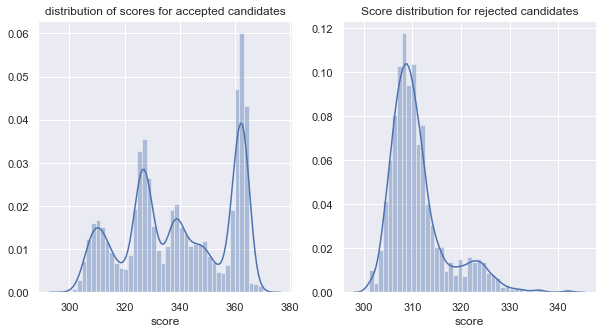

In [220]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(y_pred_final['score'])
plt.title('distribution of scores for accepted candidates')
plt.subplot(1,2,2)
sns.distplot(rejectedApplicant_df.score)
plt.title('Score distribution for rejected candidates')
plt.show()

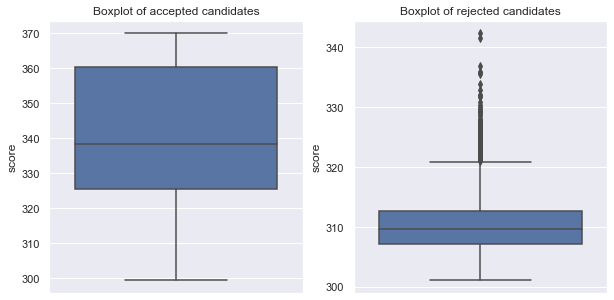

In [221]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y =y_pred_final['score'])
plt.title('Boxplot of accepted candidates')
plt.subplot(1,2,2)
sns.boxplot(y =rejectedApplicant_df.score)
plt.title('Boxplot of rejected candidates')
plt.show()

In [222]:
y_pred_final['score'].describe()

count    69719.000000
mean       339.035891
std         18.916189
min        299.404681
25%        325.396275
50%        338.362312
75%        360.156961
max        369.987940
Name: score, dtype: float64

In [223]:
rejectedApplicant_df.score.describe()

count    1425.000000
mean      311.118184
std         5.954971
min       301.111476
25%       307.204735
50%       309.601507
75%       312.733752
max       342.409738
Name: score, dtype: float64

- We can clearly see that the scores for accepted candidates is much higher than the rejected candidates.

# 6.Financial Benefit Analysis

Financial benefit from the model can be divided into 2 buckets.
- 1. The loss that can be prevented by rejecting the bad customers using the cutoff from the model
- 2. The loss incurred by rejecting the good customers with score less than the cutoff

Assumptions :
- Avg CC utilization is taken as proxy for the amount earned 
- We assume that the units of avg CC utilization is in thousands, i.e if avg CC util is 25, then it is 25k.
- We are assuming that every non-defaulter will spend the avg CC utilization every month and CredX earns a 10% on the amount spend
- For every defaulter, we assume that credX looses 5 times the avg CC utilization

### Credit Loss prevented

#### The number of defaulters with score less than the cutoff score

In [224]:
rows,_ = y_pred_final[(y_pred_final.score < cutoff_score)&(y_pred_final['Performance Tag']==1)].shape

In [225]:
print_bold('Number of defaulters with score less than cutoff score : ')
print(rows)
print_bold('Total number of defaulters : ')
print(y.sum())
print(round(100*rows/y.sum(),2))

Number of defaulters with score less than cutoff score : 
1974
Total number of defaulters : 
2944.0
67.05


Using the score cutoff from the model, we have identified `1974` defaulters, i.e we have identified 67% of the defaulters

In [226]:
avg = merged.groupby('Performance Tag')['Avgas CC Utilization in last 12 months'].mean()
print(avg)

Performance Tag
0.0    28.384099
1.0    39.929130
Name: Avgas CC Utilization in last 12 months, dtype: float64


- for the performance Tag 0,the avg CC util corresponds to avg money spend by non-defaulters
- for the performance Tag 1,the avg CC util corresponds to avg money spend by defaulters

In [227]:
non_defa = avg[0]
defa = avg[1]
print(non_defa,defa)

28.38409932504117 39.929129970406095


In [228]:
amount_lost_per_defaulter = defa*5
number_of_defaulter_identified = rows
total_loss_saved = amount_lost_per_defaulter*number_of_defaulter_identified
print_bold('Total loss prevented:')
print(total_loss_saved)

Total loss prevented:
394100.5128079082


- As per our assumption, the amount lost for each defaulter is 5 times the avg CC util of defaulter
- Therefore amount lost for each defaulter is 199.5k
- There are a total of 1974 defaulters, therefore total amount is 394 million rupees which is the loss we are preventing by using the model

__Therefore creditloss avoided is 394 million rupees__

## Revenue Loss incured

In [229]:
rows,_ = y_pred_final[(y_pred_final.score < cutoff_score)&(y_pred_final['Performance Tag']==0)].shape

In [230]:
print_bold('Number of non-defaulters with score less than cutoff score : ')
print(rows)
print_bold('Total number of non-defaulters : ')
print(len(y)-y.sum())
print(round(100*rows/(len(y)-y.sum()),2))

Number of non-defaulters with score less than cutoff score : 
26953
Total number of non-defaulters : 
66775.0
40.36


In [231]:
amount_lost_per_non_defaulter = non_defa*0.1
number_of_non_defaulter_identified = rows
total_loss_incured = amount_lost_per_non_defaulter*number_of_non_defaulter_identified
print_bold('Total loss incured:')
print(total_loss_incured)

Total loss incured:
76503.66291078346


- As per our assumption, the income for each defaulter is 10% of the avg CC util of non-defaulter
- Therefore income for each non-defaulter is 2.8k
- There are a total of 26953 non-defaulters below cutoff, therefore total amount is 76 million rupees. This is the income we are losing by using the model

__Therefore the revenue loss incured is 76 million rupees__

In [232]:
print_bold('net saving achieved by the model:')
print(total_loss_saved-total_loss_incured)

net saving achieved by the model:
317596.8498971247


Therefore the total cost saving from the model is 317 million rupees

## LIFT and GAIN

In [233]:
decile_df = y_pred_final.copy()

decile_df['decile'] = pd.qcut(decile_df['performance_prob'], 10, labels=np.arange(10, 0, -1))


lift_df = decile_df.groupby('decile')['performance_prob'].count().reset_index()



lift_df.rename({'performance_prob':'total'}, axis=1, inplace=True)

lift_df_pred = decile_df[decile_df['Performance Tag']==1].groupby('decile')['Performance Tag'].count().reset_index()

lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')

lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)



lift_df_final['cumresp'] = lift_df_final['Performance Tag'].cumsum()

lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['Performance Tag']))

lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))


lift_df_final

decile  total  Performance Tag  cumresp        gain   cumlift
9      1   6972              608      608   20.652174  2.065217
8      2   6972              533     1141   38.756793  1.937840
7      3   6972              402     1543   52.411685  1.747056
6      4   6970              363     1906   64.741848  1.618546
5      5   6973              301     2207   74.966033  1.499321
4      6   6965              257     2464   83.695652  1.394928
3      7   6843              168     2632   89.402174  1.277174
2      8   6839               97     2729   92.697011  1.158713
1      9   6954              113     2842   96.535326  1.072615
0     10   7259              102     2944  100.000000  1.000000

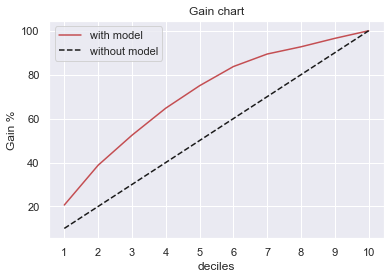

In [234]:
plt.plot(lift_df_final.decile.tolist(),lift_df_final['gain'],'r',label = 'with model')
plt.plot([1,2,10],[10,20,100],'--',label = 'without model',color = 'k')
plt.title('Gain chart')
plt.xlabel('deciles')
plt.xticks(np.arange(1,11))
plt.ylabel('Gain %')
plt.legend()
plt.show()

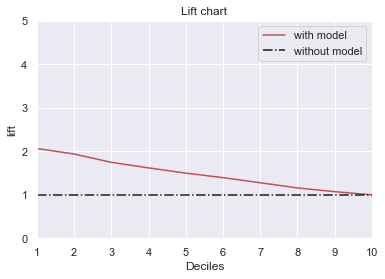

In [235]:
plt.plot(lift_df_final.decile.tolist(),lift_df_final.cumlift.tolist(),color='r',label = 'with model')
plt.axhline(y=1, color='k', linestyle='-.',label = 'without model')
plt.legend()
plt.xlim([1,10])
plt.ylim([0,5])
plt.title('Lift chart')
plt.xlabel('Deciles')
plt.ylabel('lift')
plt.show()

- decile have increasing decreasing probability of default, i.e decile 1 has a higher probability of default than decile 10
- From the gain chart we can see that, about 83% of defaulters lie in top 6 deciles
- From the lift chart we can see that we were able to perform two times better with the model than without of the model

## Important variables

In [236]:
p = 0
n = 0
for x,z in sorted(zip(lr_final.coef_[0],X_train[final_cols].columns)):
    coef = round(x,2)
    if coef > 0 :
        if (p == 0):
            print_bold('Features affecting default rate positively:')
            p = p+1
        print(z+' : '+'\033[92m'+str(coef)+'\033[0m')
    else:
        if (n == 0):
            print_bold('Features affecting default rate negatively:')
            n = n+1
        print(z+' : '+'\033[91m'+str(coef)+'\033[0m') 

Features affecting default rate negatively:
No of Inquiries in last 12 months (excluding home & auto loans) : -0.43
Avgas CC Utilization in last 12 months : -0.42
No of times 30 DPD or worse in last 12 months : -0.36
No of trades opened in last 12 months : -0.24
Income : -0.2
No of times 60 DPD or worse in last 12 months : -0.16
No of times 30 DPD or worse in last 6 months : -0.14
No of times 90 DPD or worse in last 12 months : -0.11
No of PL trades opened in last 12 months : -0.11
No of PL trades opened in last 6 months : -0.11
Outstanding Balance : -0.1
No of times 90 DPD or worse in last 6 months : -0.08
Features affecting default rate positively:
No of months in current residence : 0.01
No of trades opened in last 6 months : 0.06
Total No of Trades : 0.15
No of Inquiries in last 6 months (excluding home & auto loans) : 0.16
No of times 60 DPD or worse in last 6 months : 0.17


We can see that 
- `No of Inquiries in last 12 months (excluding home & auto loans)`,`Avgas CC Utilization in last 12 months` and `No of times 30 DPD or worse in last 12 months` are the three variables that are effecting default negatively
- `No of times 60 DPD or worse in last 6 months`,`No of Inquiries in last 6 months (excluding home & auto loans)` and `Total No of Trades` are the top 3 variables affecting the default rate positively

## The final equaltion for default probability

In [237]:
equ = 'default_prob = '
for x,z in (zip(lr_final.coef_[0],X_train[final_cols].columns)):
    coef = round(x,2)
    if coef > 0 :
        coef = '\033[92m'+'+'+str(coef)+'\033[0m'
    else:
        coef = '\033[91m'+str(coef)+'\033[0m'  
    equ = equ+coef+' x '+'\033[1m'+z+'\033[0m'  

print(equ)

default_prob = -0.42 x Avgas CC Utilization in last 12 months-0.2 x Income-0.43 x No of Inquiries in last 12 months (excluding home & auto loans)+0.16 x No of Inquiries in last 6 months (excluding home & auto loans)-0.11 x No of PL trades opened in last 12 months-0.11 x No of PL trades opened in last 6 months+0.01 x No of months in current residence-0.36 x No of times 30 DPD or worse in last 12 months-0.14 x No of times 30 DPD or worse in last 6 months-0.16 x No of times 60 DPD or worse in last 12 months+0.17 x No of times 60 DPD or worse in last 6 months-0.11 x No of times 90 DPD or worse in last 12 months-0.08 x No of times 90 DPD or worse in last 6 months-0.24 x No of trades opened in last 12 months+0.06 x No of trades opened in last 6 months-0.1 x Outstanding Balance+0.15 x Total No of Trades
